In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt      
import pandas as pd
from scipy import special                 
import array
import scipy as sp
import scipy.interpolate
import re
def unPackRawFile(raw_path):
    """
    - unpacks the .raw file. Not used for the neural network.
    """
    y = np.loadtxt(raw_path, skiprows=6)
    distance = y[:,0]
    pec_vel = y[:,1]
    temp = y[:,2]
    HI_density = y[:,3]
    return distance, pec_vel, temp, HI_density
def unPackDenFile(raw_path):
    """
    - unpacks the .raw file. Not used for the neural network.
    """
    y = np.loadtxt(raw_path, skiprows=4)
    distance = y[:,0]
    gas_density  = y[:,1]

   
    return distance, gas_density

In [3]:
def calculate_gamma(temperature,density,xHI,scale):
    '''Gamma = R(T)*ne/xHI, R(T) = 4.3e-13 * (T/1e4K)^{-0.7), ne = 0.82*nb.
    '''
    omega_b = 0.0479; h = 0.6814
    mean_nb = 1.123e-5/scale**3*omega_b*h**2
    nb = np.multiply(density ,mean_nb); ne = 0.82*nb
    R_T = 4.3e-13 * (np.divide(temperature,1e4))**(-0.7)
    gamma = R_T * ne / xHI
    
    return gamma

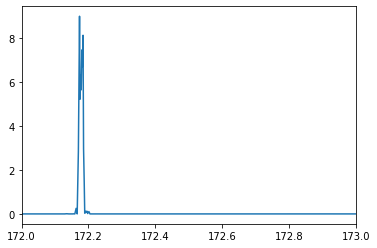

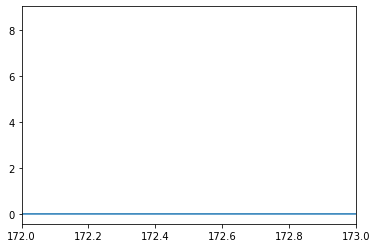

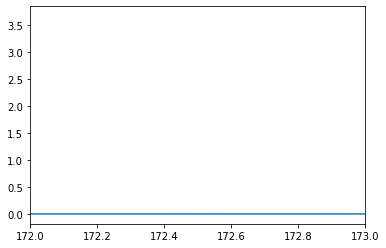

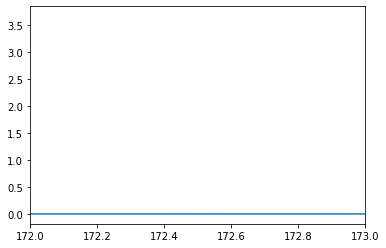

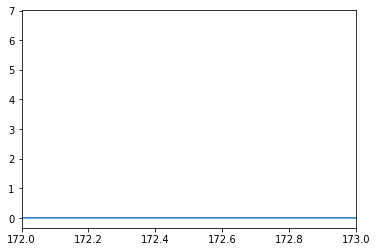

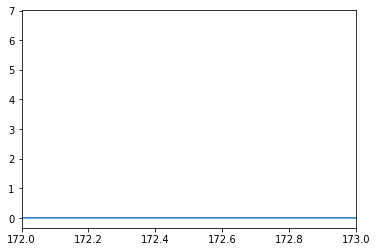

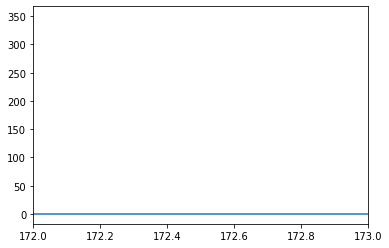

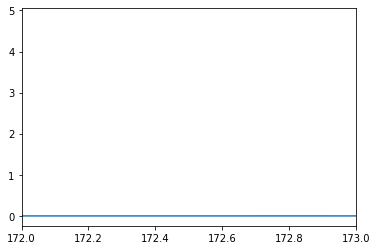

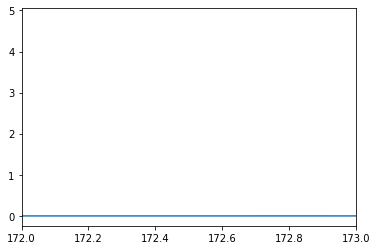

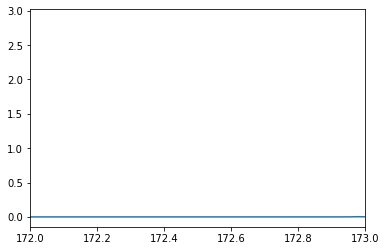

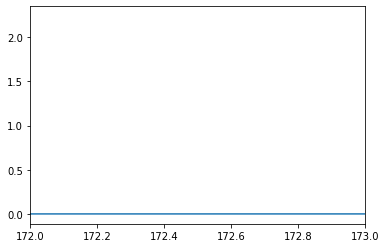

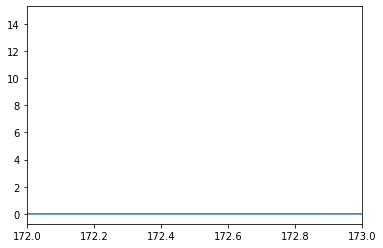

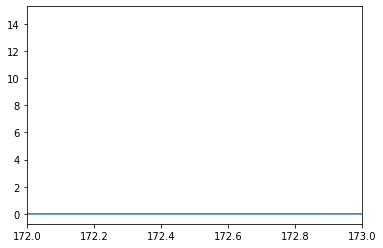

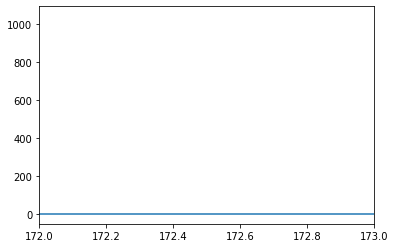

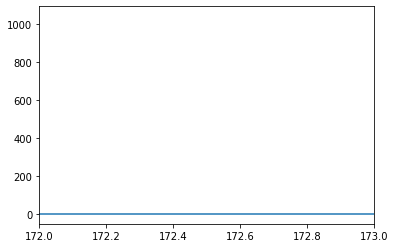

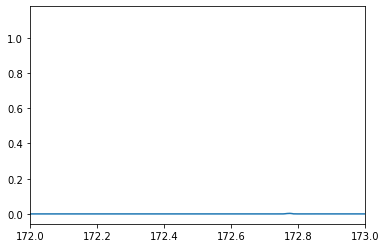

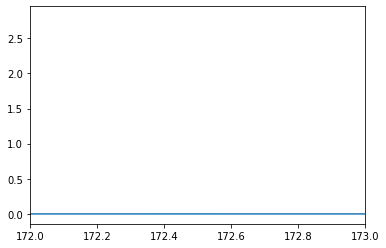

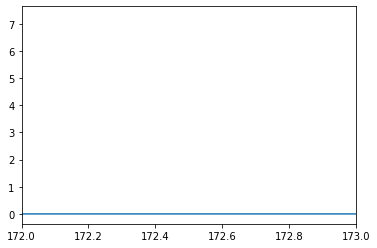

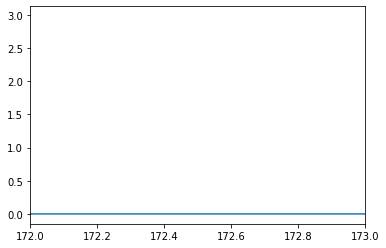

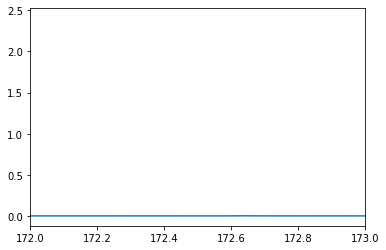

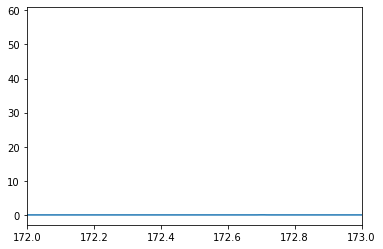

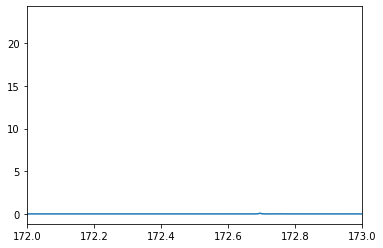

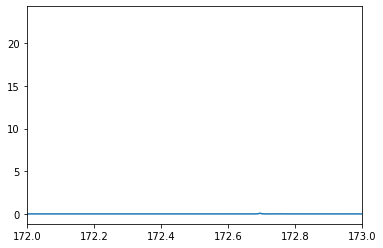

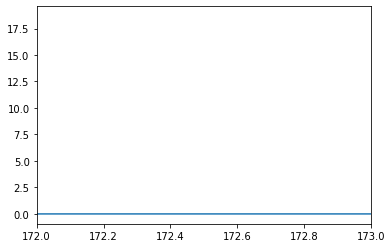

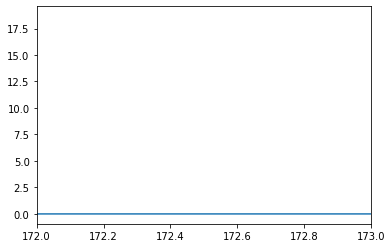

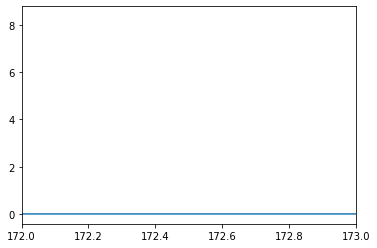

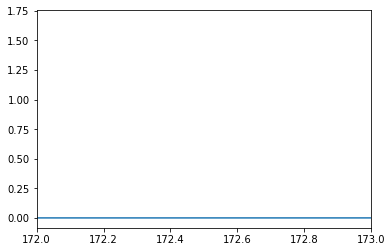

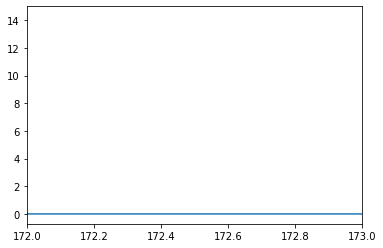

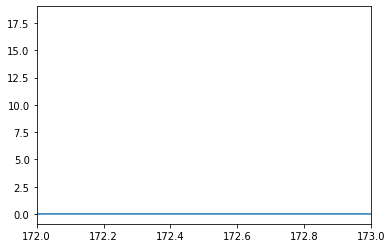

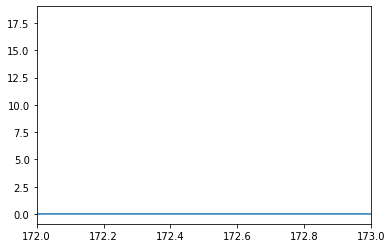

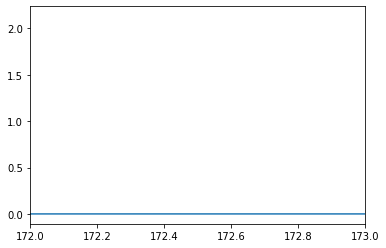

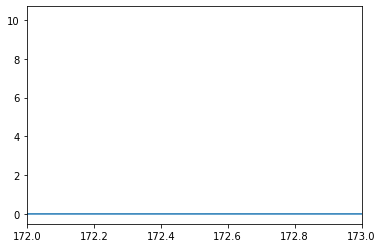

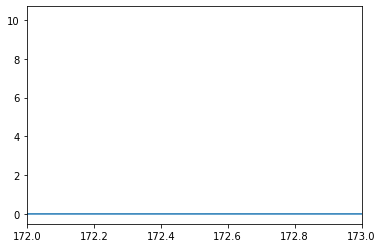

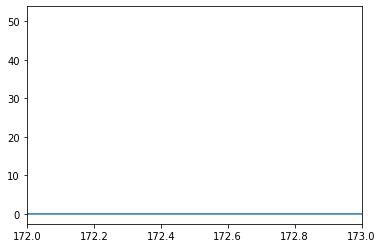

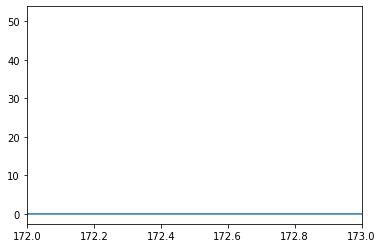

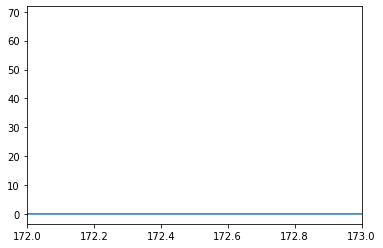

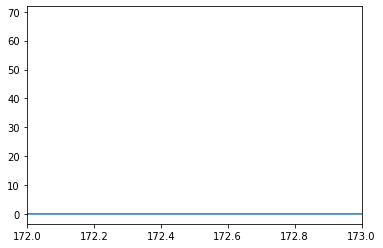

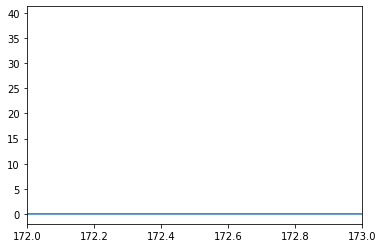

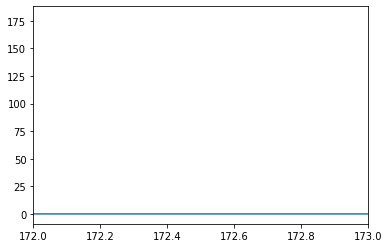

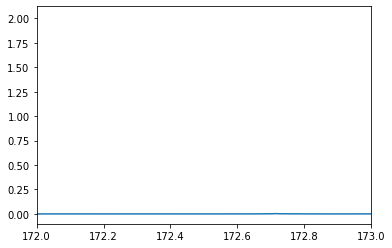

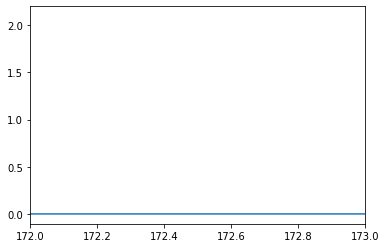

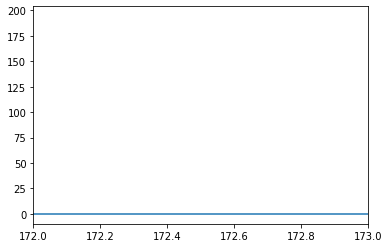

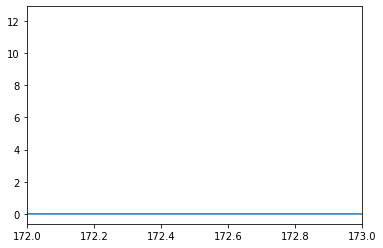

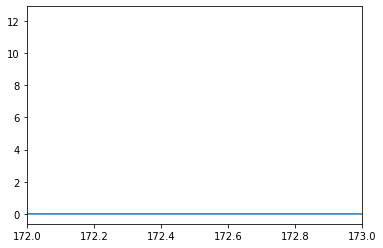

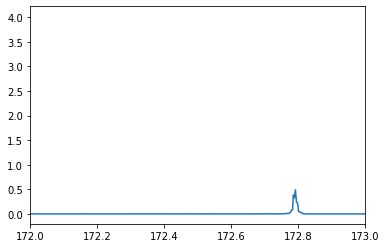

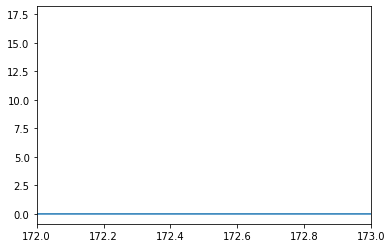

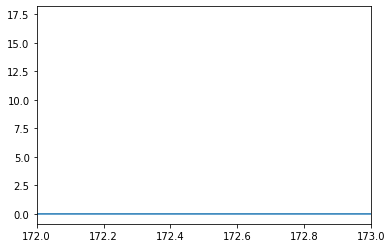

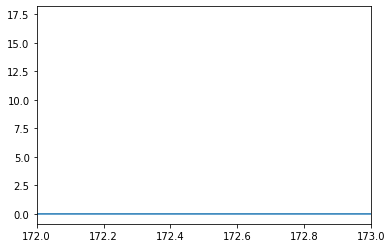

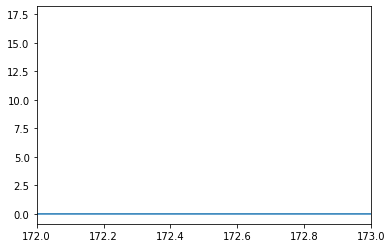

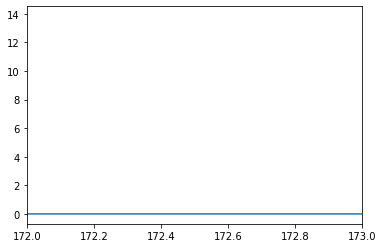

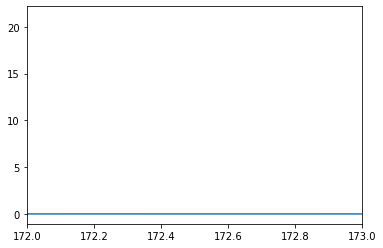

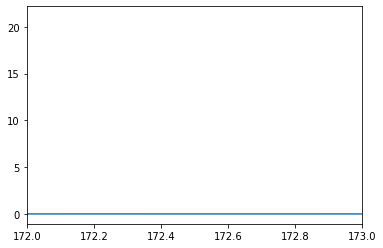

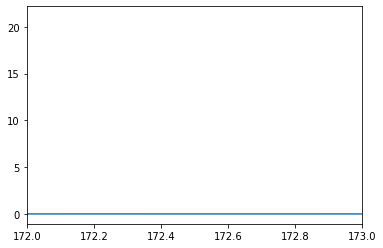

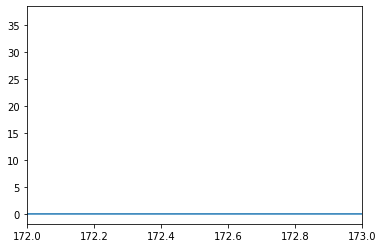

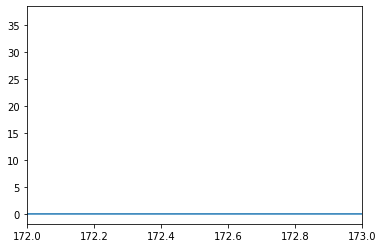

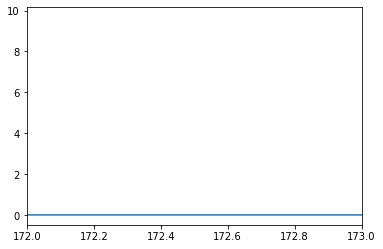

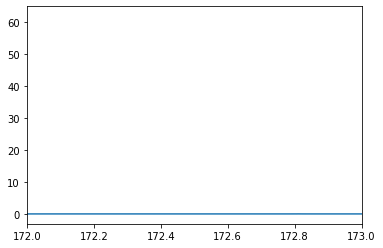

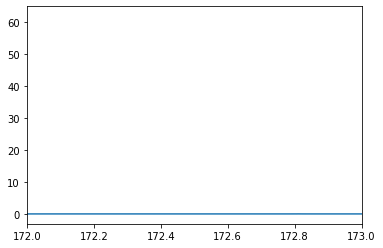

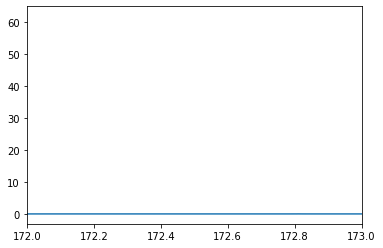

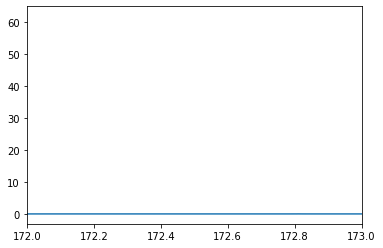

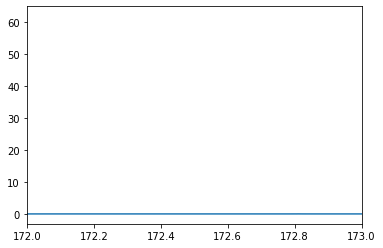

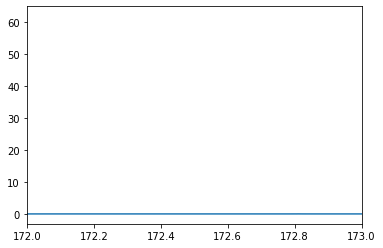

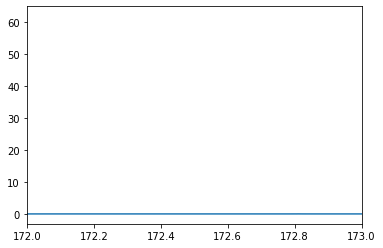

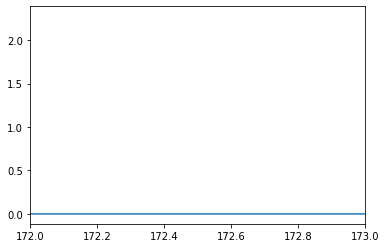

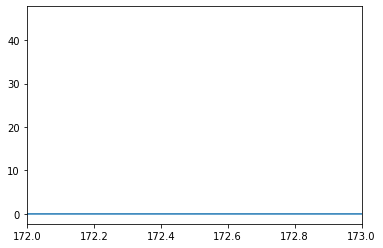

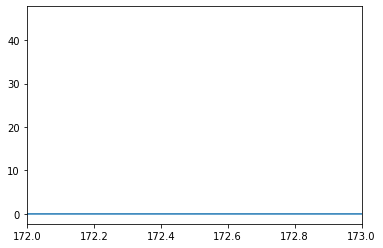

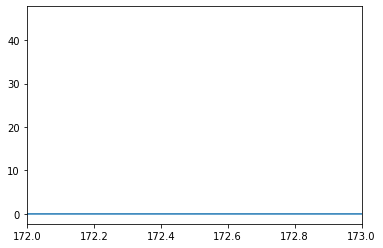

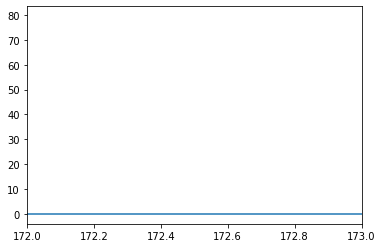

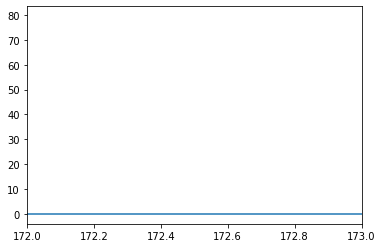

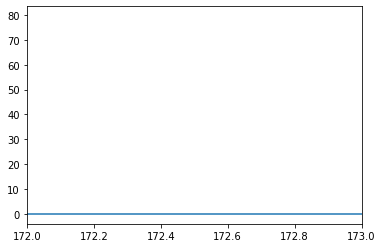

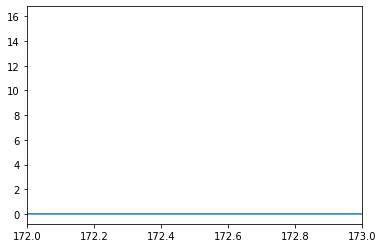

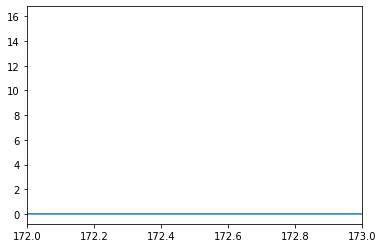

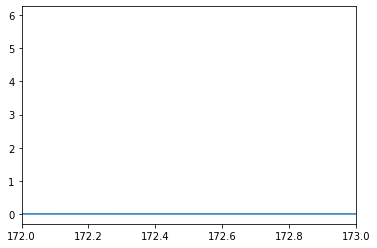

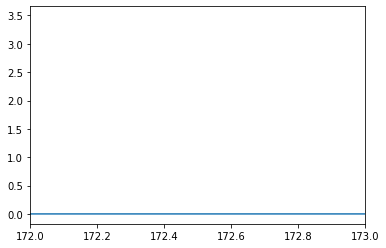

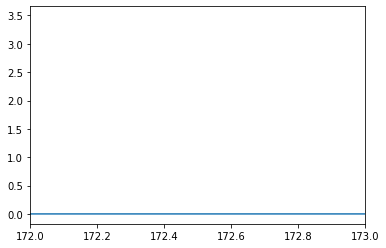

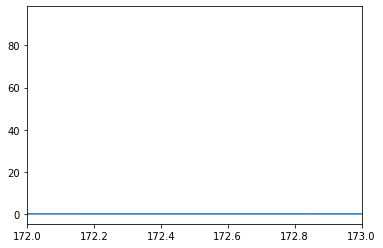

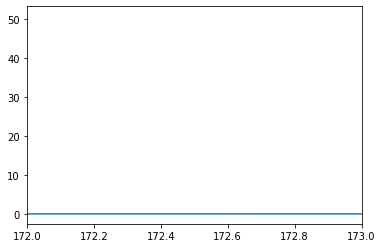

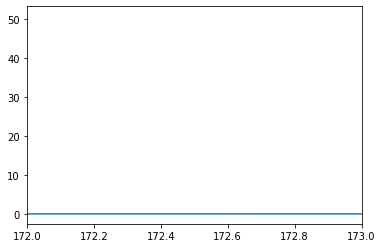

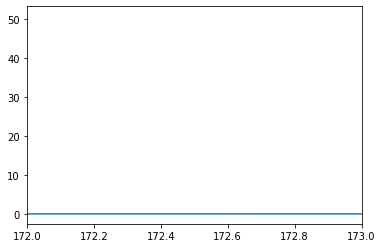

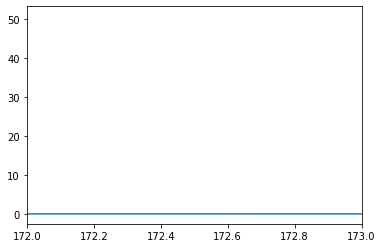

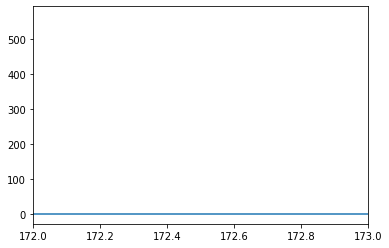

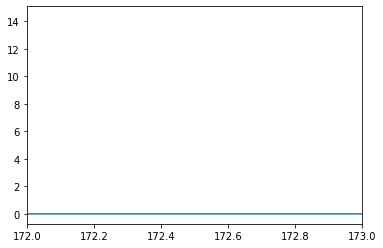

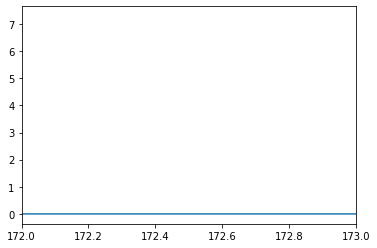

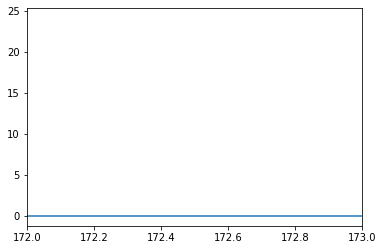

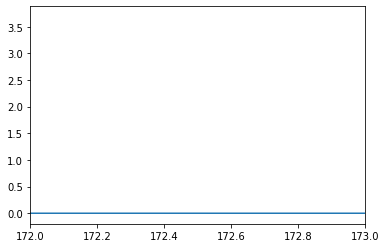

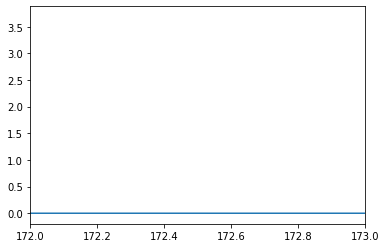

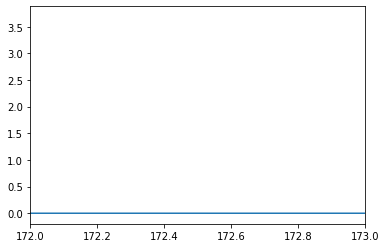

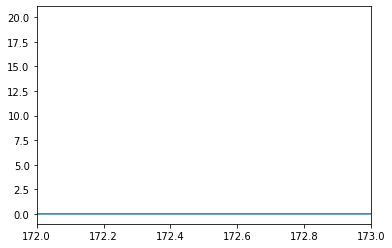

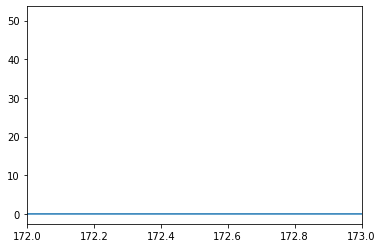

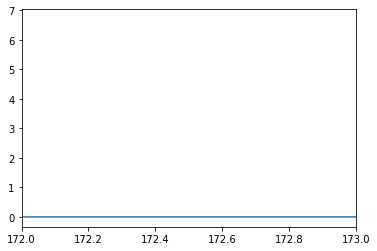

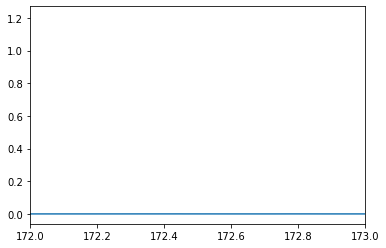

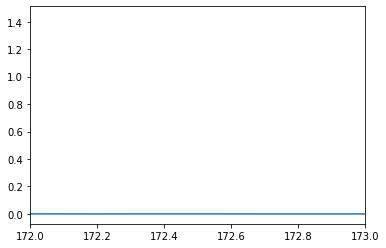

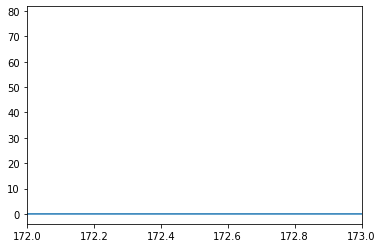

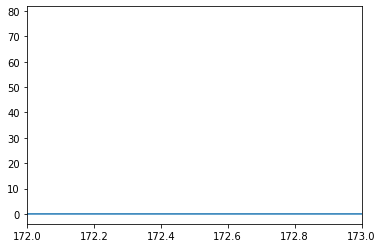

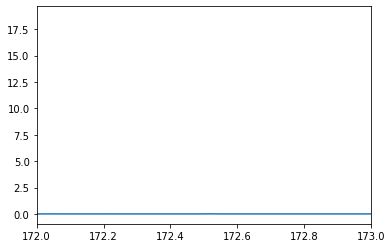

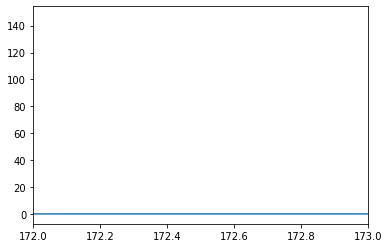

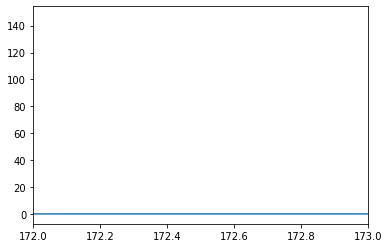

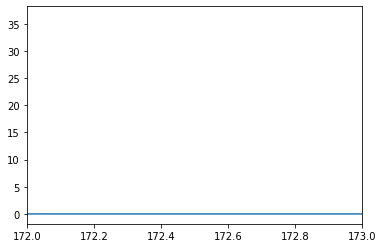

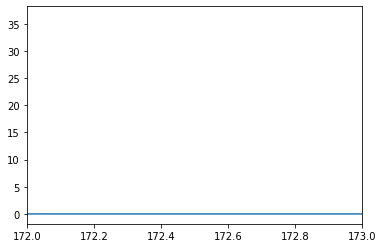

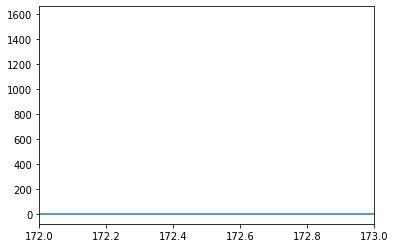

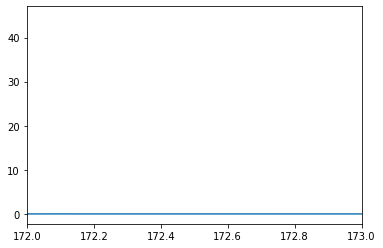

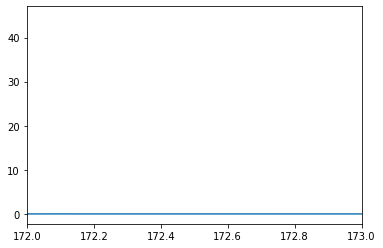

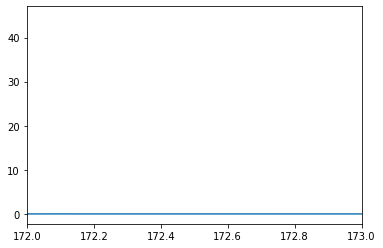

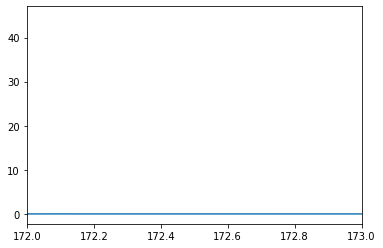

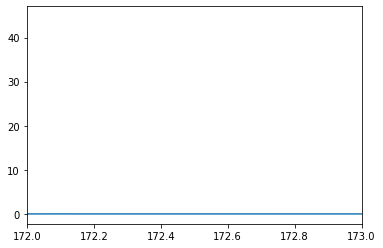

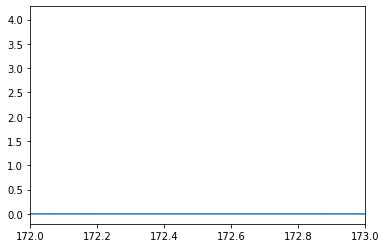

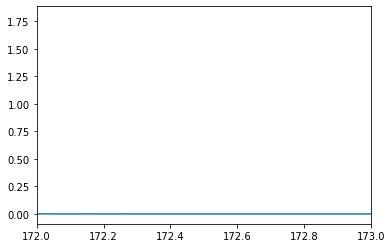

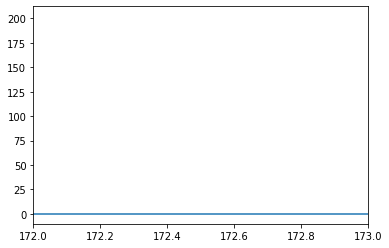

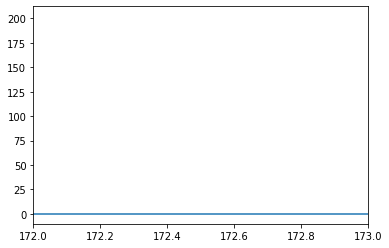

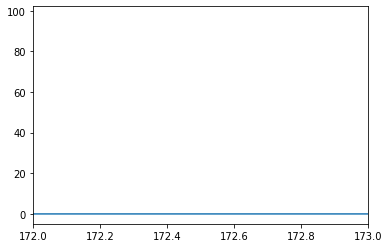

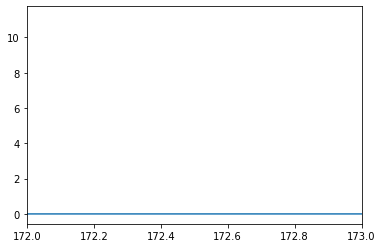

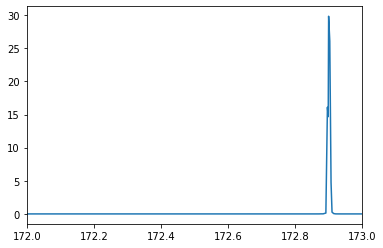

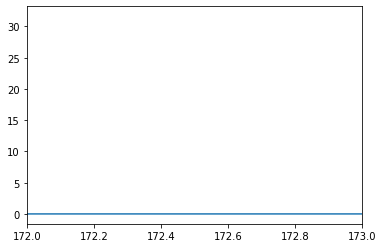

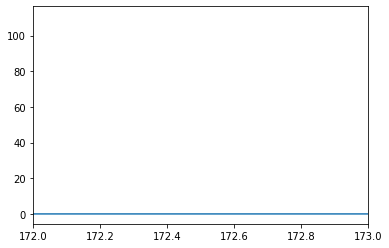

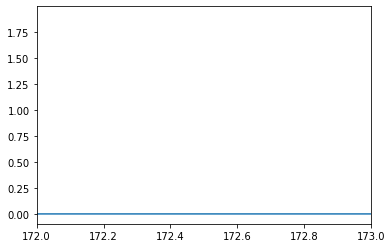

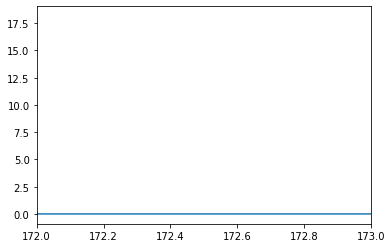

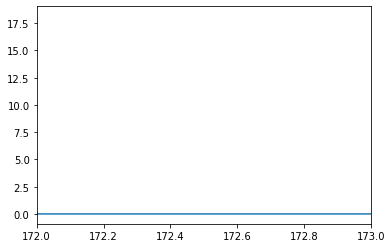

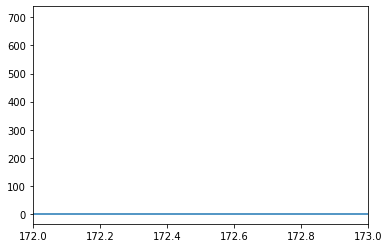

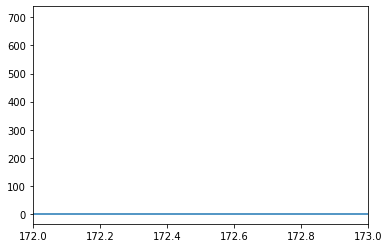

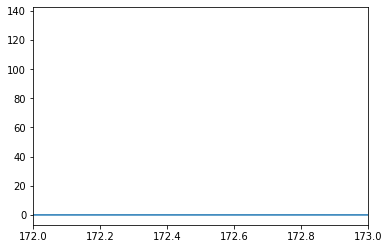

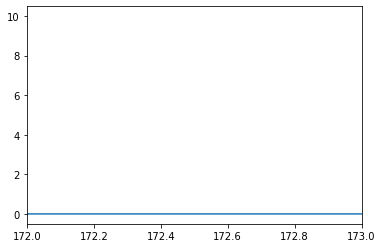

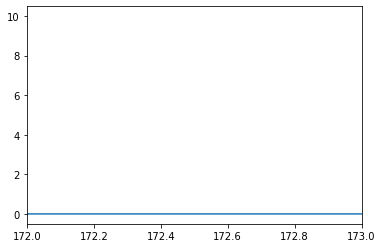

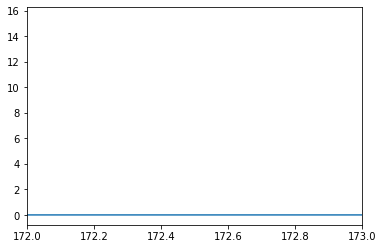

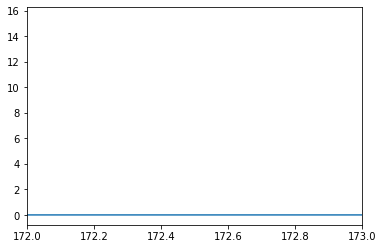

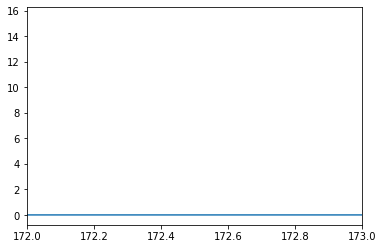

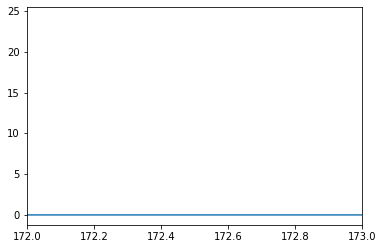

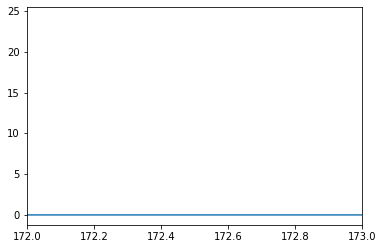

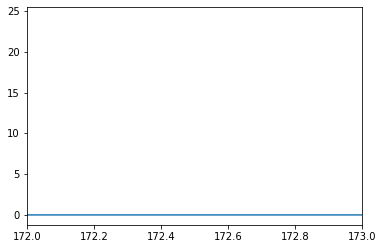

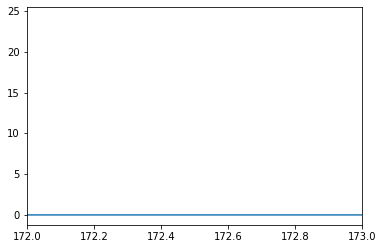

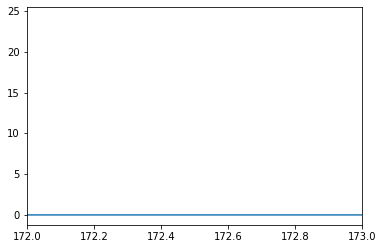

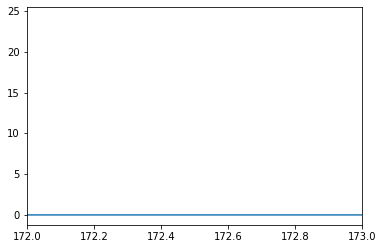

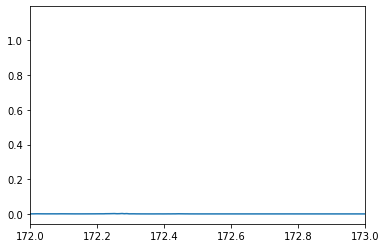

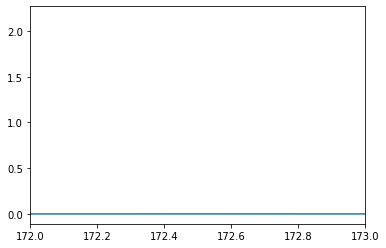

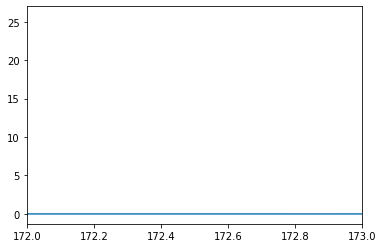

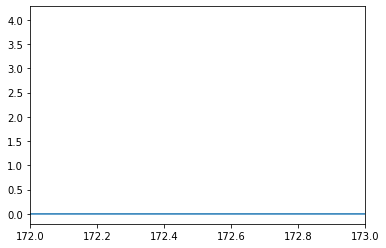

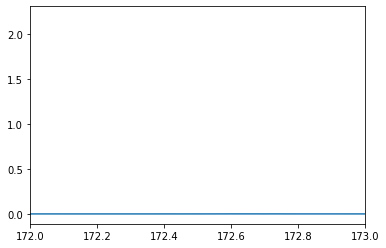

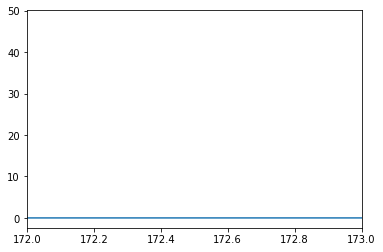

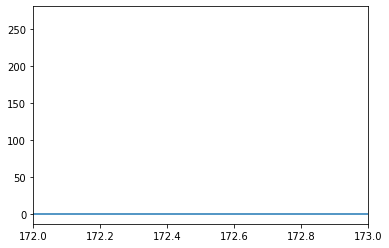

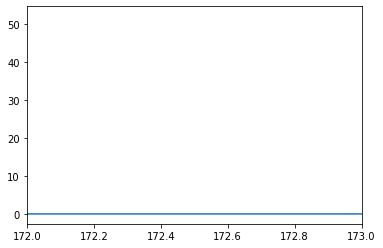

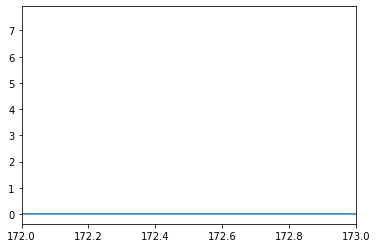

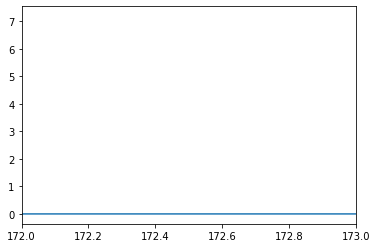

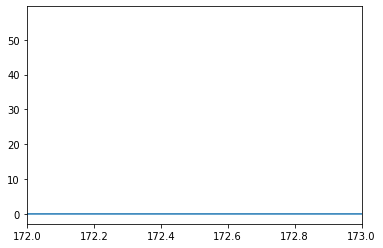

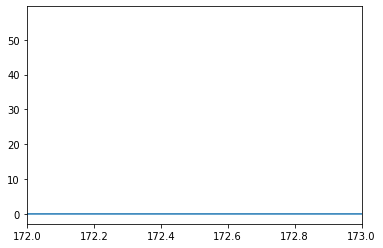

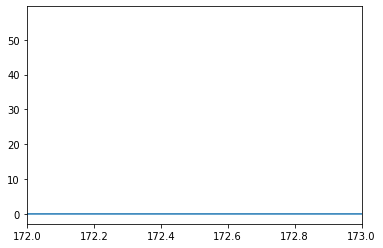

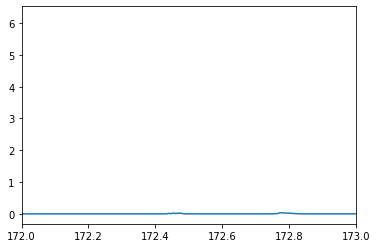

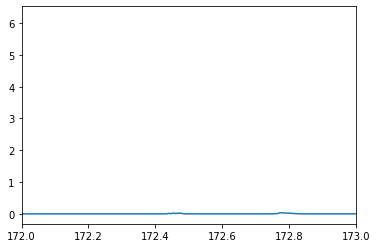

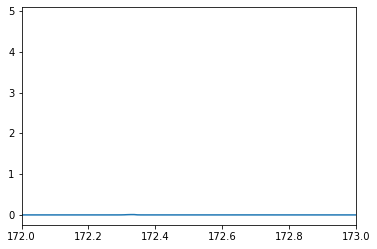

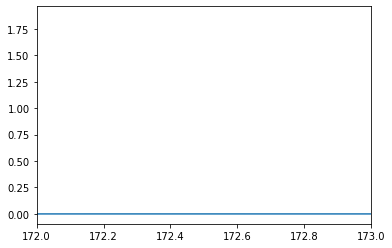

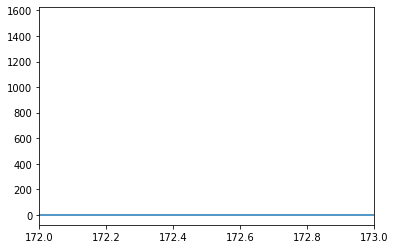

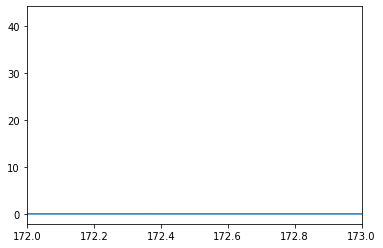

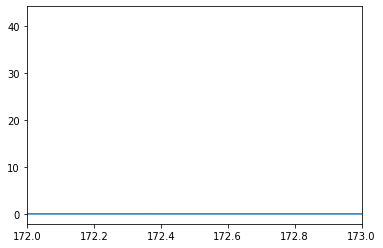

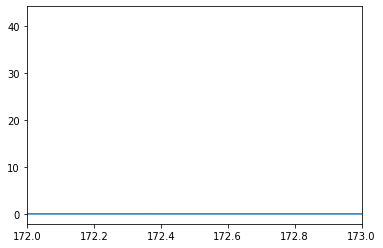

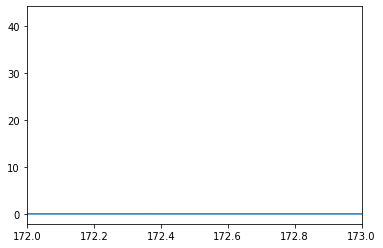

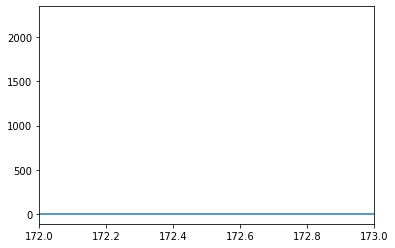

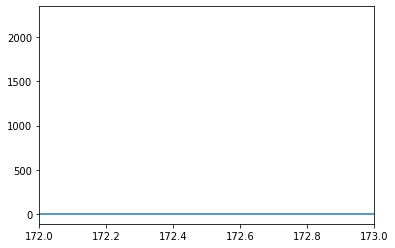

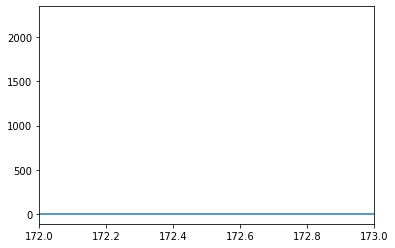

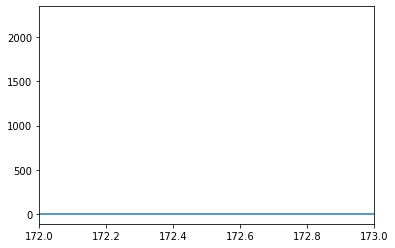

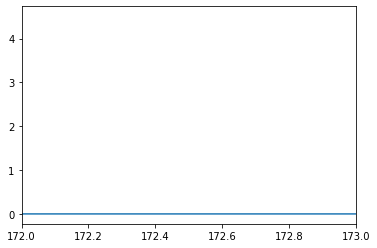

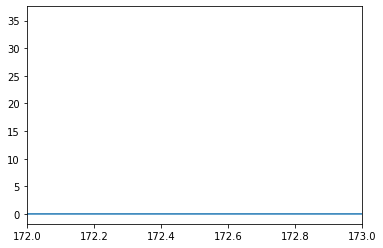

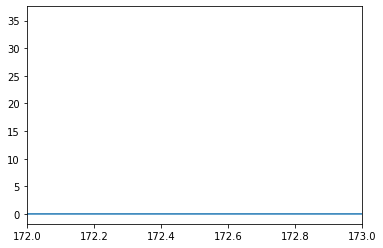

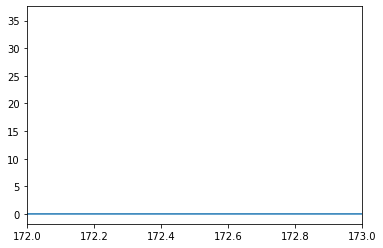

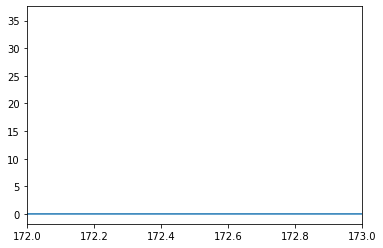

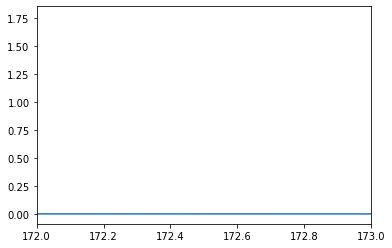

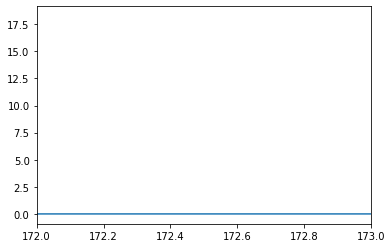

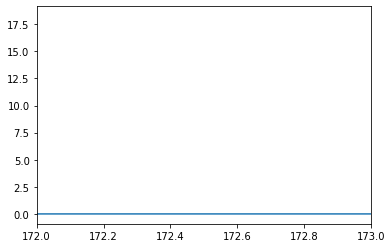

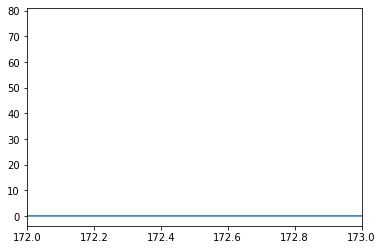

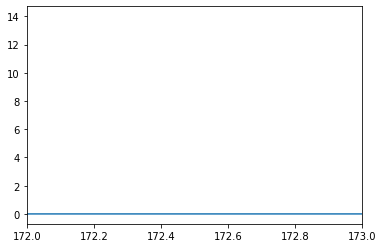

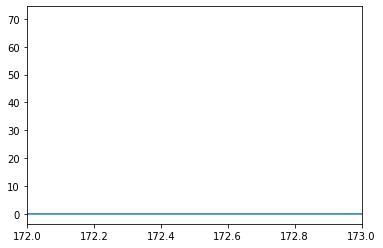

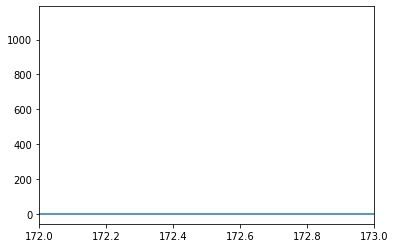

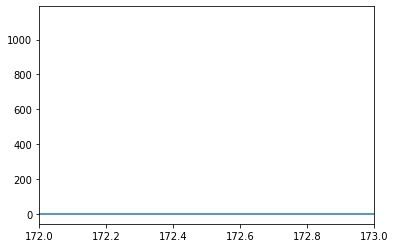

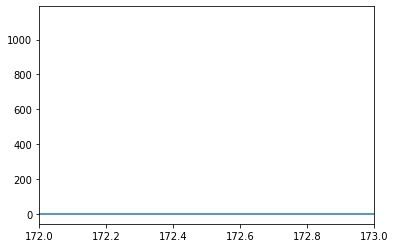

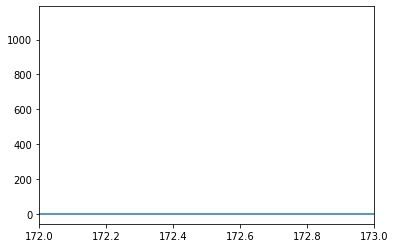

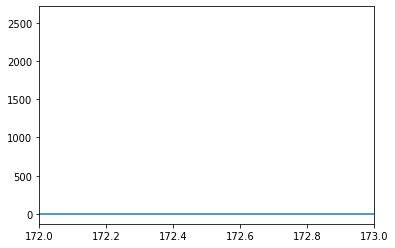

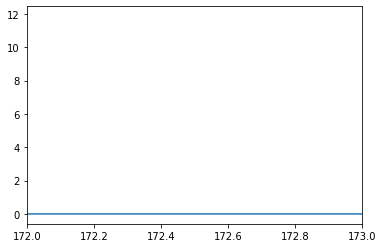

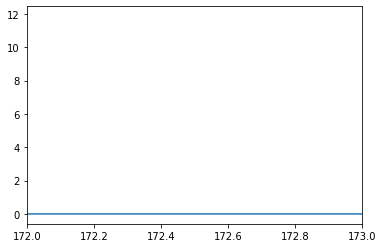

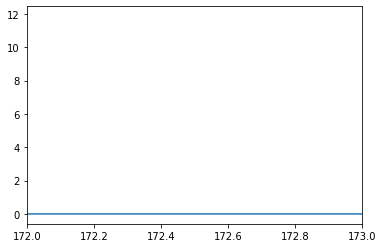

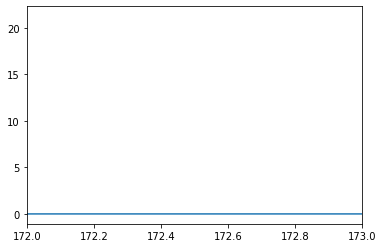

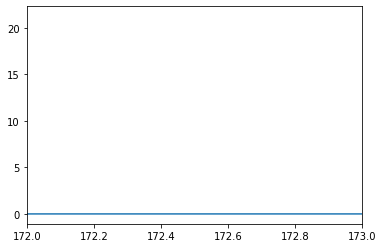

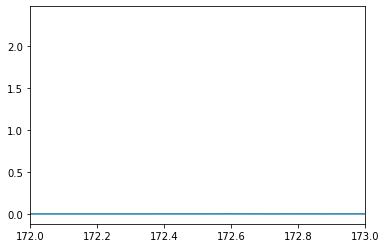

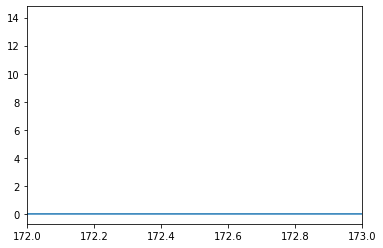

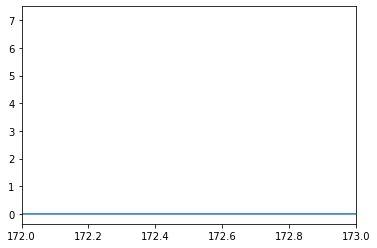

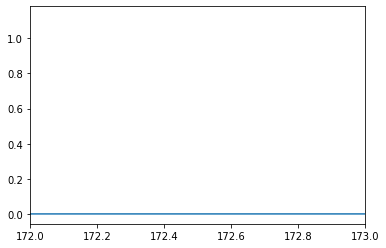

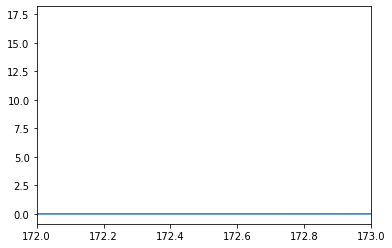

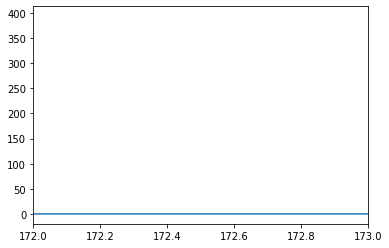

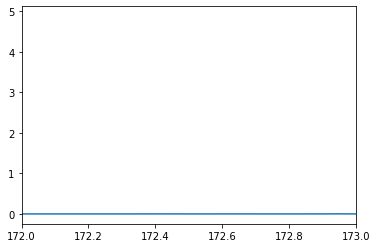

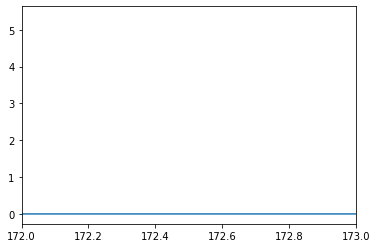

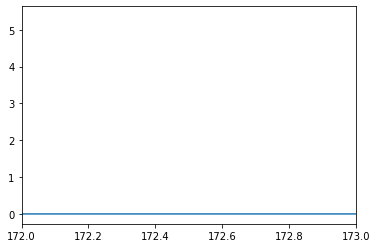

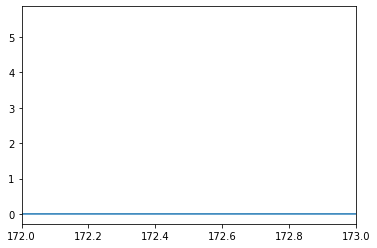

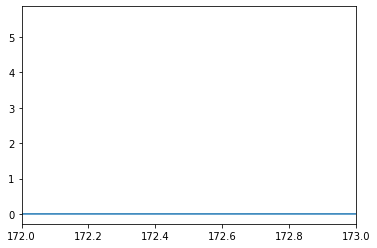

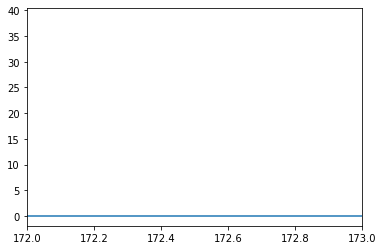

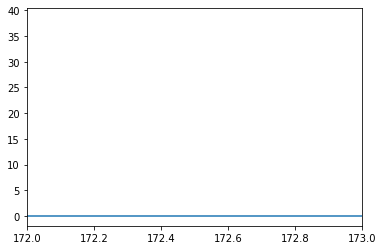

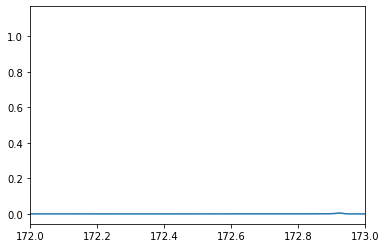

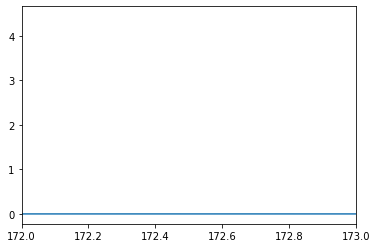

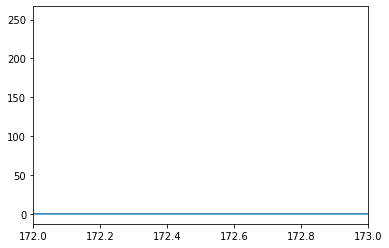

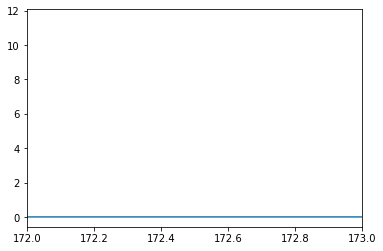

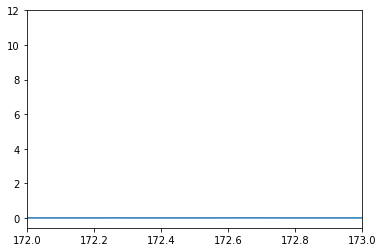

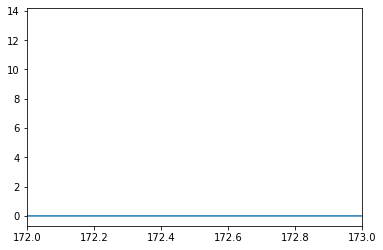

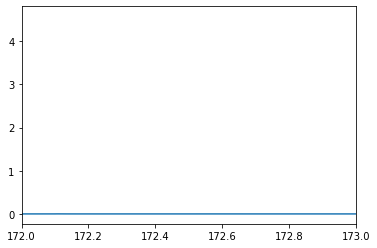

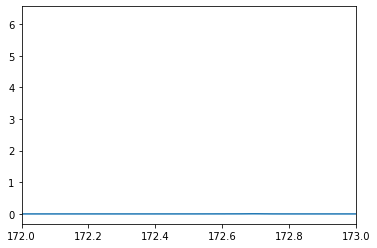

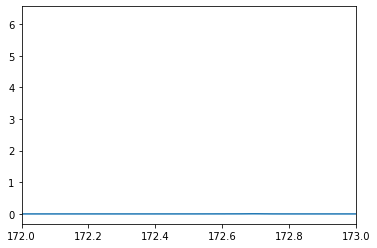

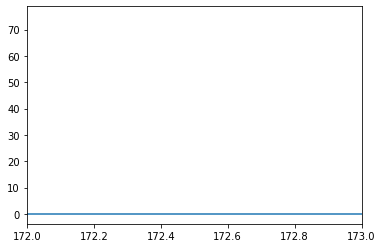

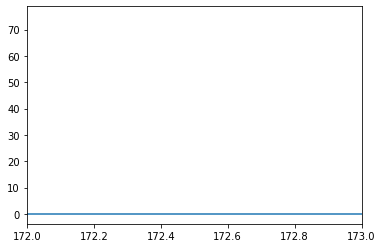

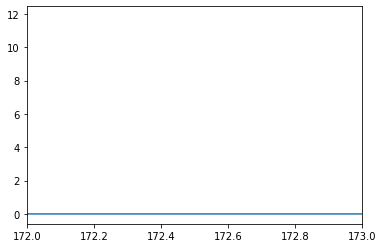

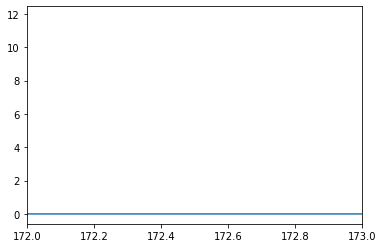

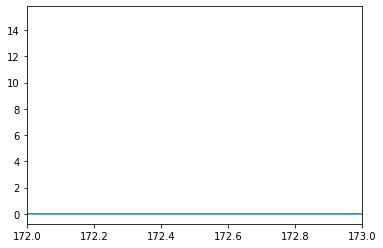

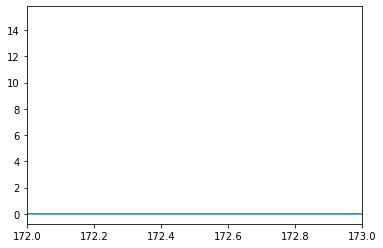

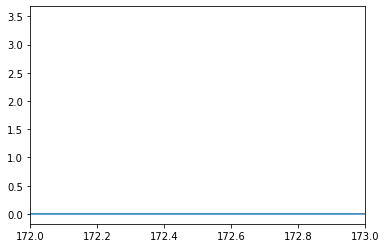

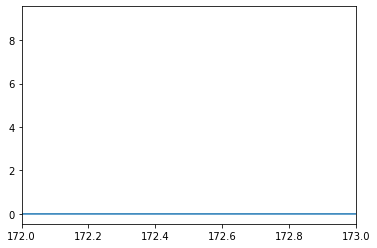

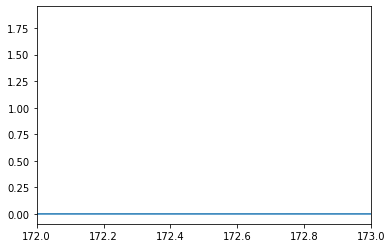

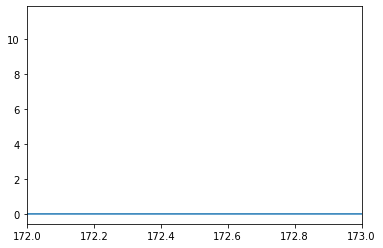

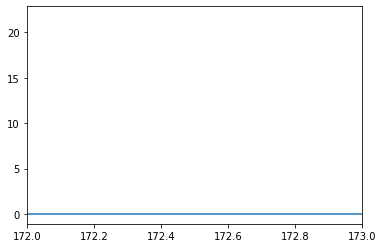

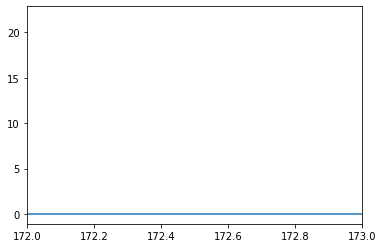

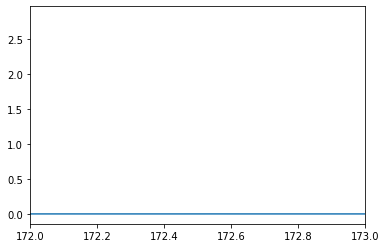

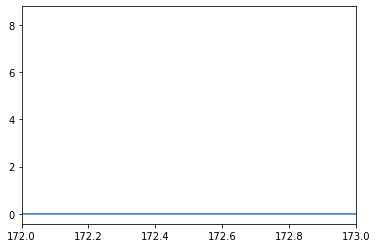

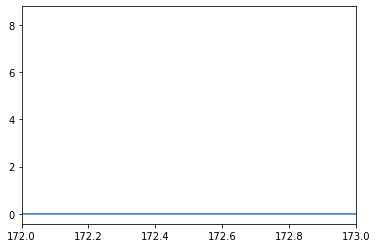

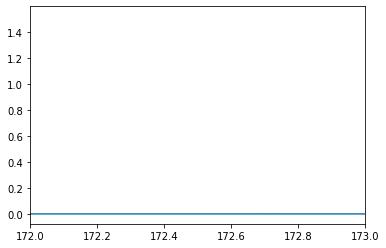

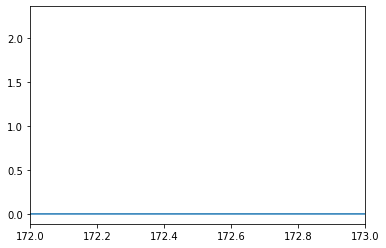

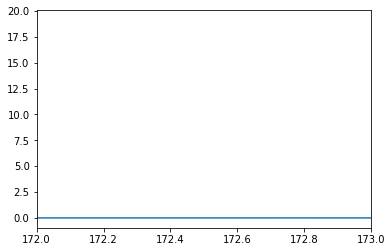

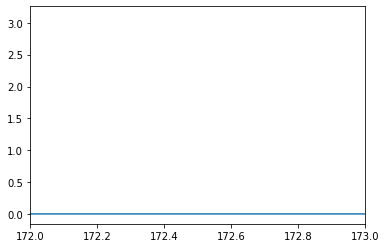

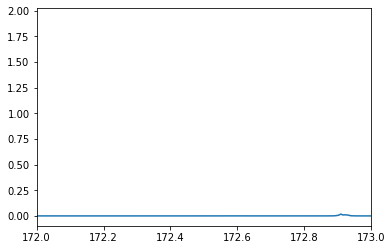

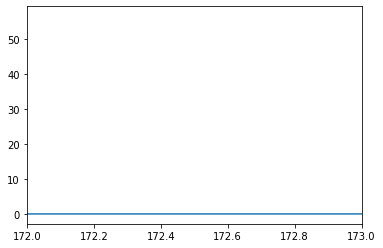

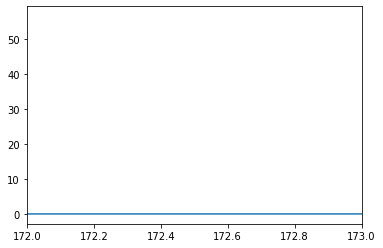

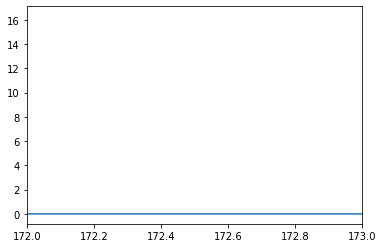

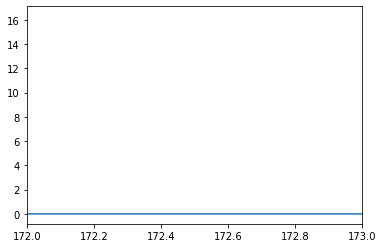

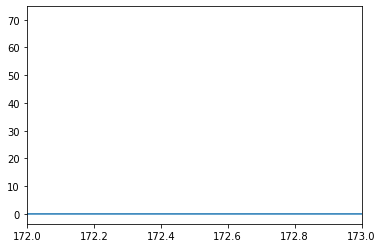

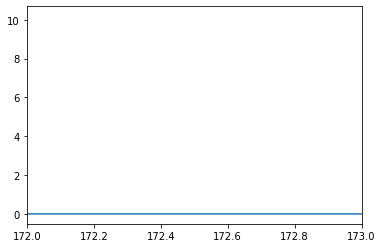

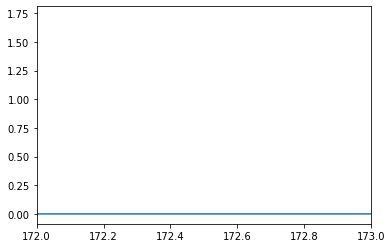

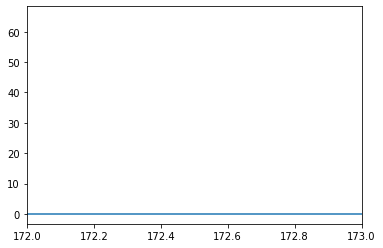

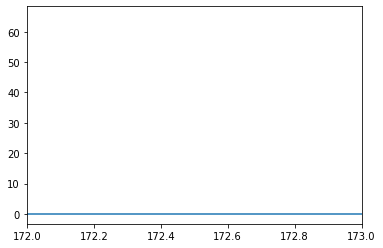

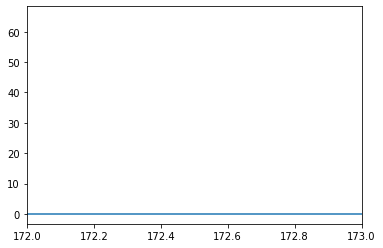

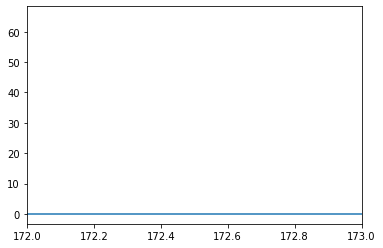

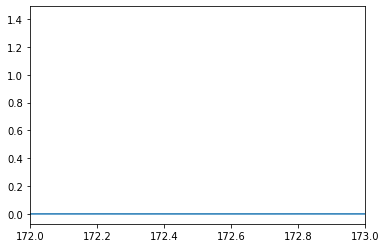

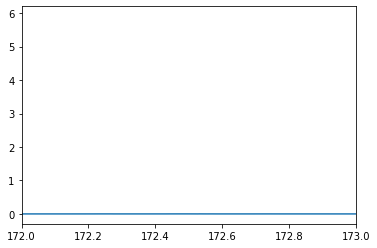

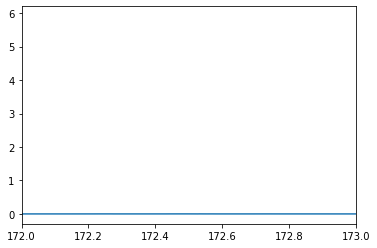

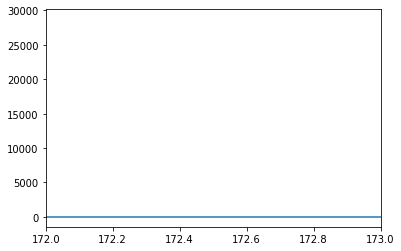

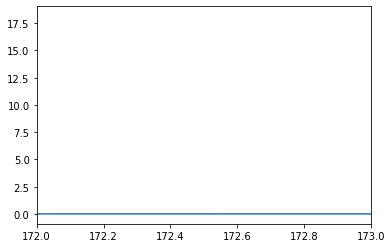

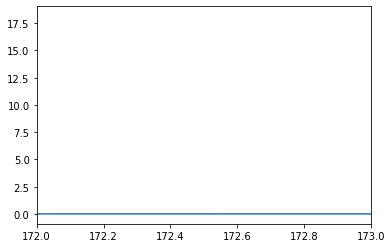

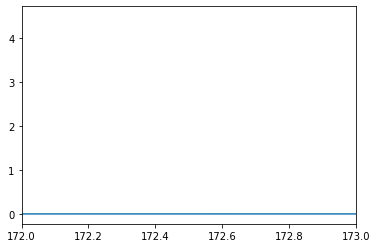

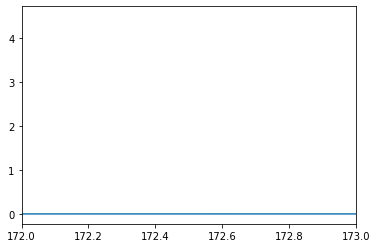

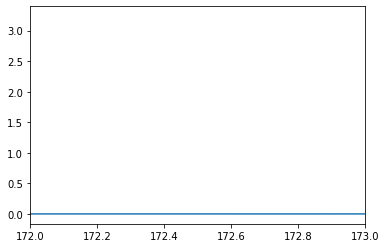

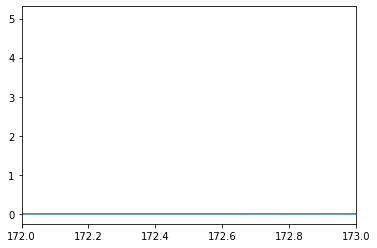

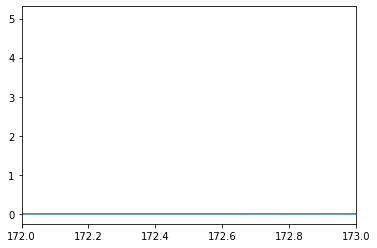

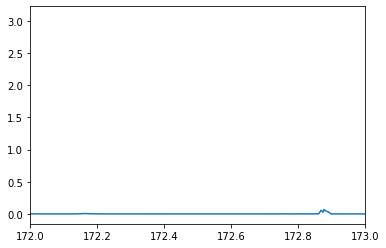

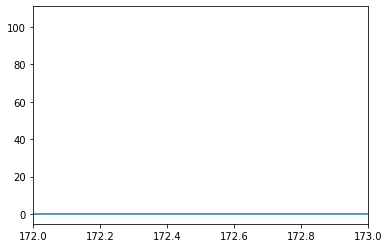

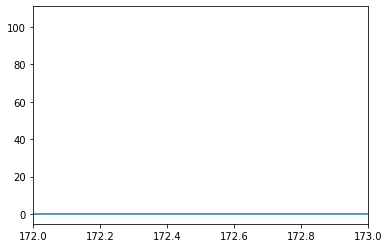

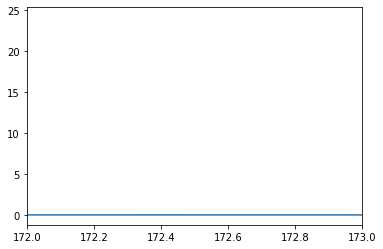

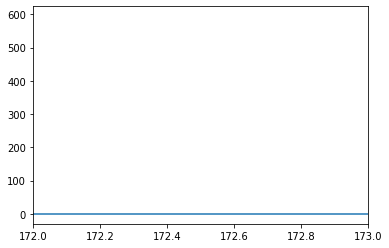

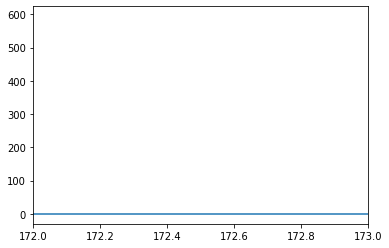

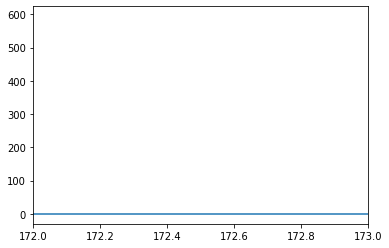

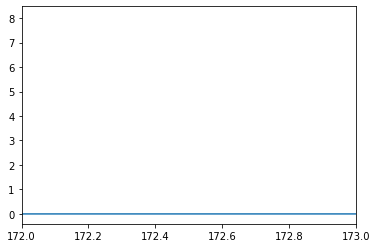

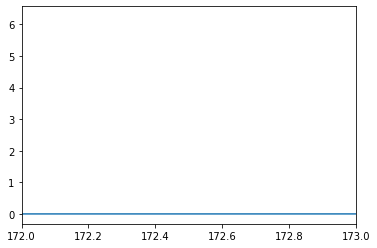

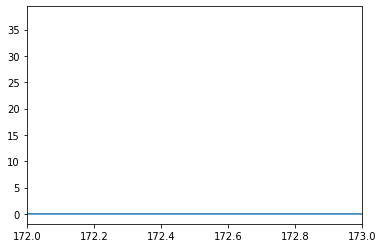

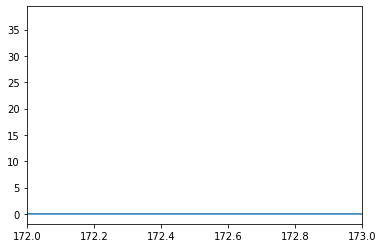

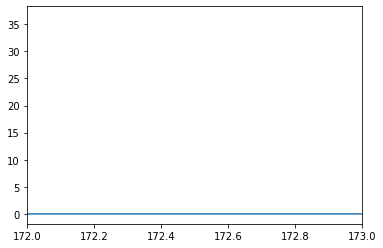

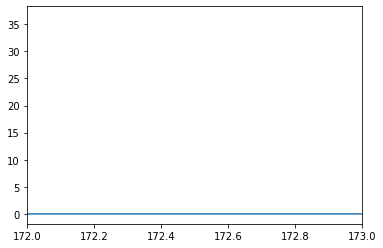

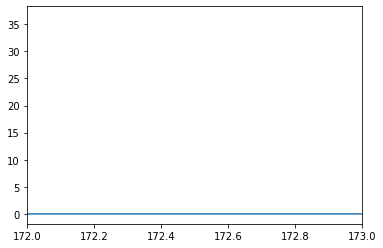

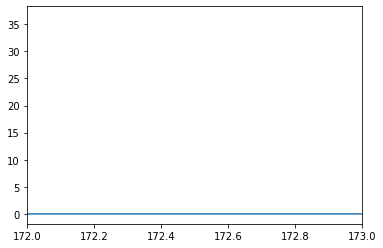

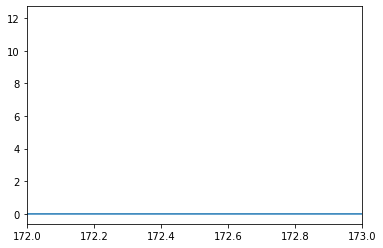

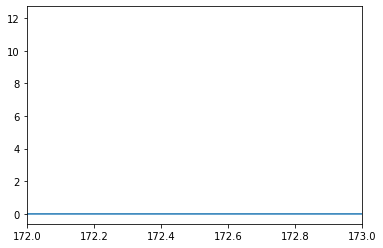

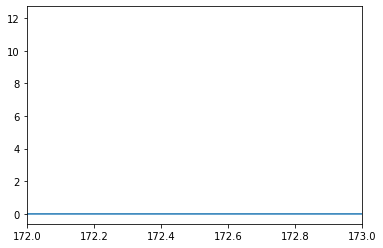

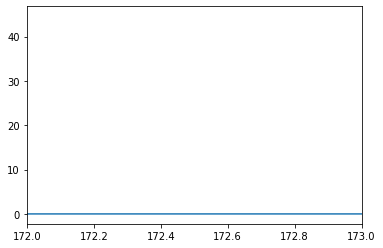

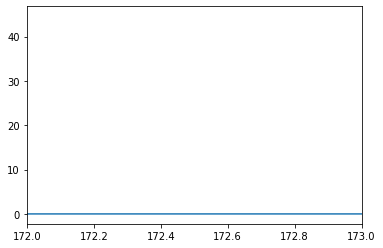

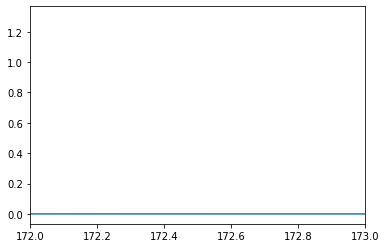

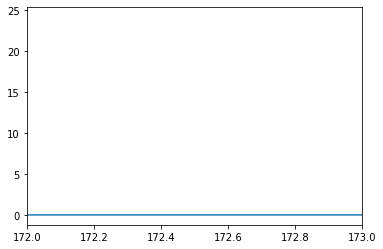

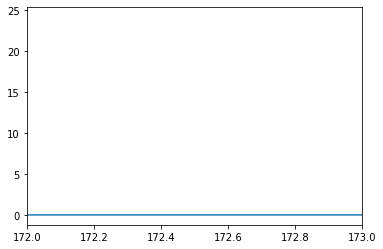

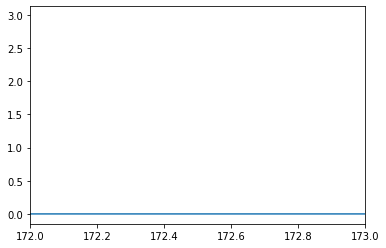

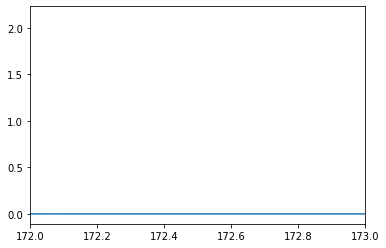

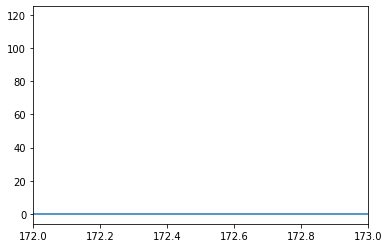

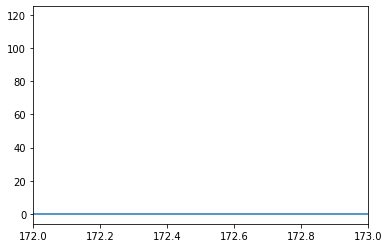

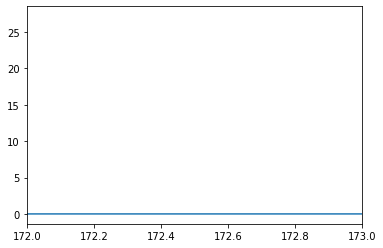

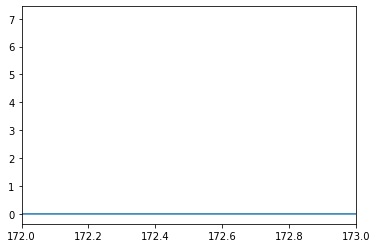

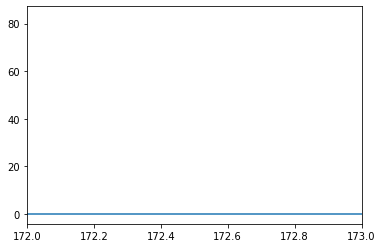

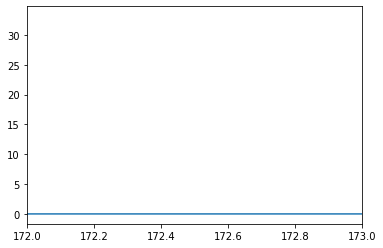

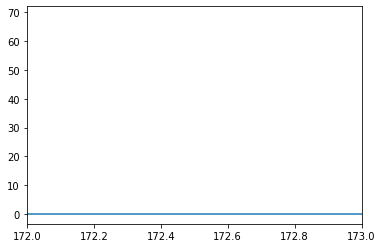

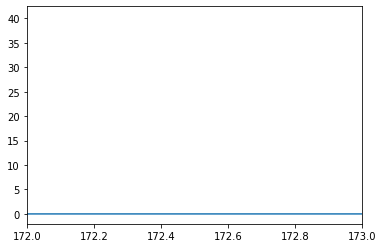

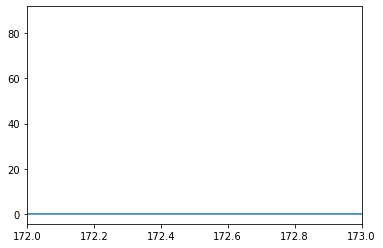

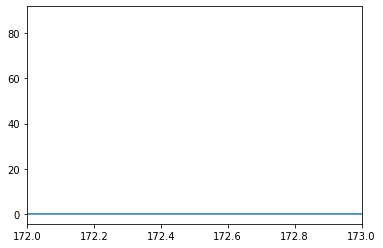

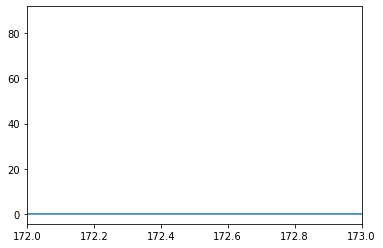

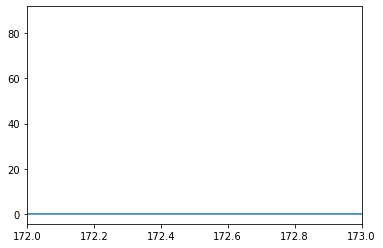

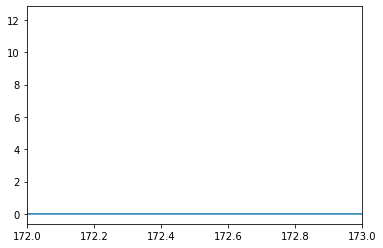

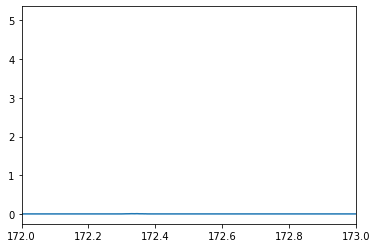

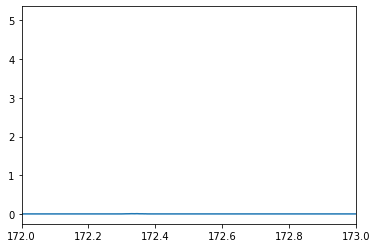

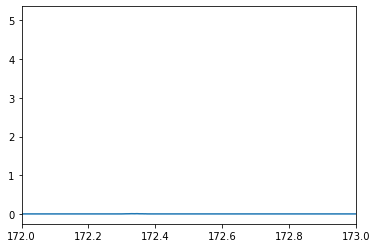

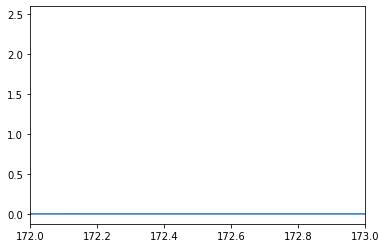

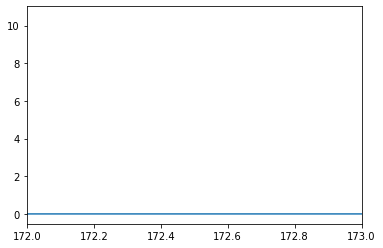

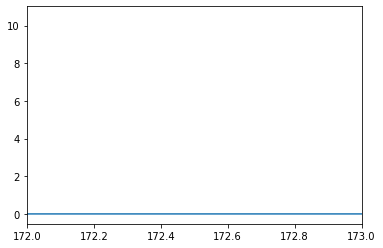

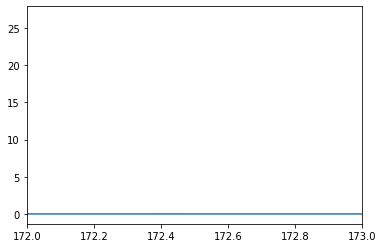

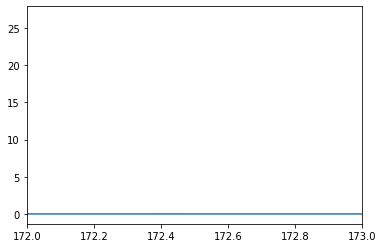

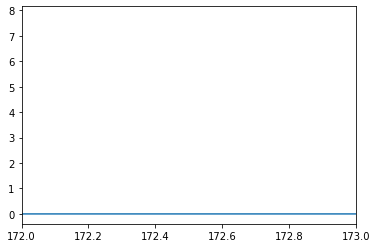

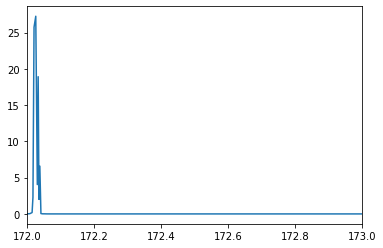

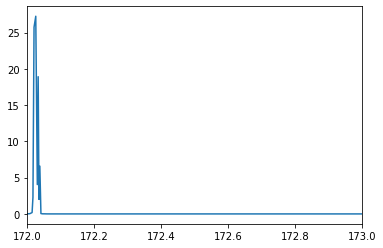

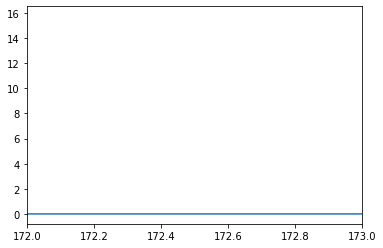

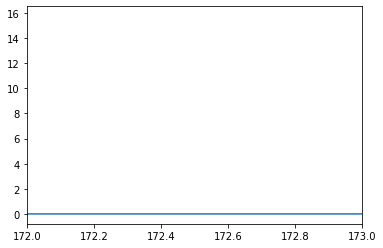

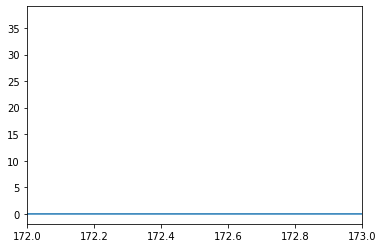

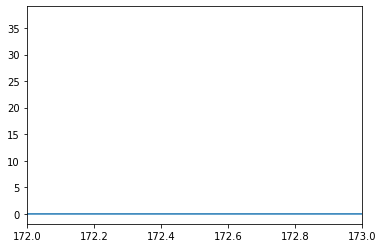

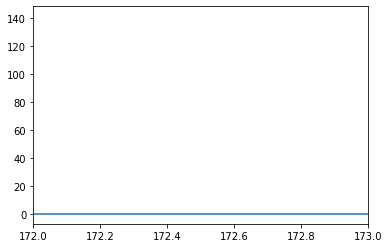

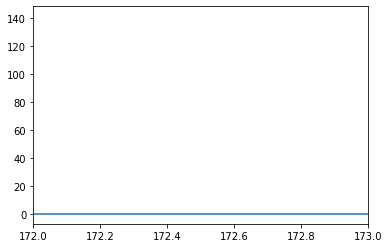

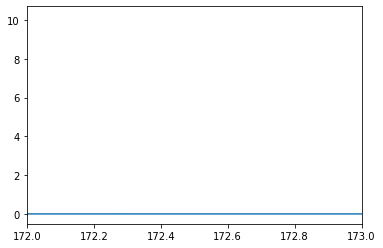

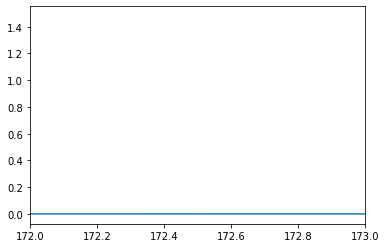

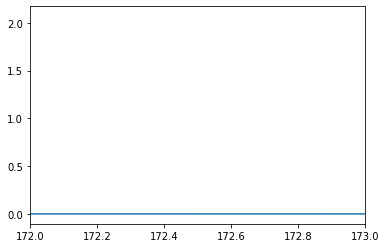

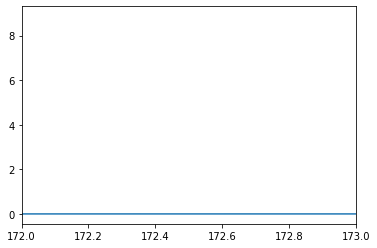

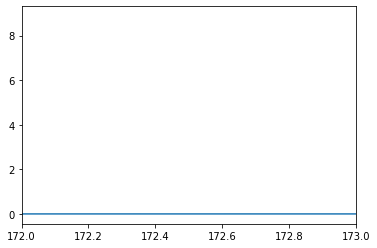

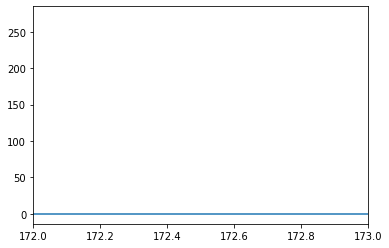

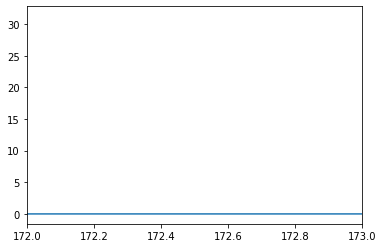

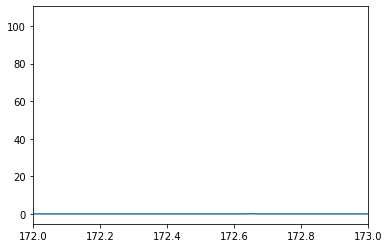

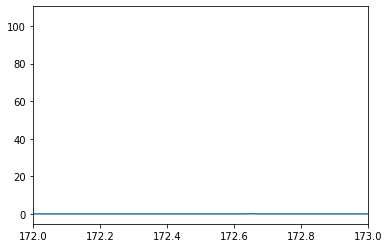

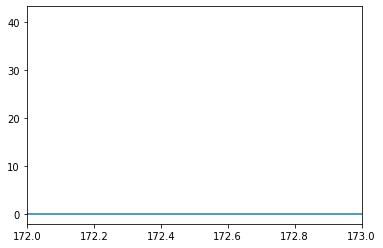

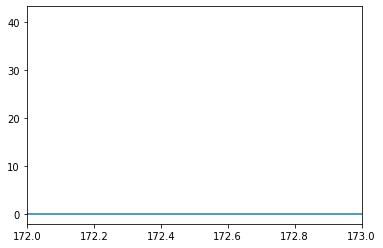

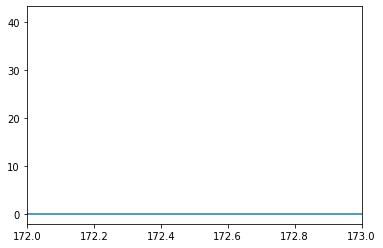

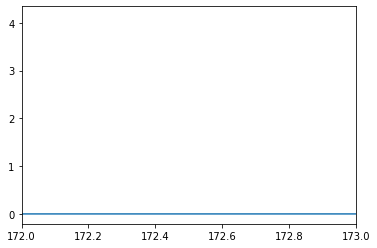

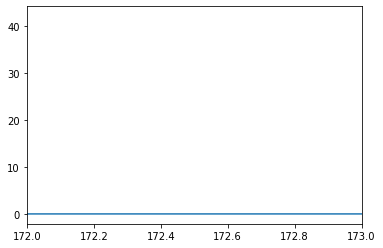

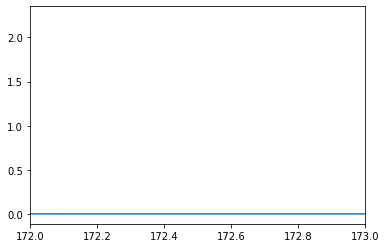

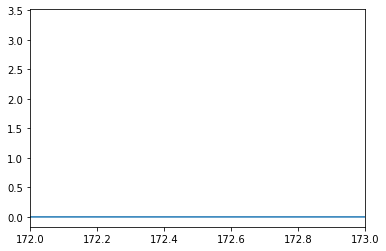

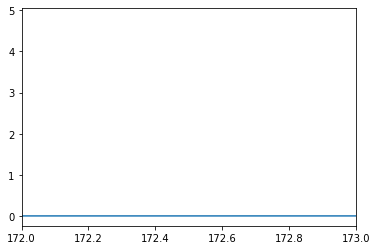

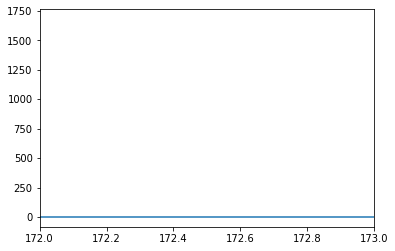

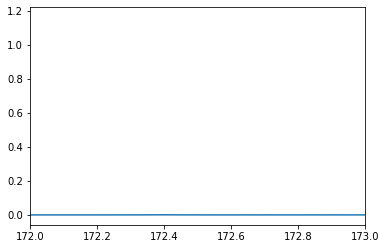

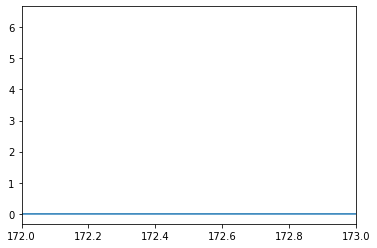

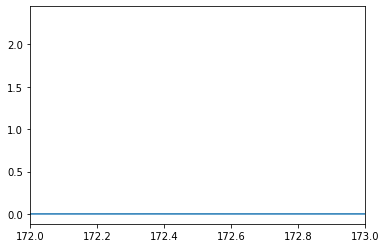

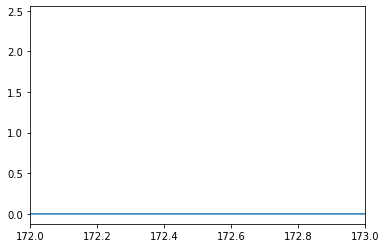

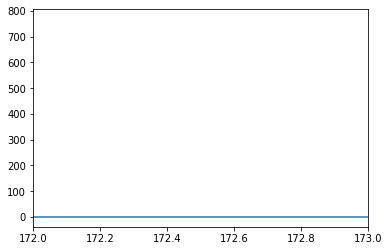

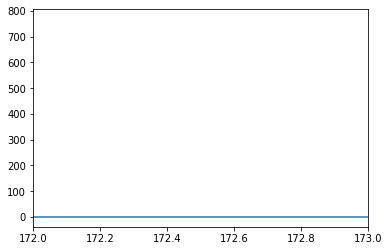

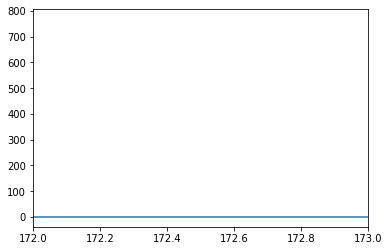

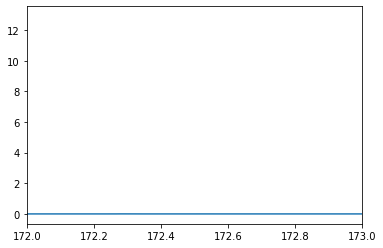

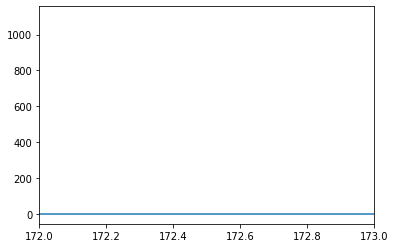

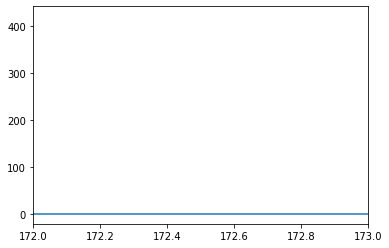

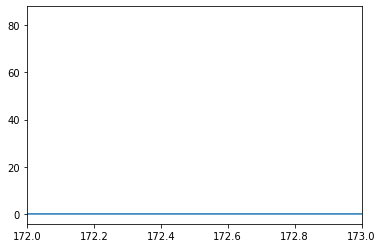

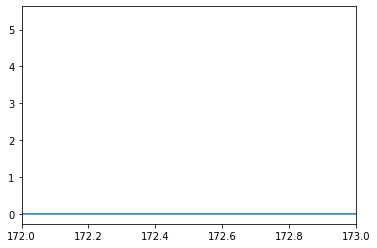

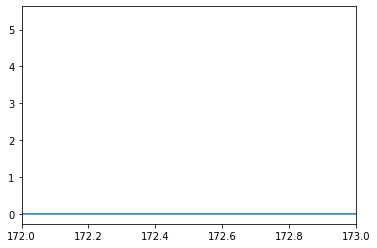

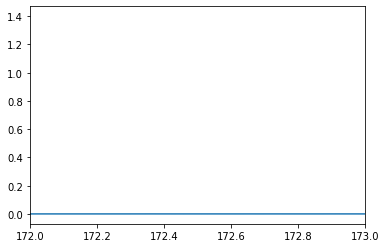

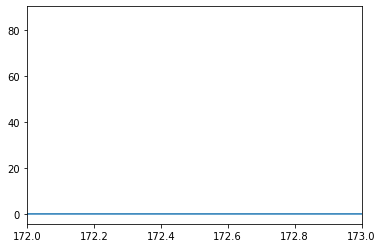

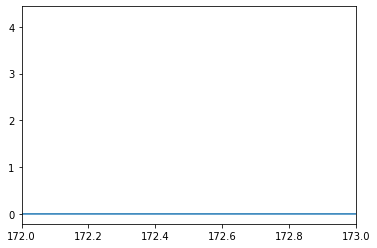

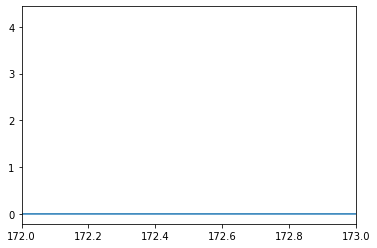

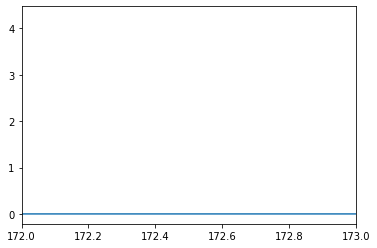

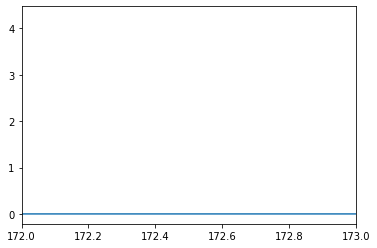

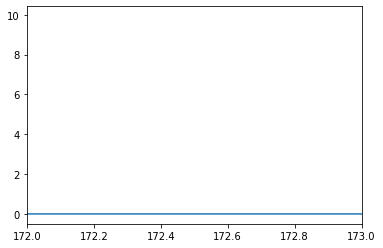

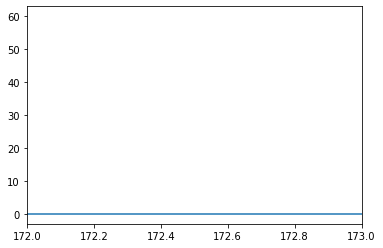

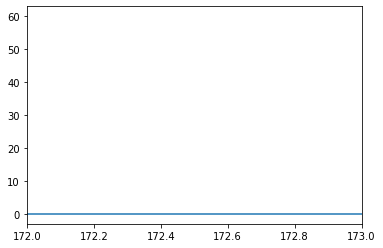

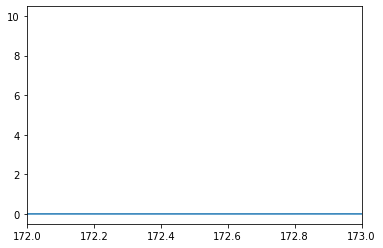

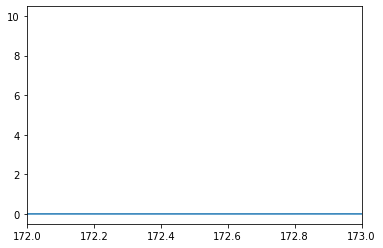

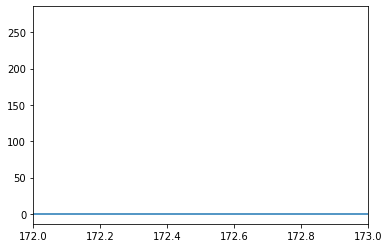

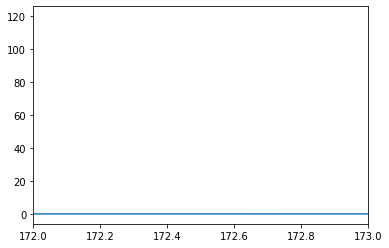

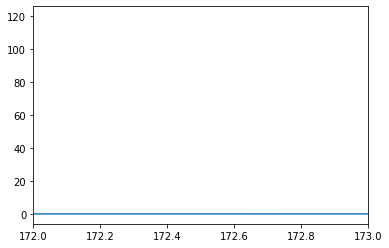

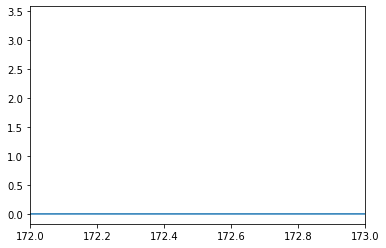

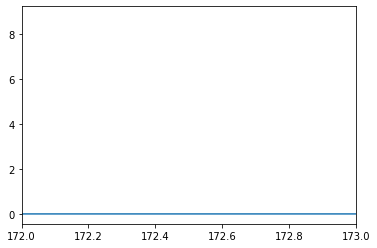

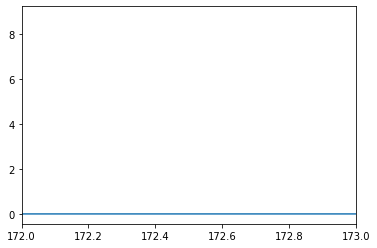

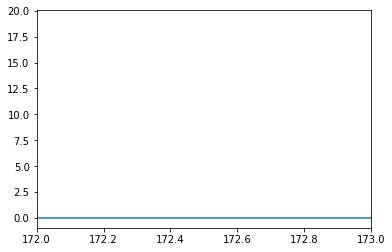

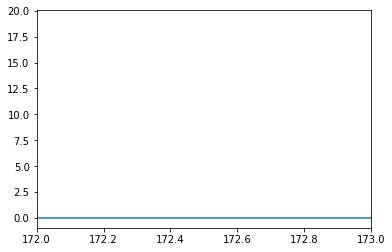

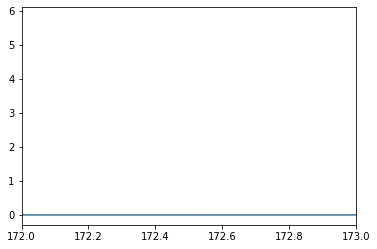

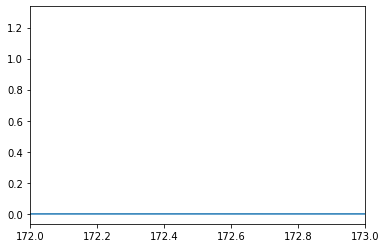

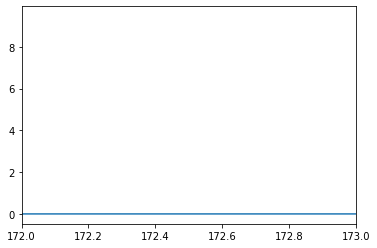

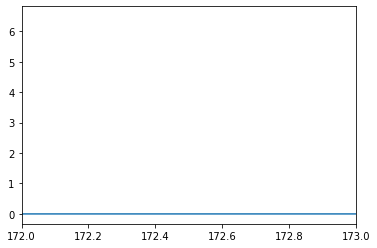

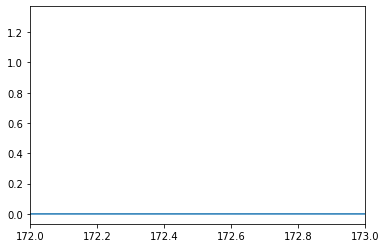

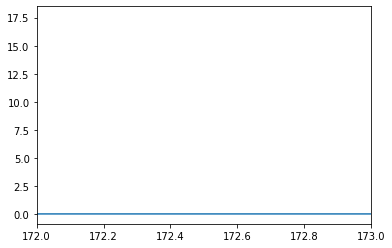

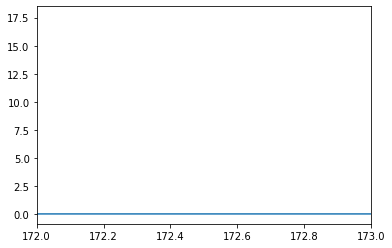

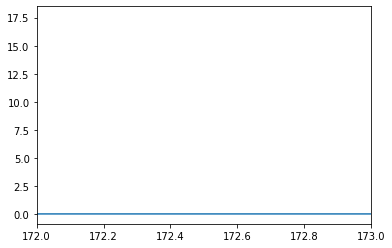

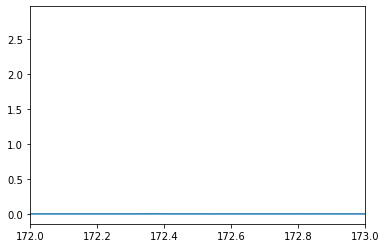

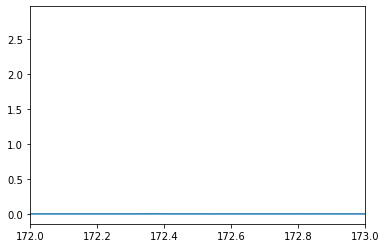

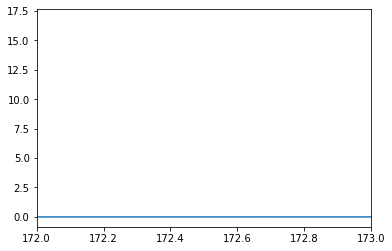

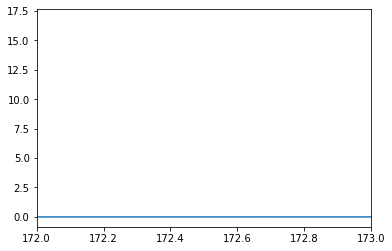

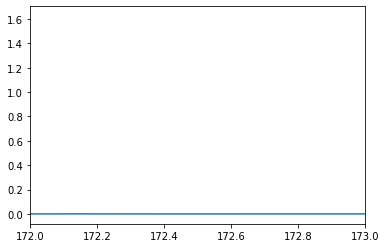

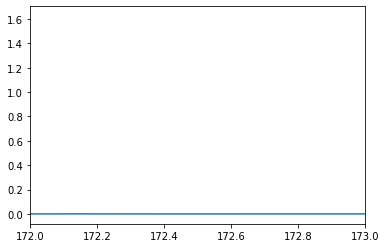

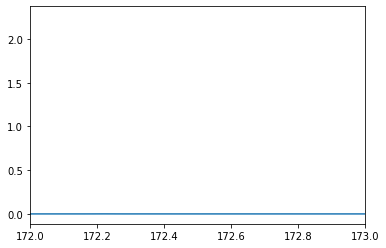

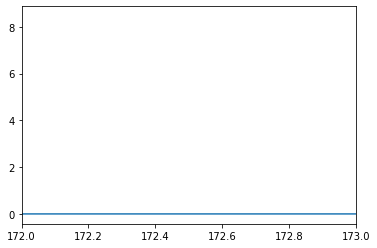

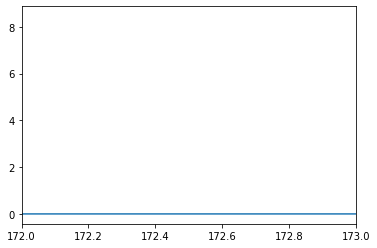

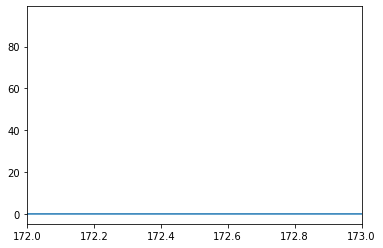

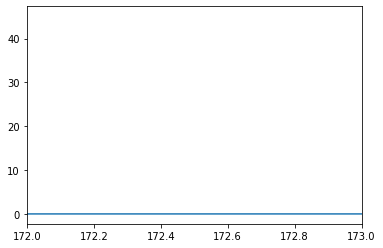

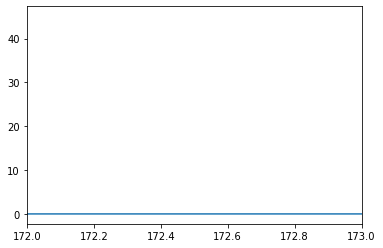

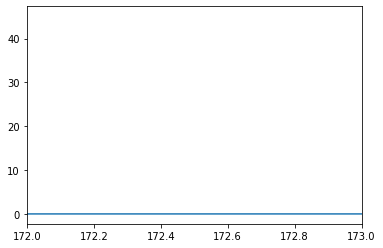

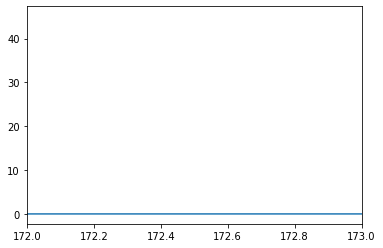

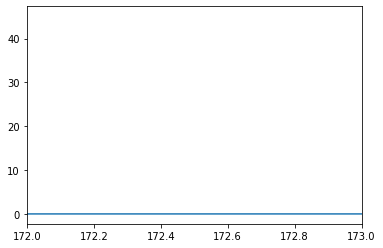

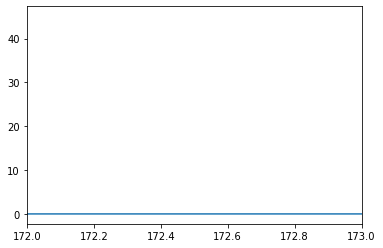

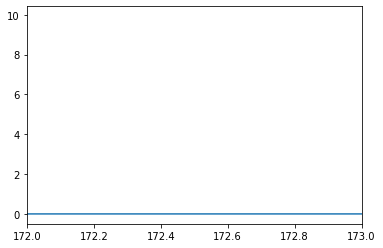

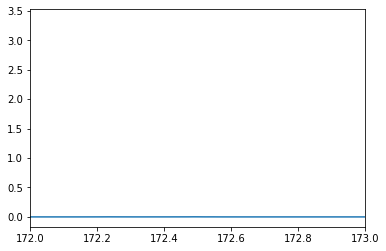

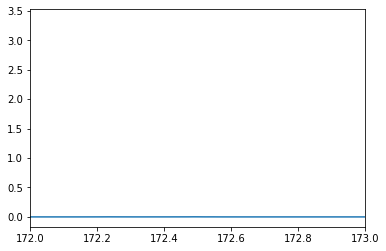

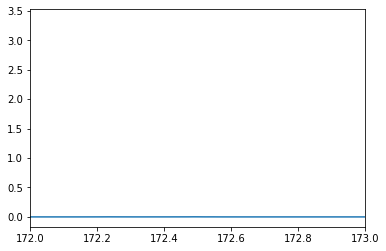

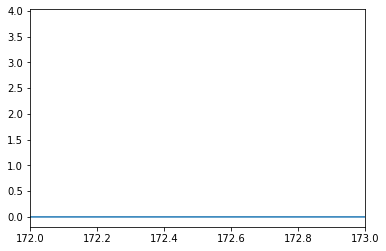

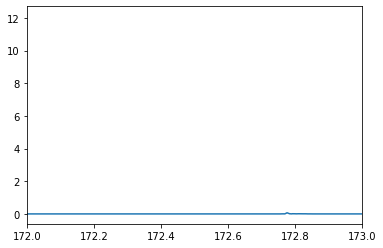

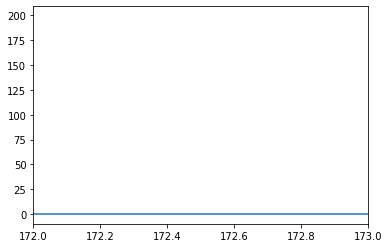

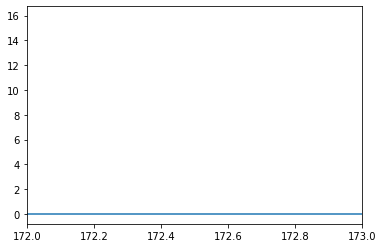

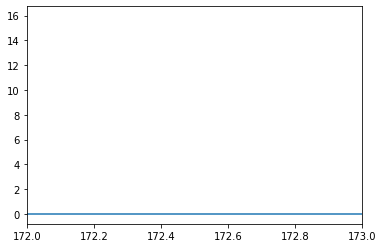

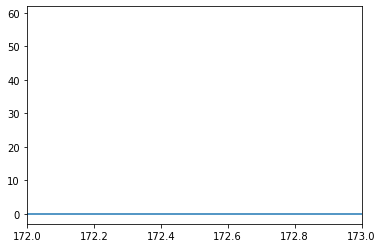

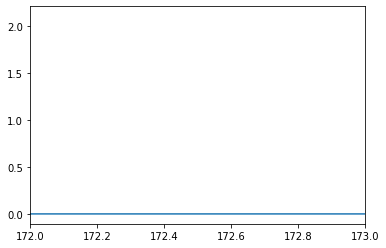

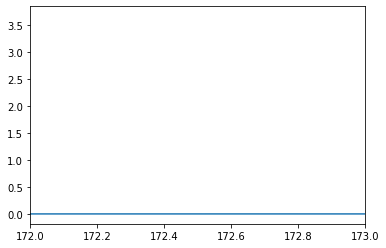

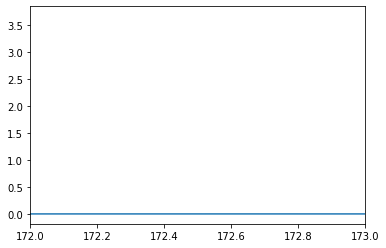

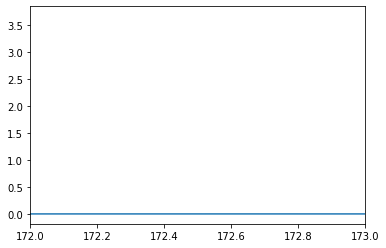

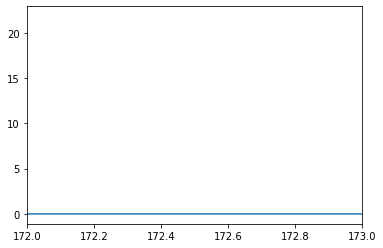

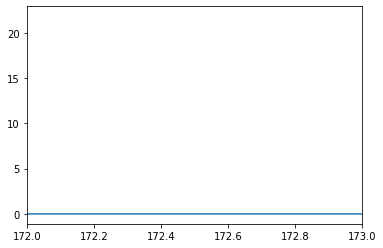

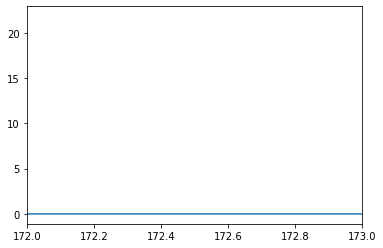

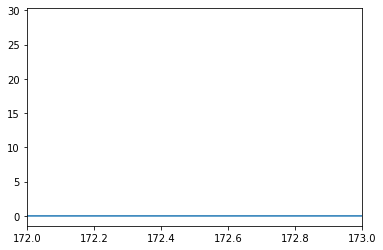

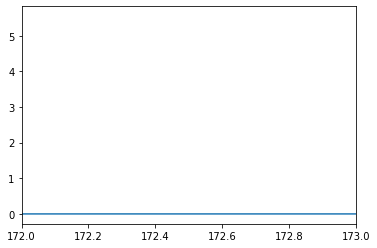

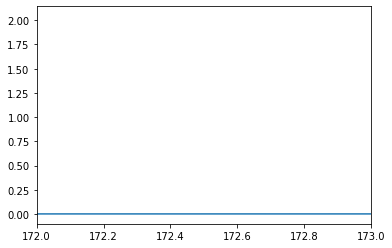

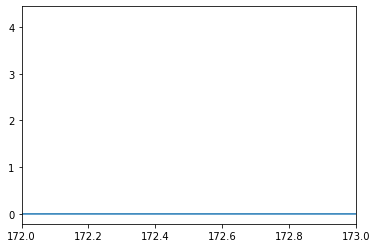

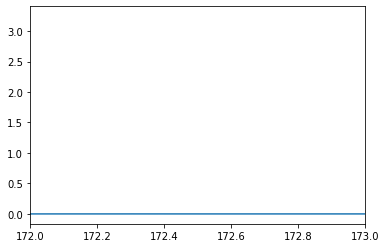

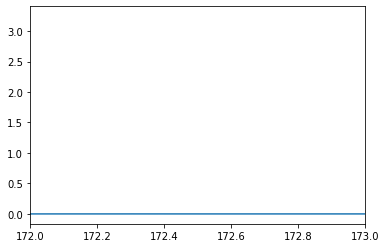

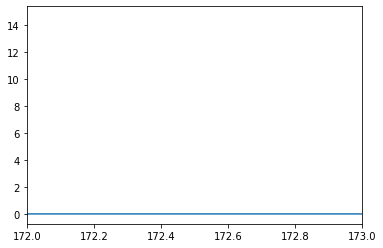

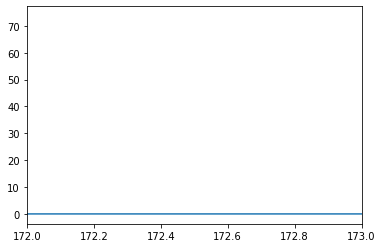

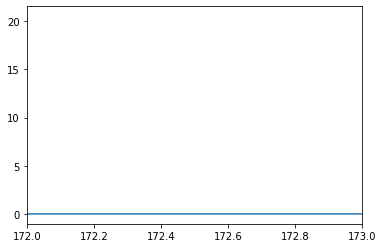

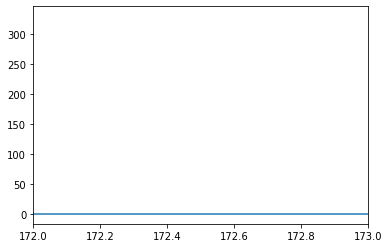

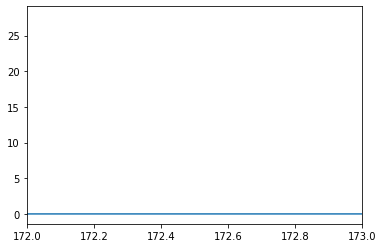

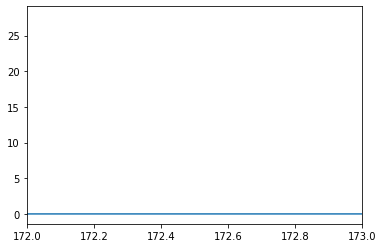

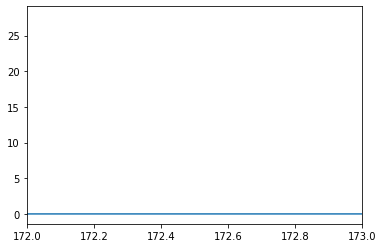

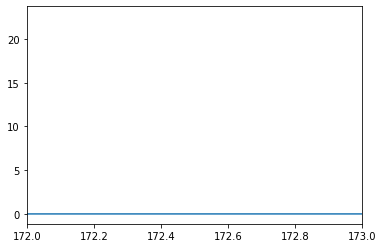

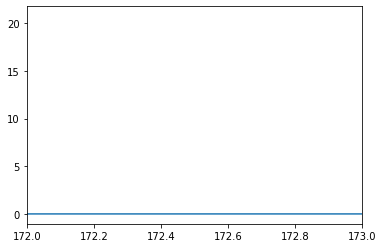

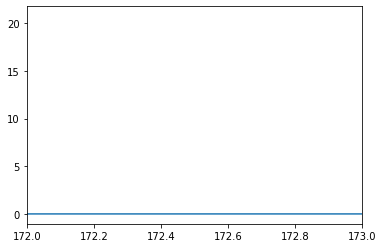

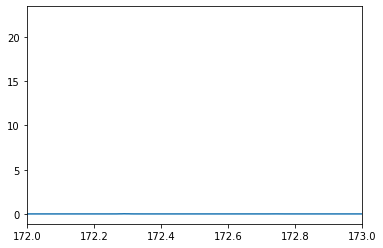

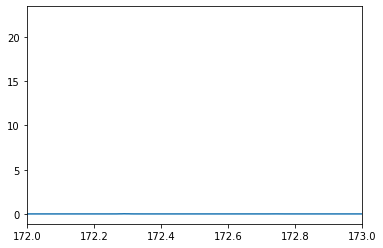

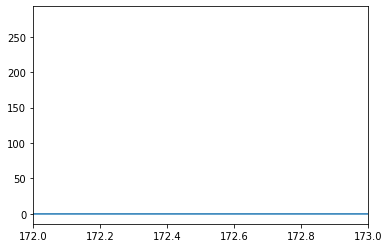

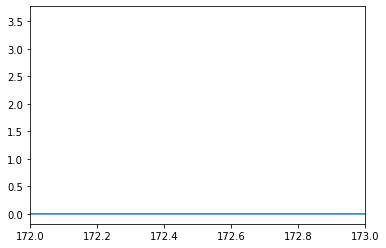

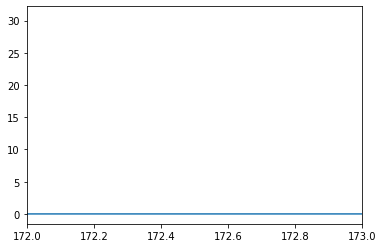

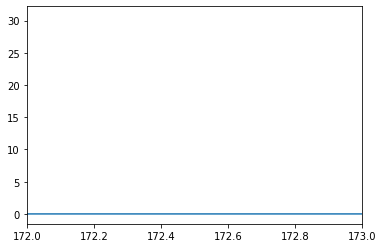

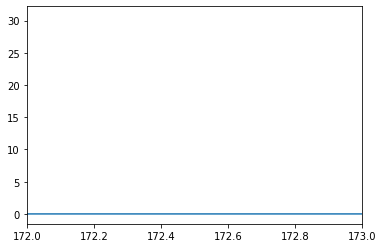

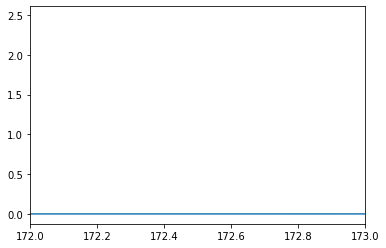

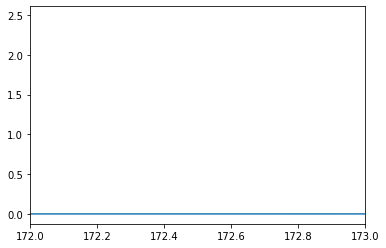

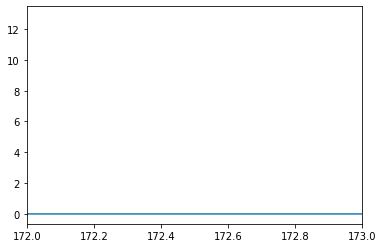

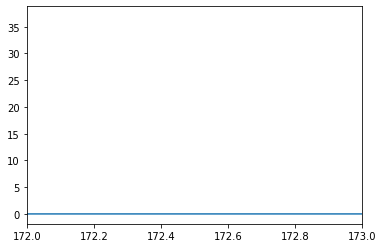

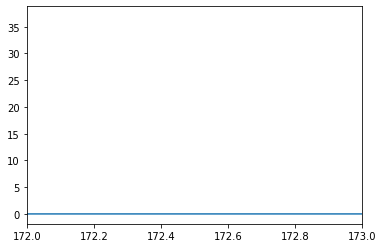

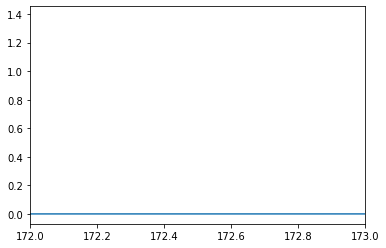

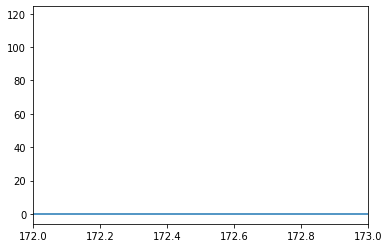

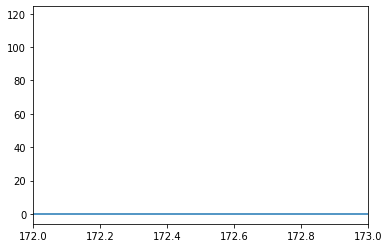

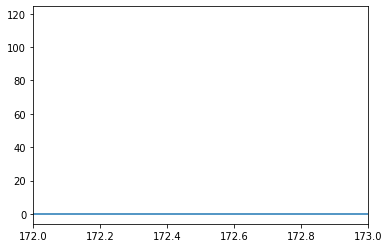

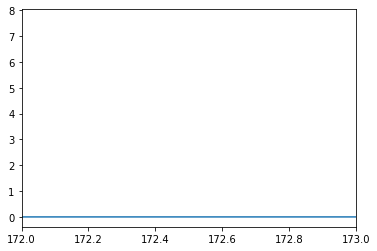

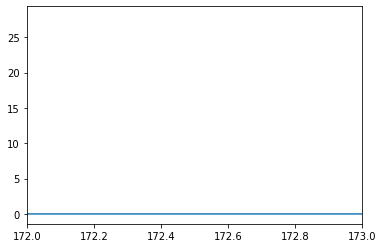

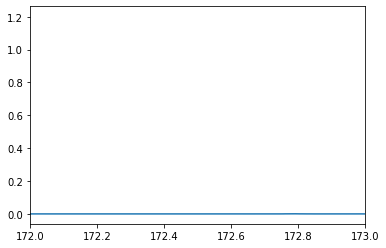

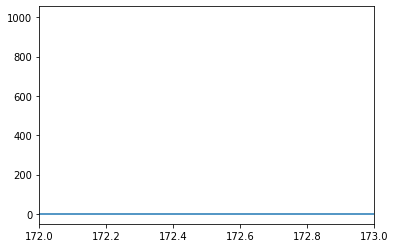

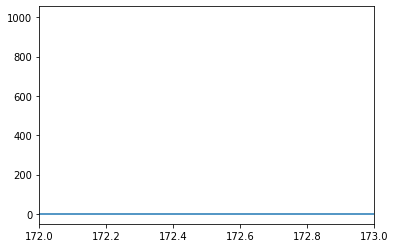

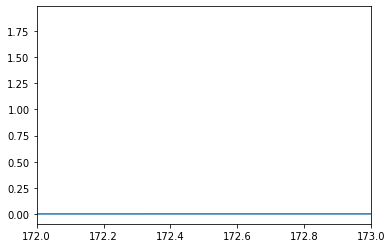

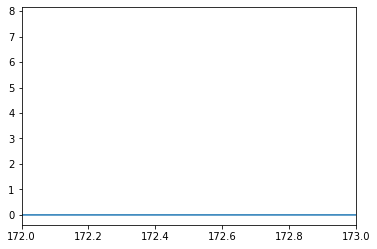

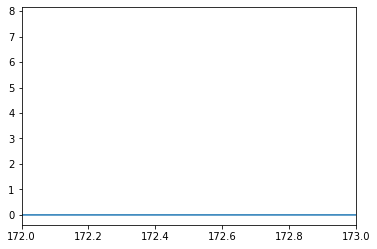

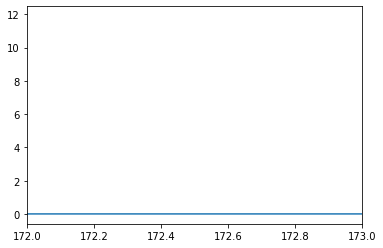

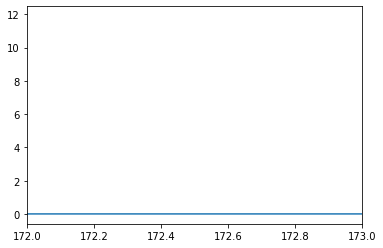

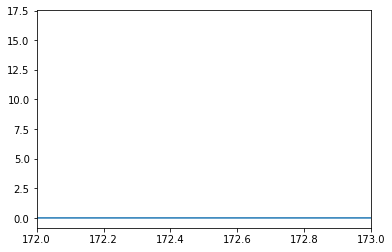

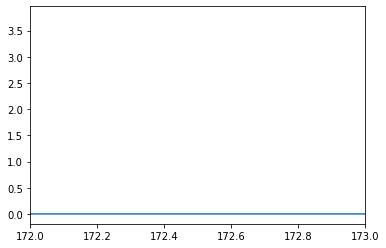

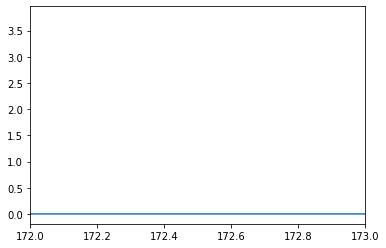

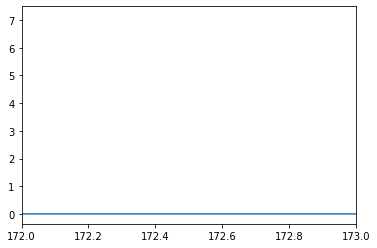

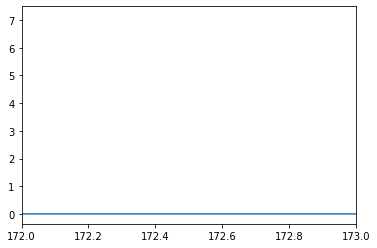

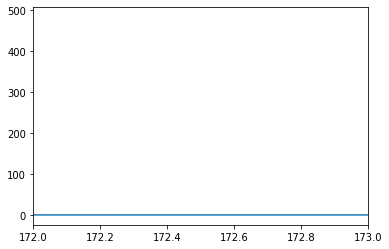

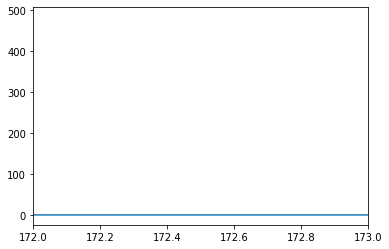

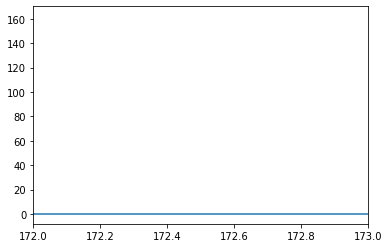

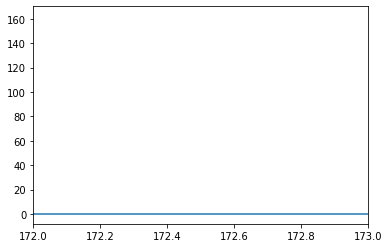

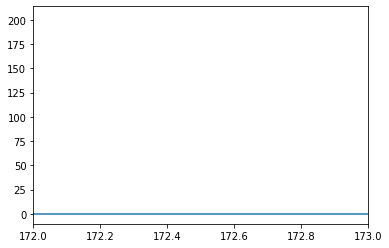

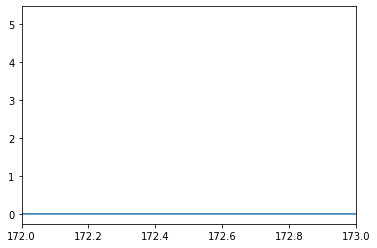

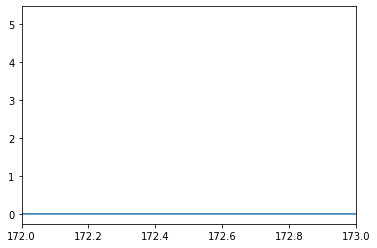

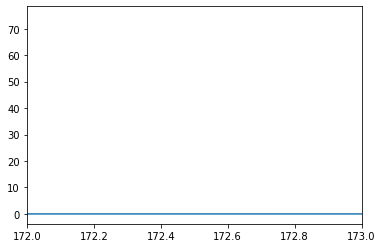

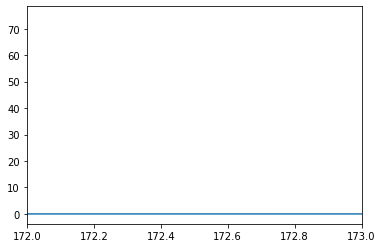

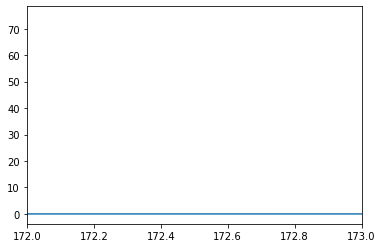

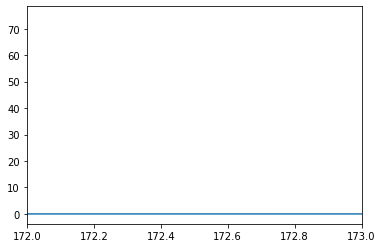

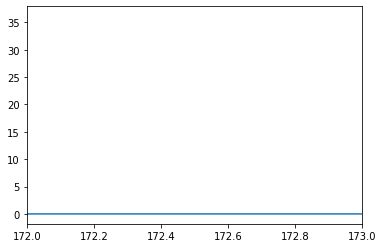

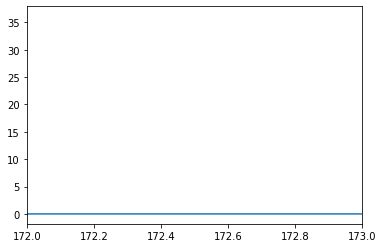

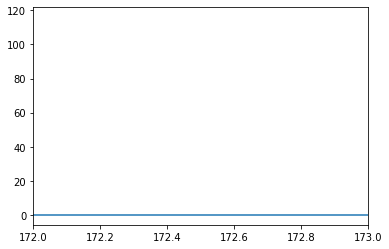

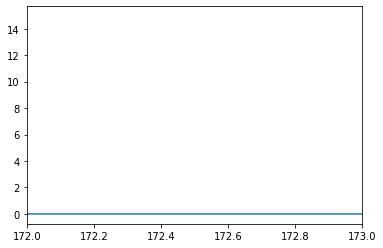

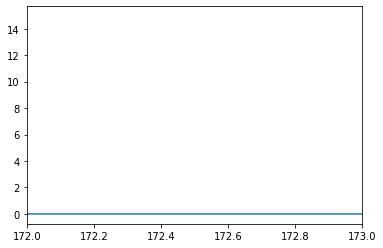

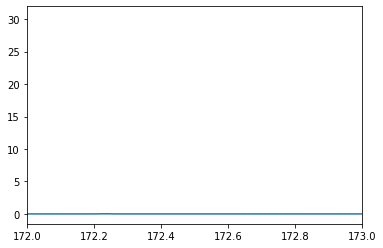

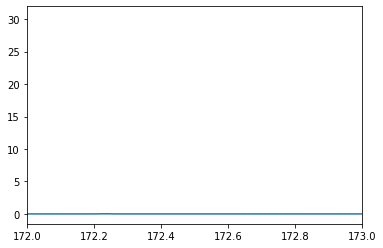

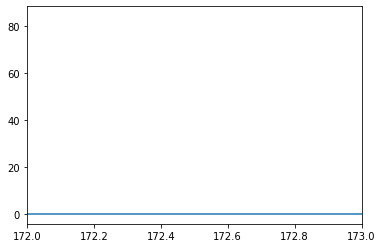

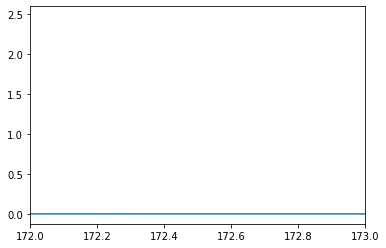

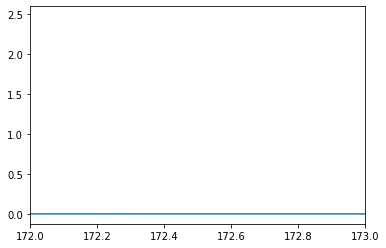

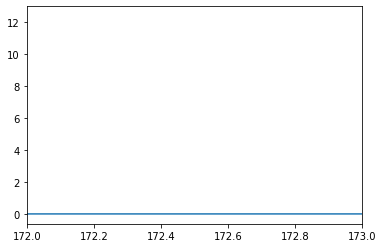

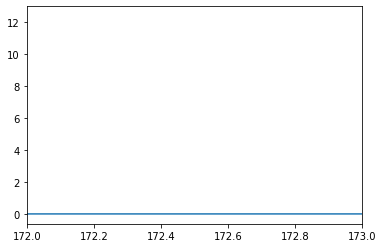

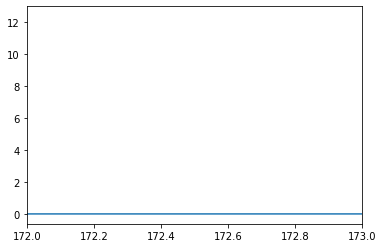

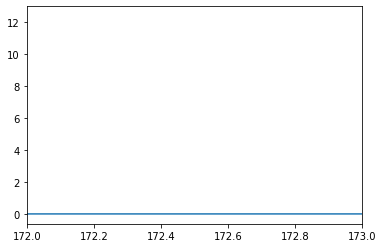

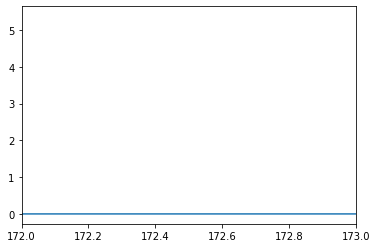

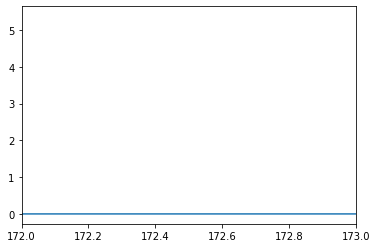

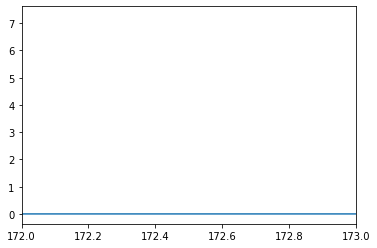

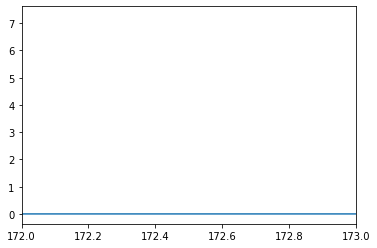

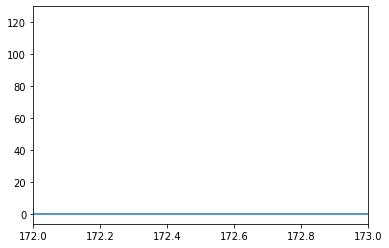

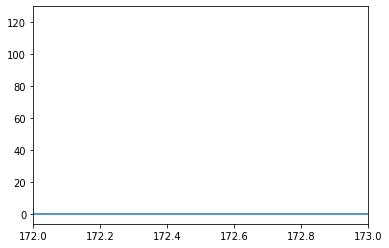

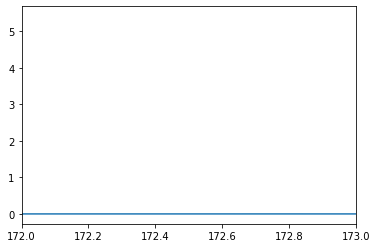

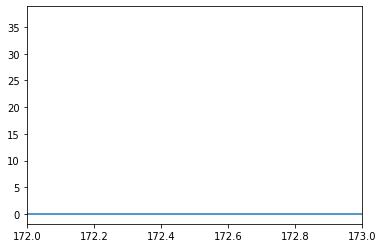

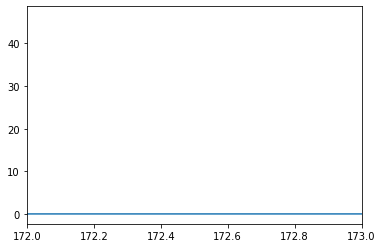

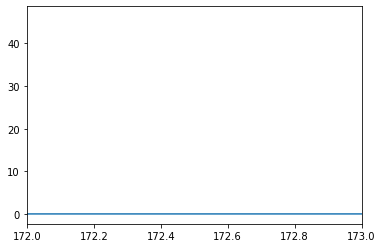

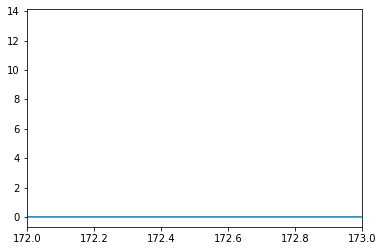

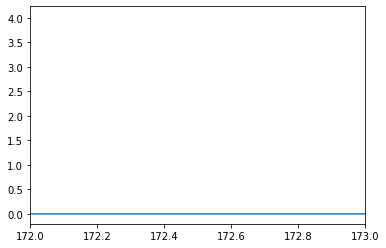

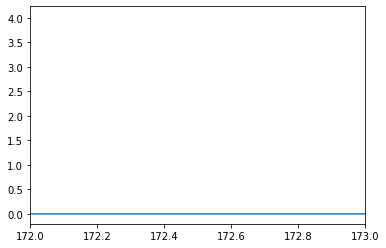

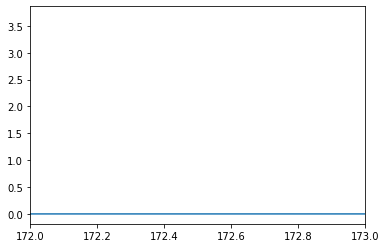

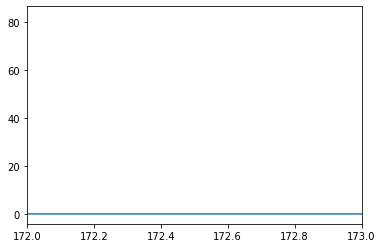

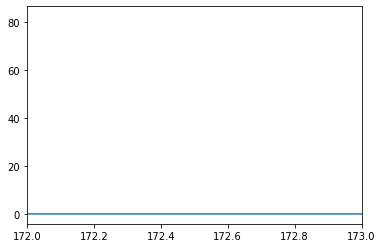

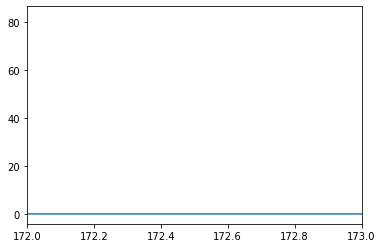

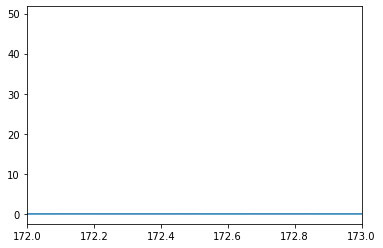

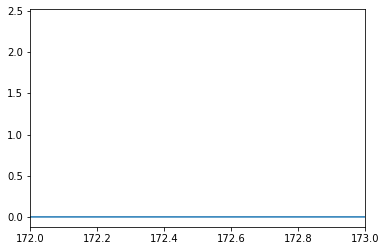

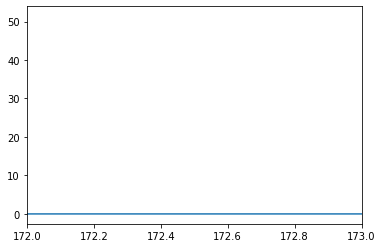

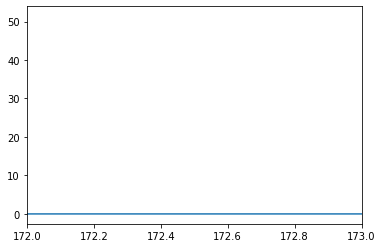

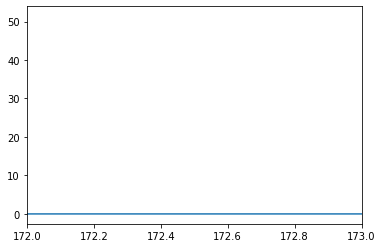

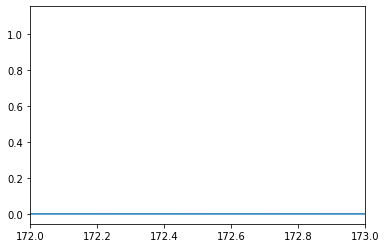

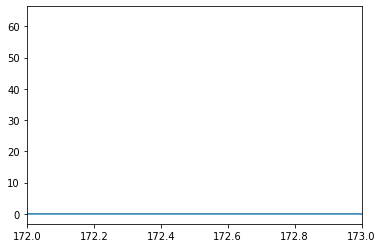

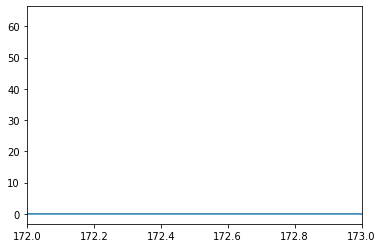

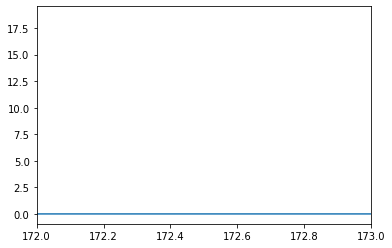

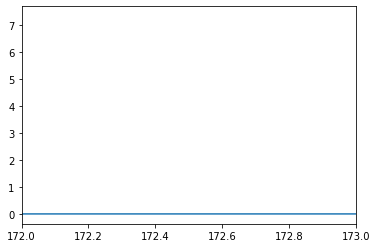

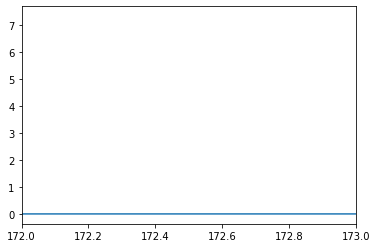

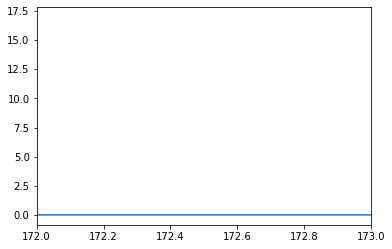

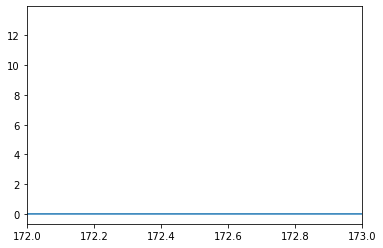

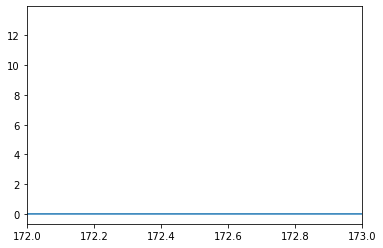

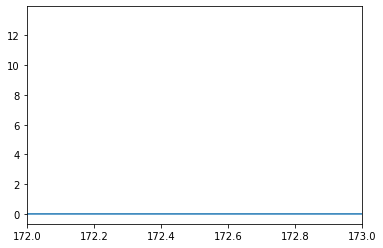

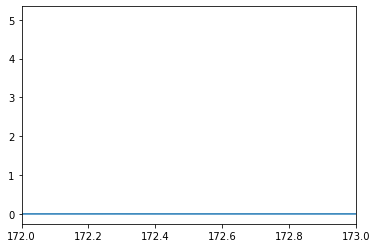

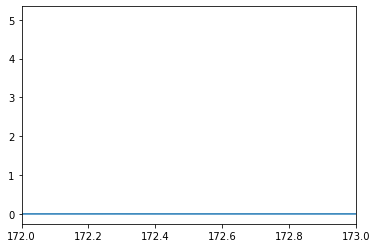

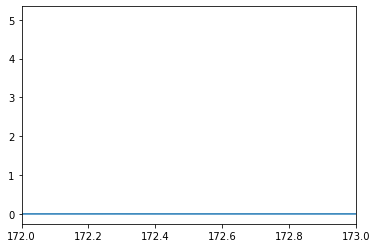

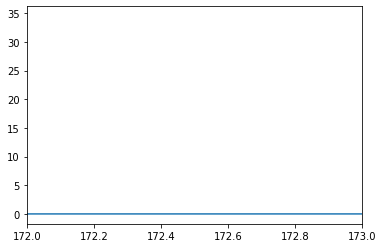

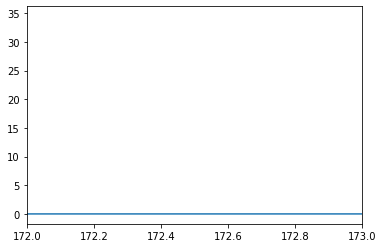

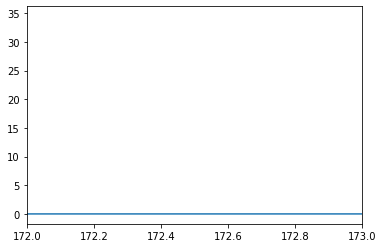

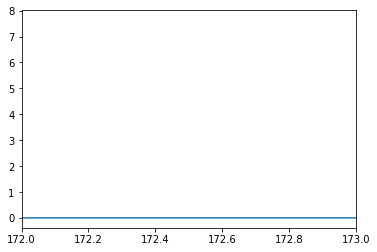

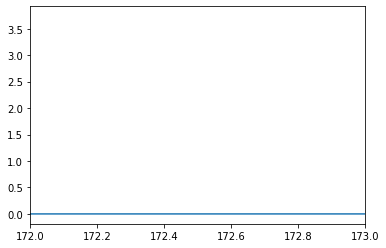

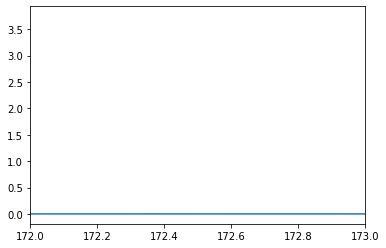

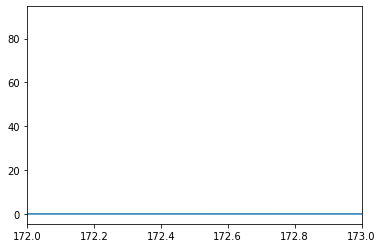

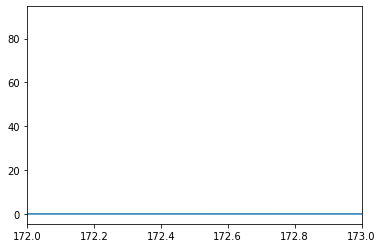

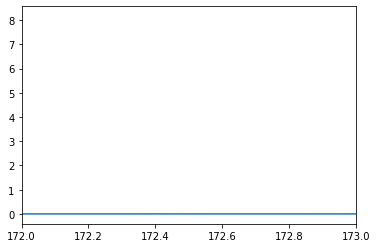

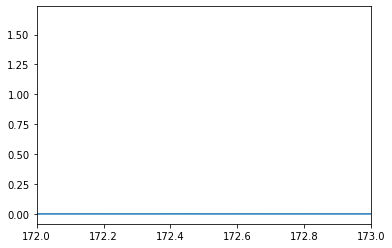

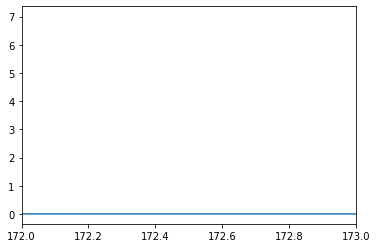

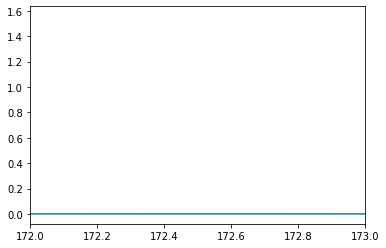

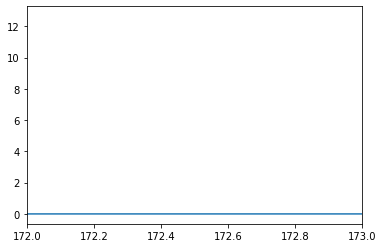

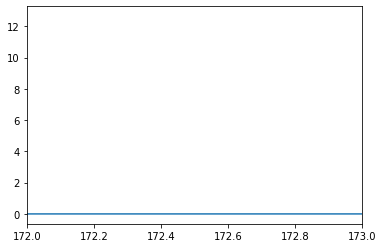

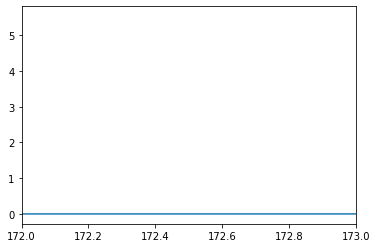

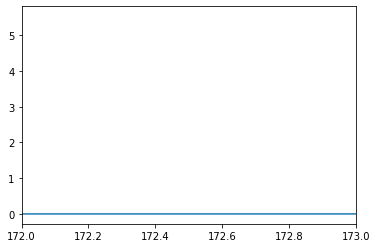

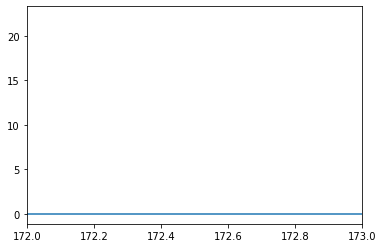

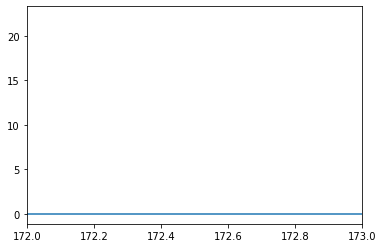

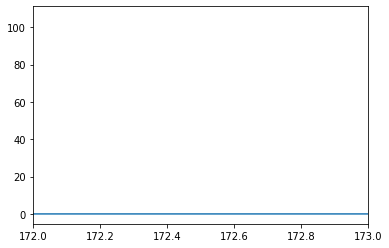

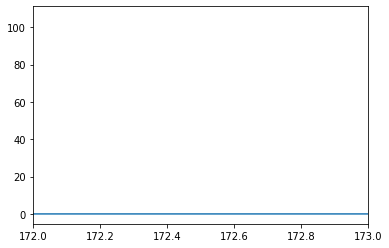

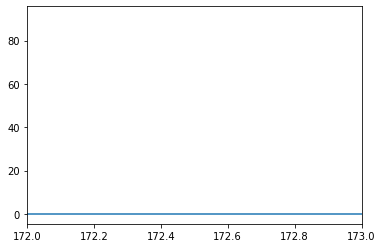

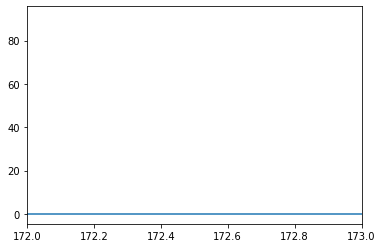

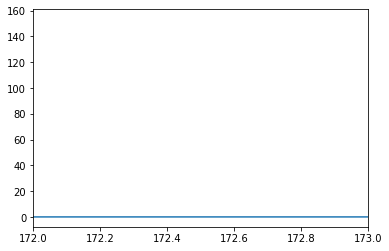

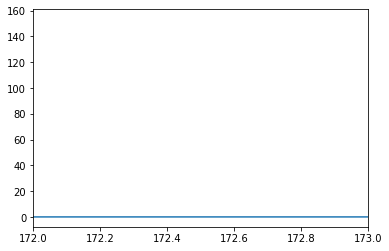

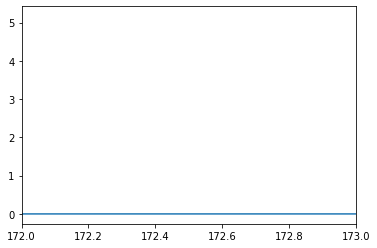

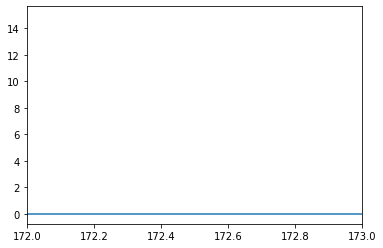

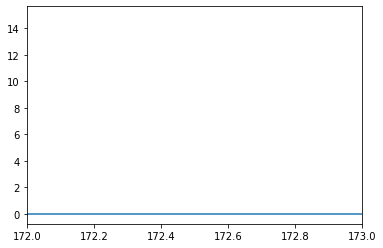

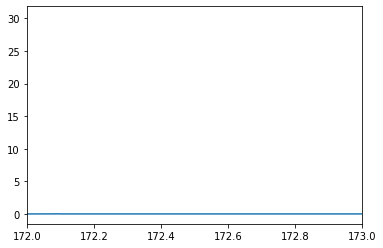

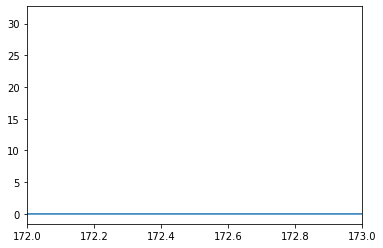

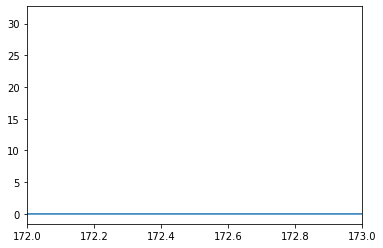

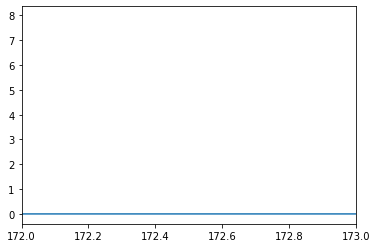

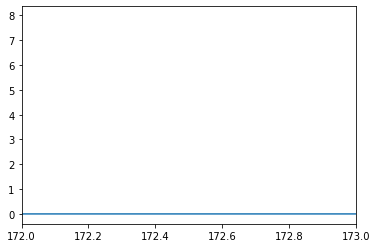

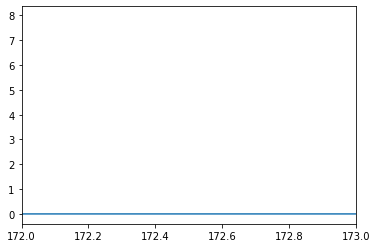

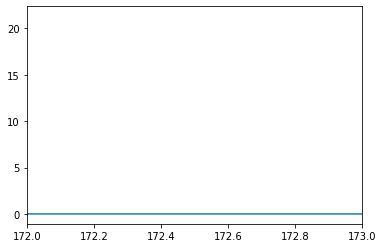

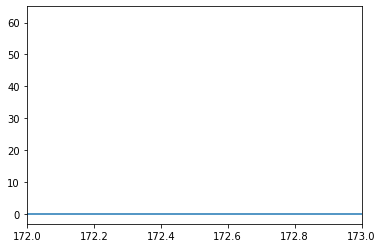

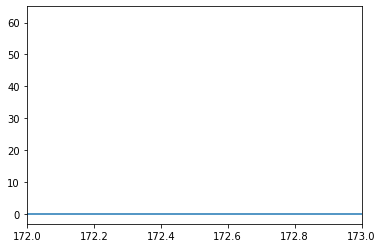

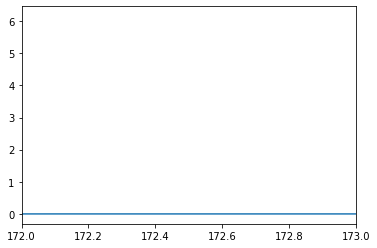

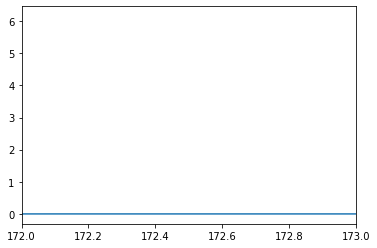

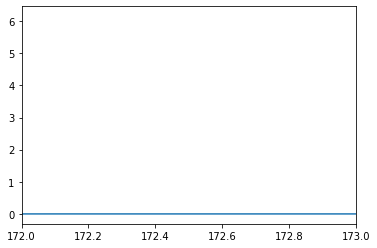

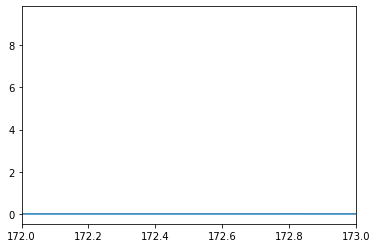

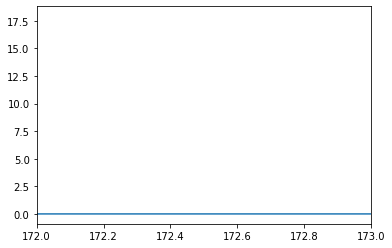

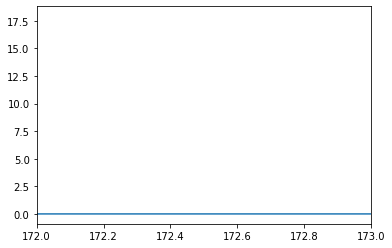

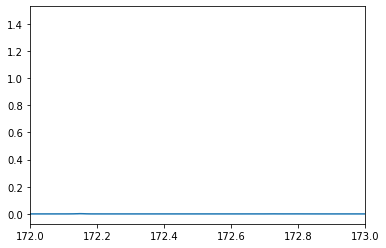

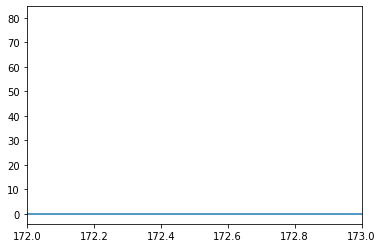

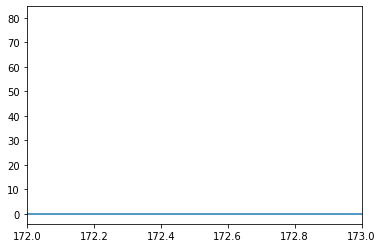

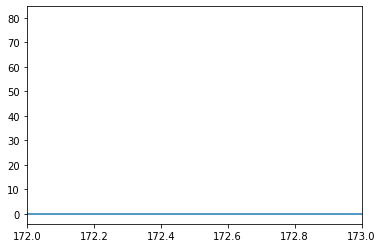

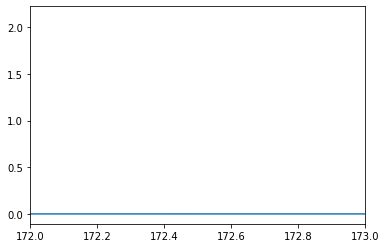

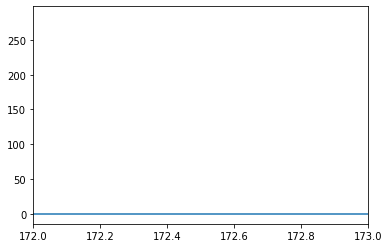

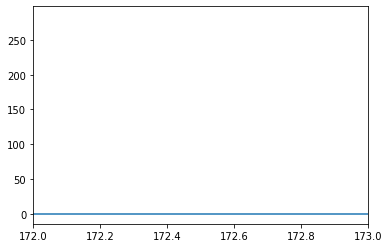

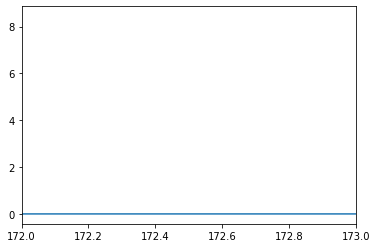

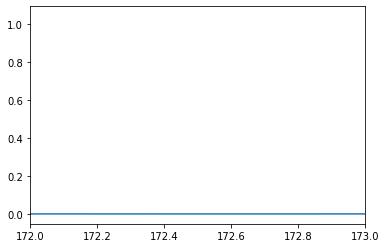

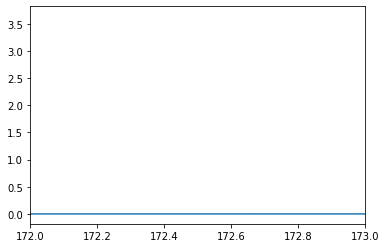

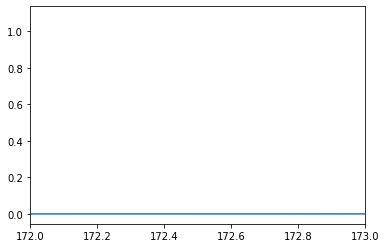

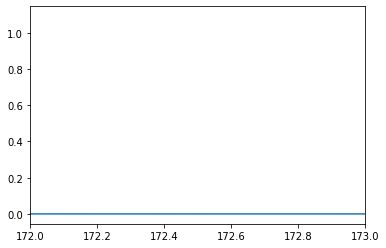

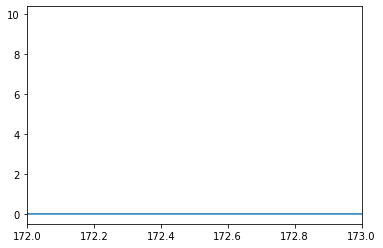

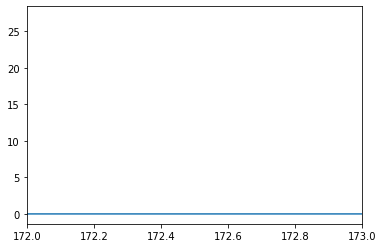

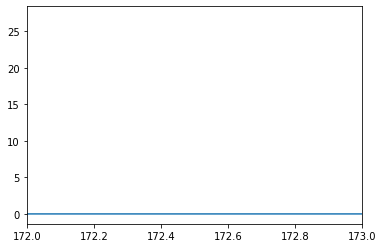

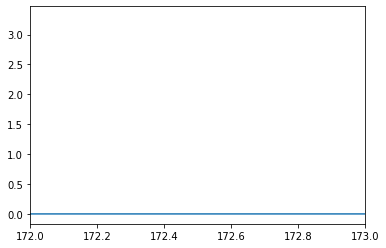

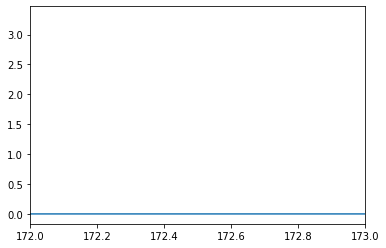

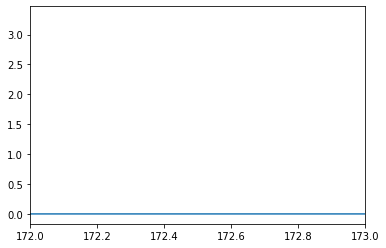

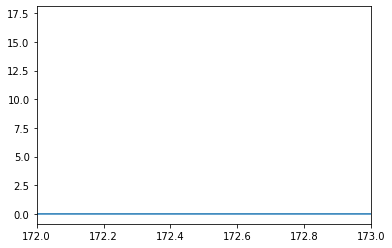

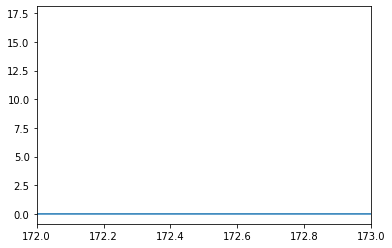

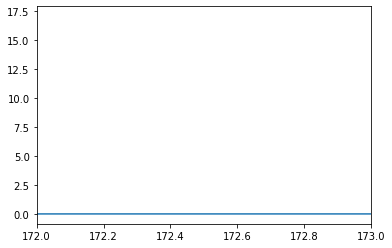

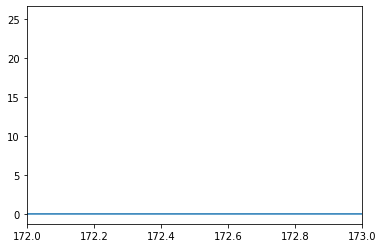

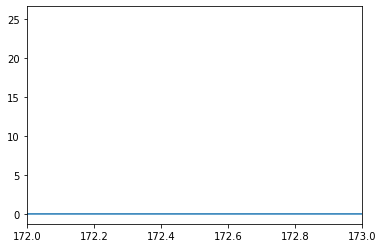

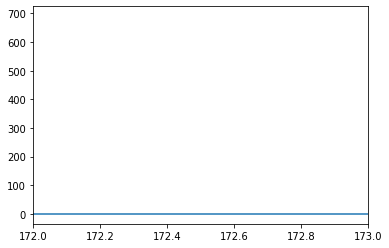

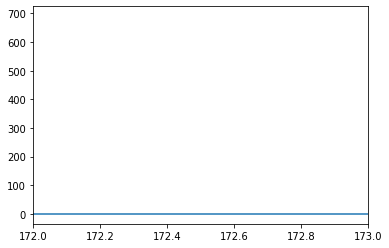

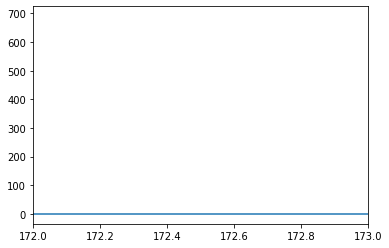

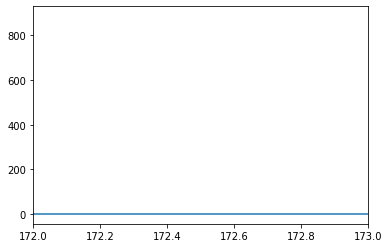

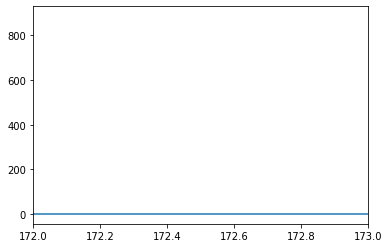

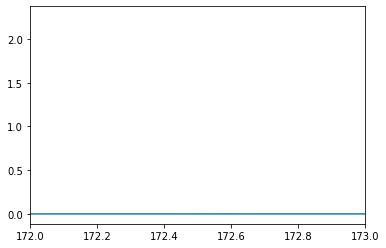

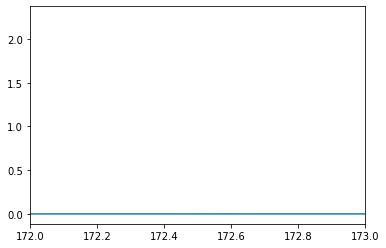

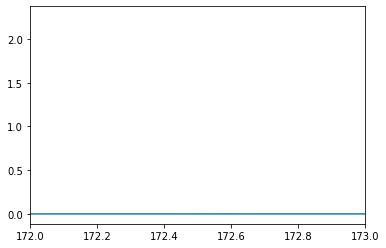

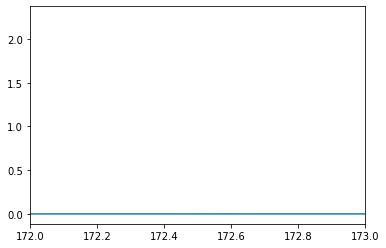

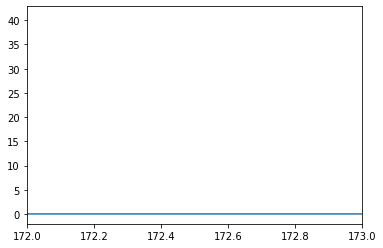

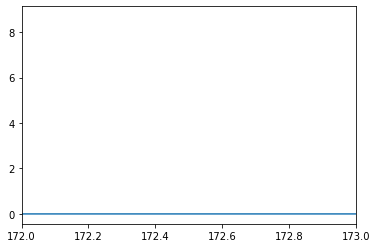

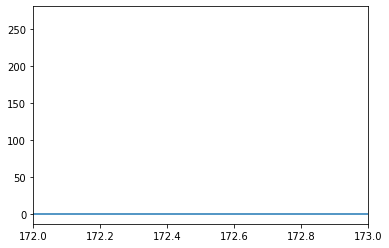

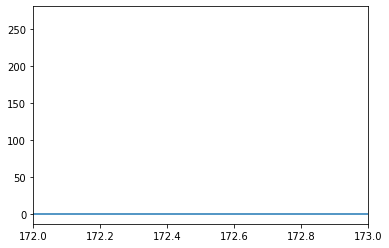

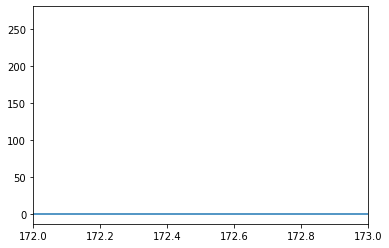

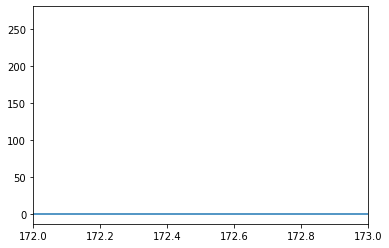

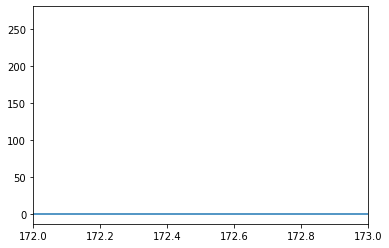

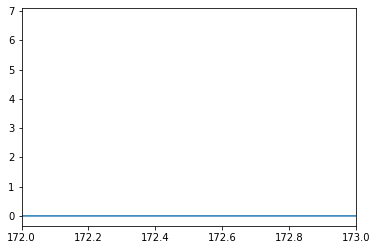

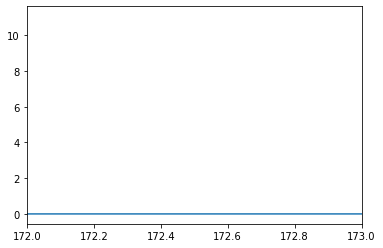

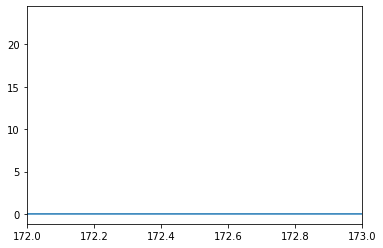

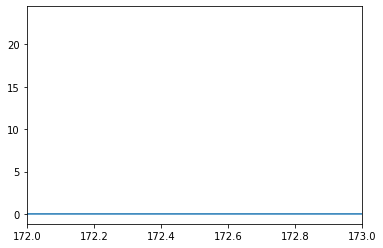

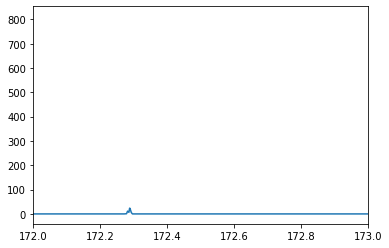

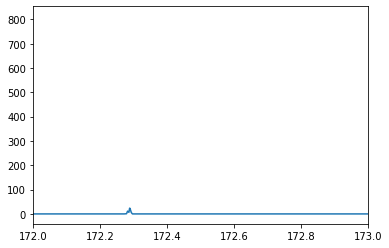

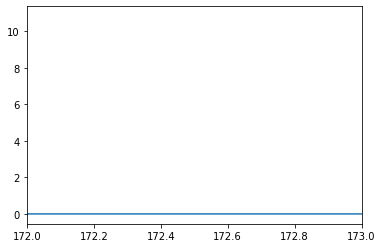

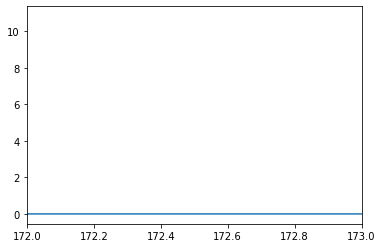

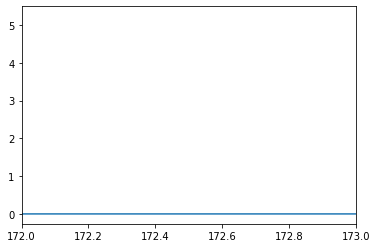

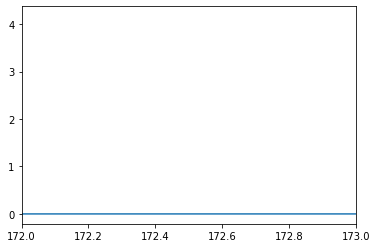

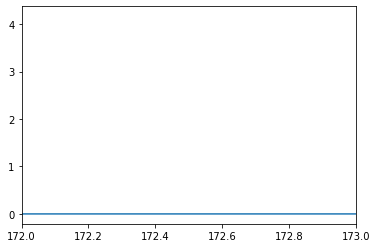

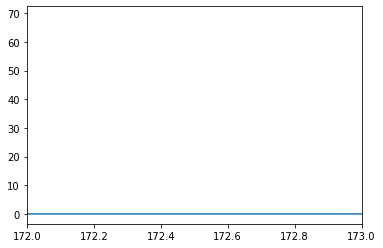

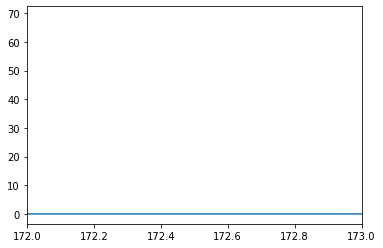

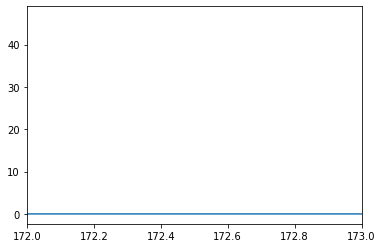

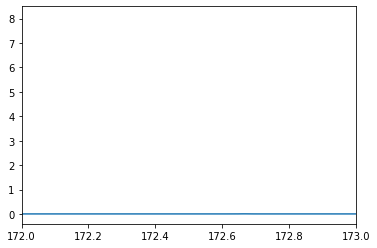

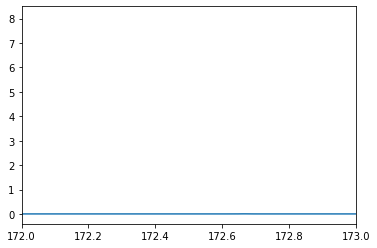

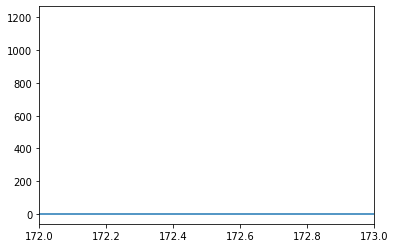

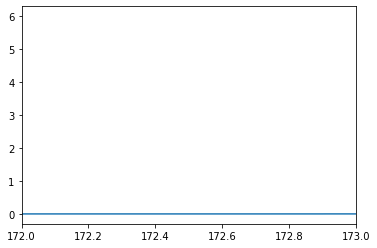

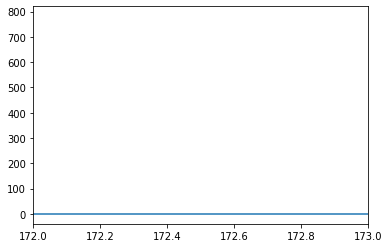

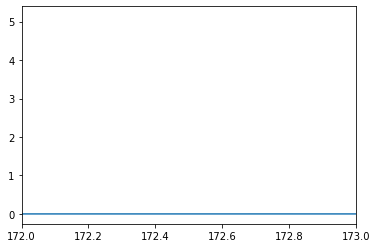

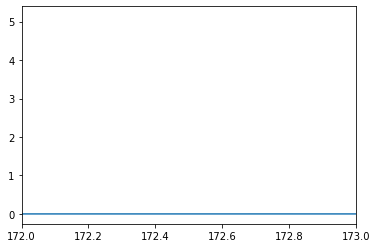

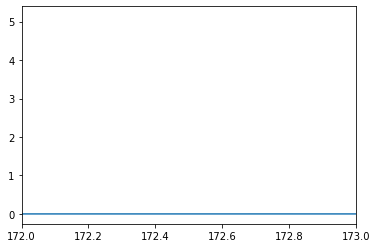

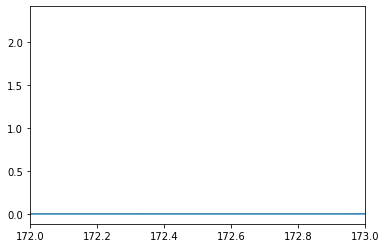

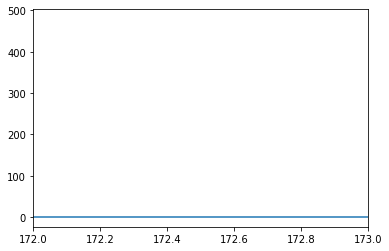

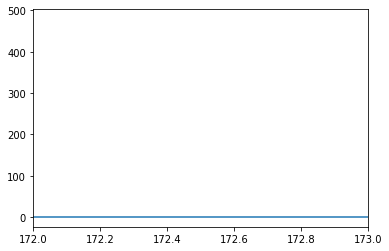

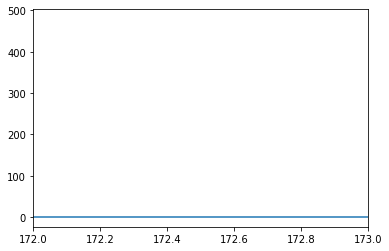

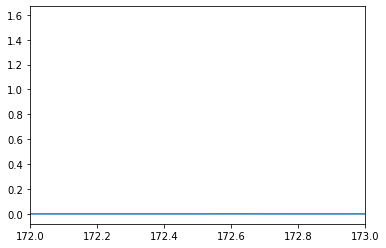

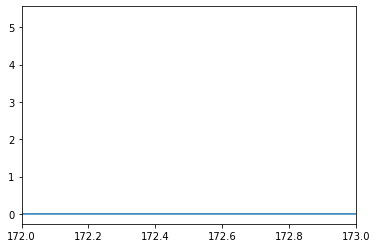

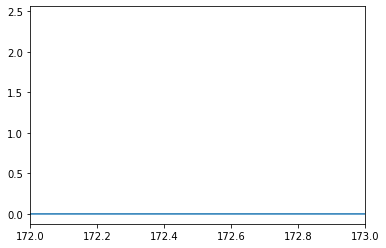

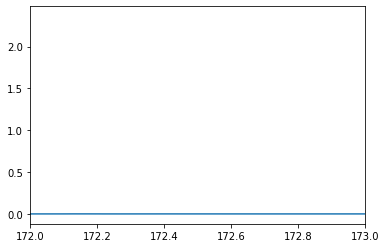

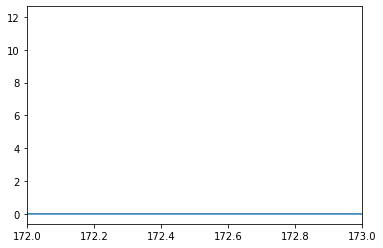

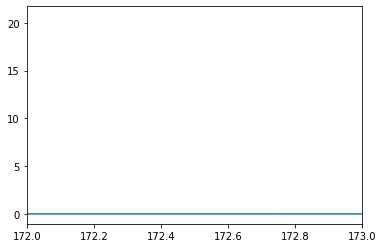

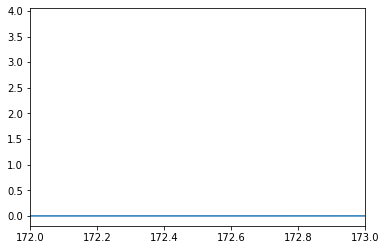

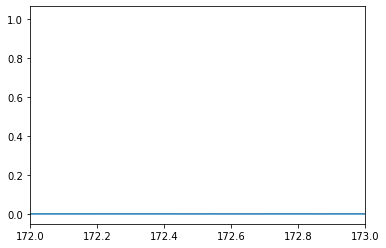

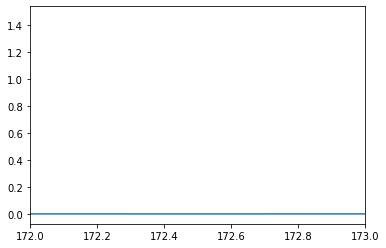

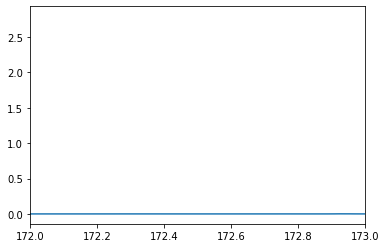

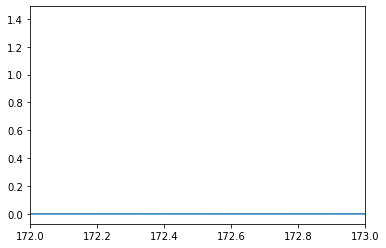

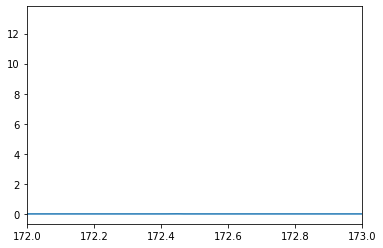

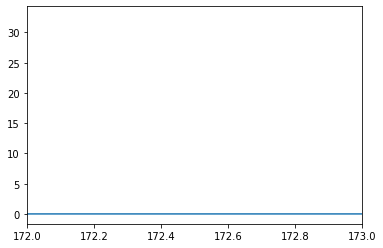

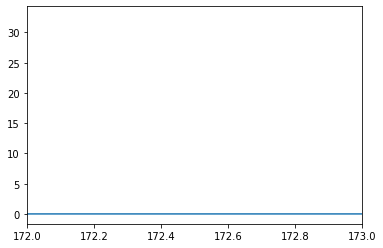

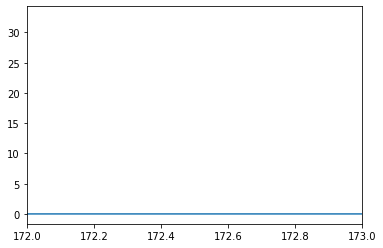

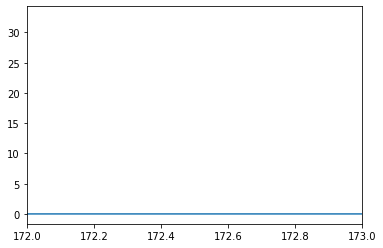

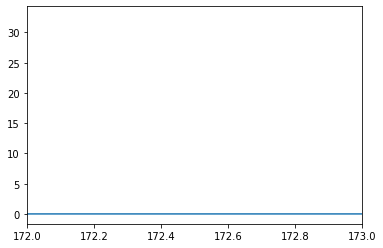

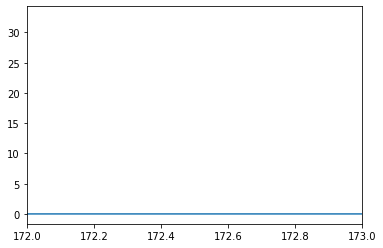

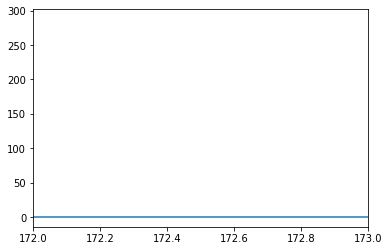

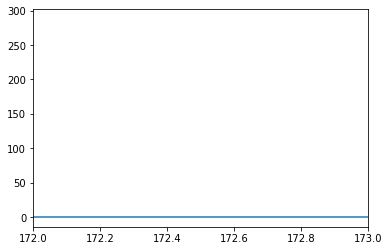

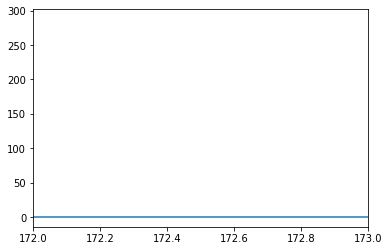

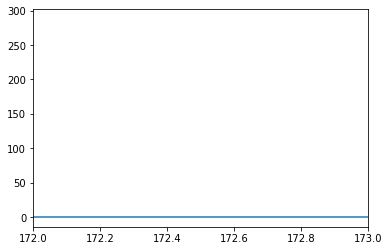

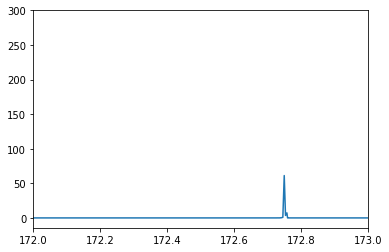

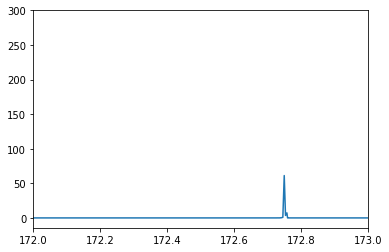

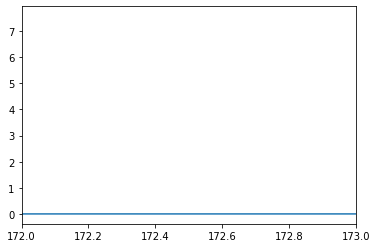

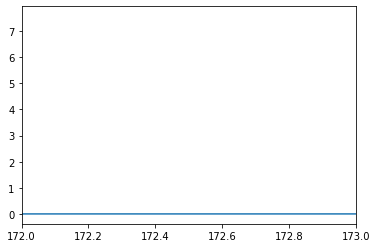

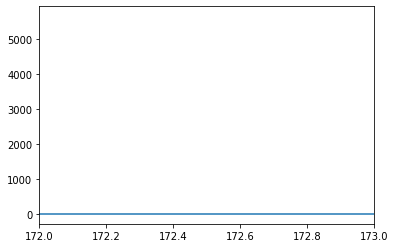

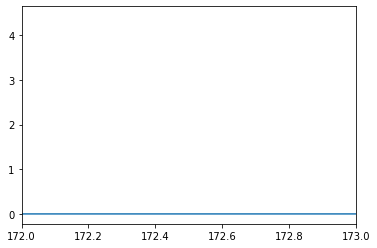

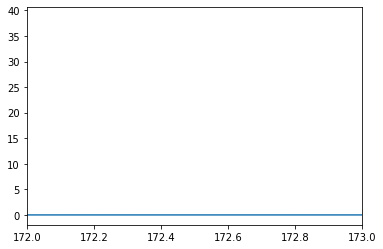

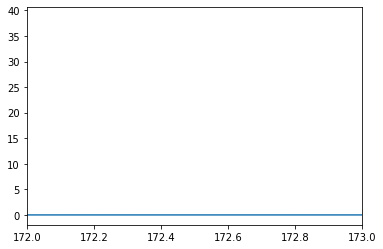

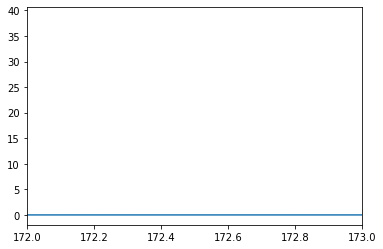

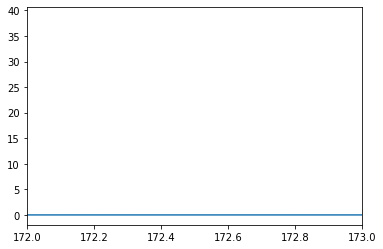

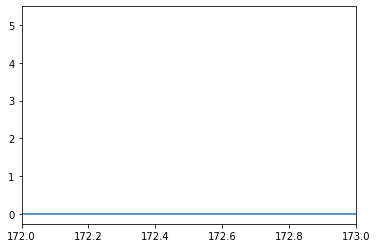

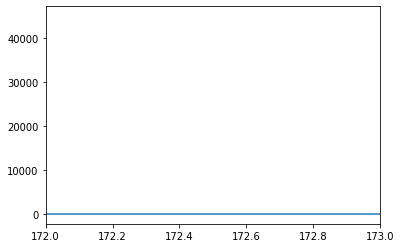

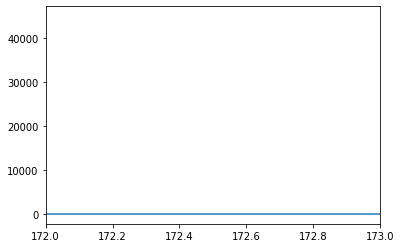

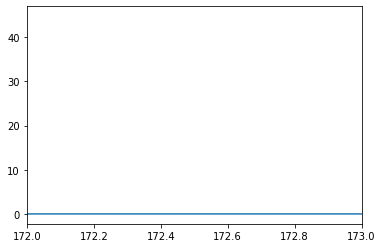

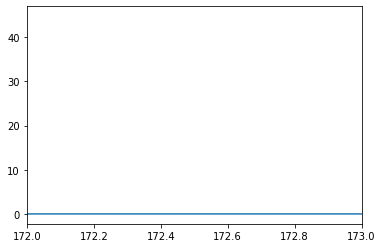

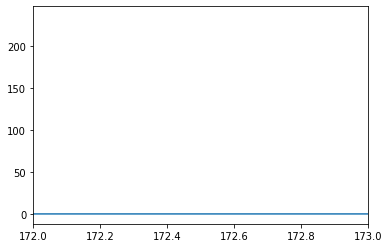

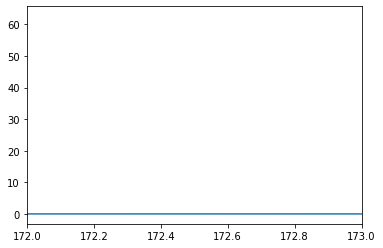

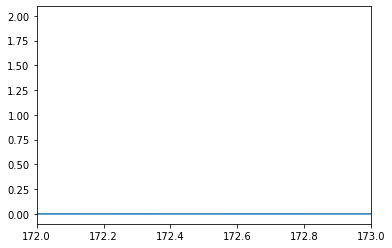

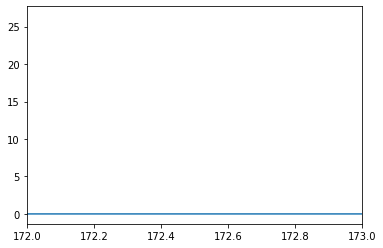

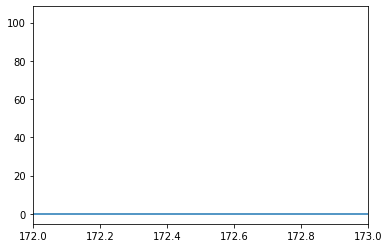

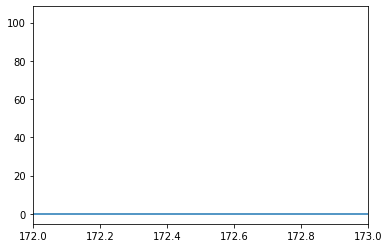

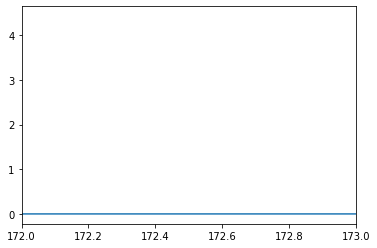

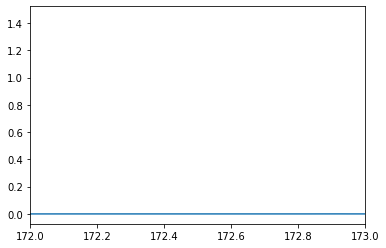

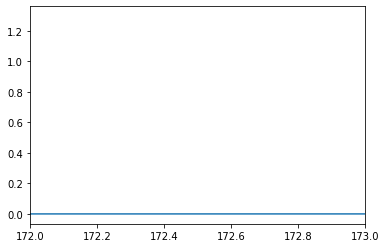

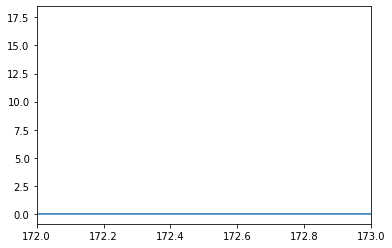

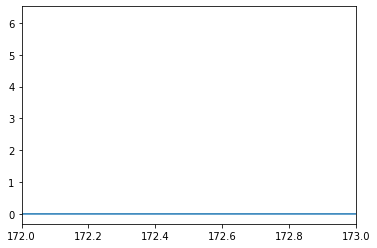

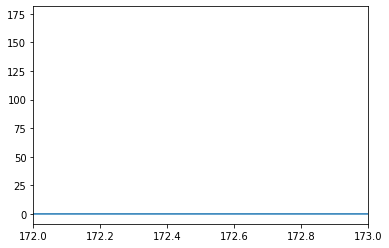

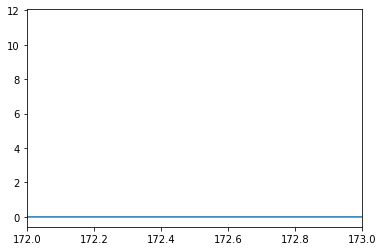

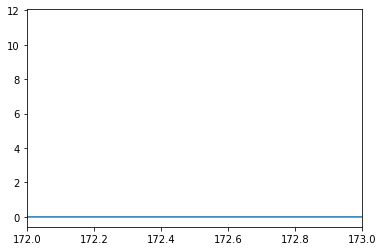

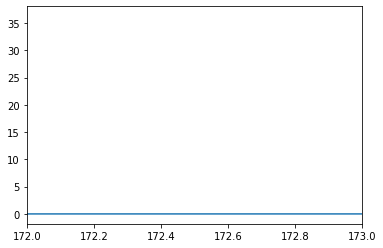

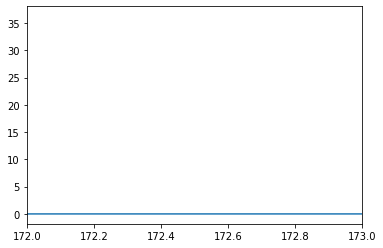

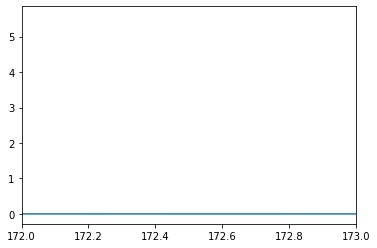

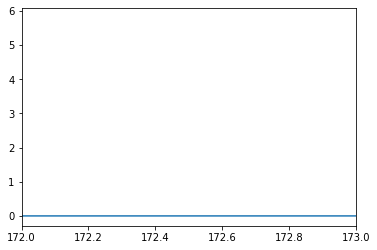

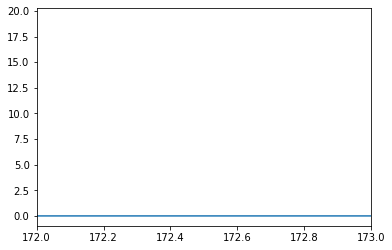

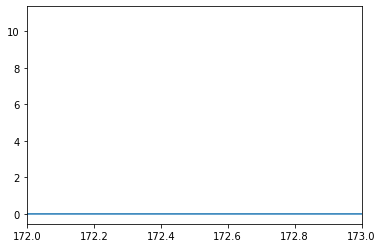

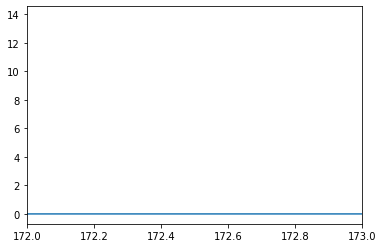

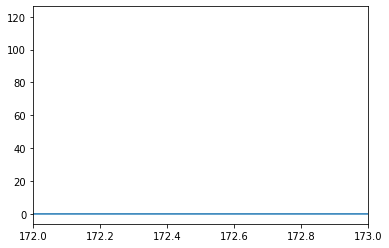

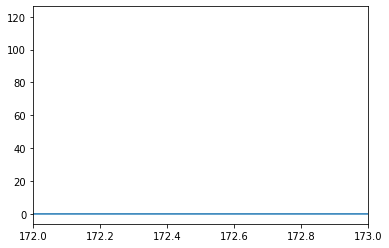

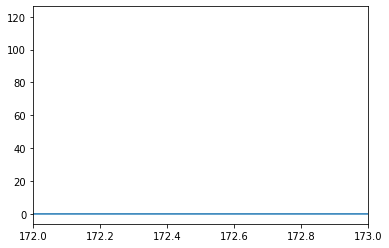

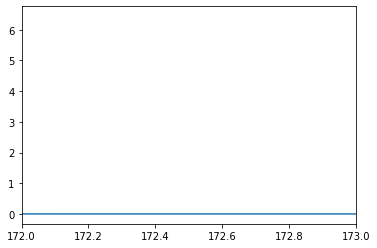

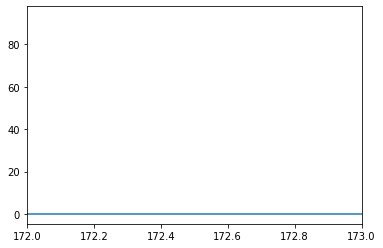

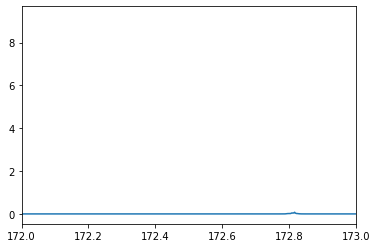

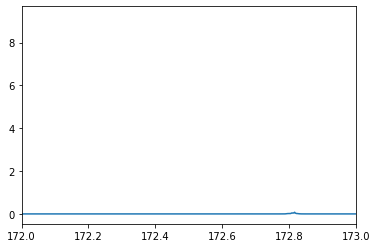

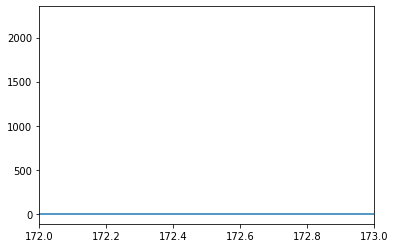

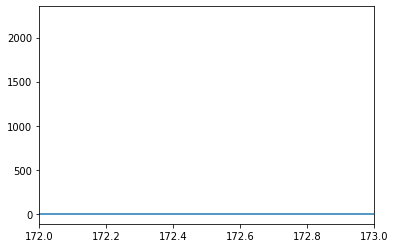

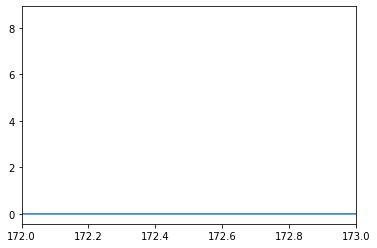

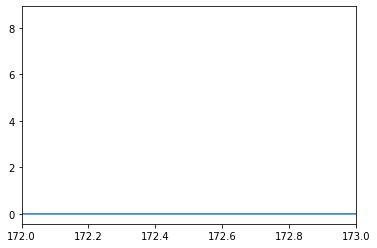

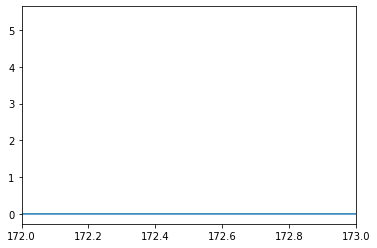

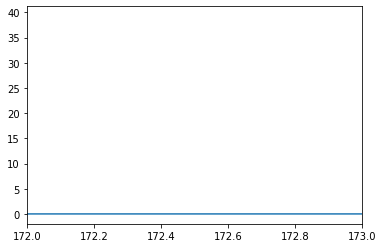

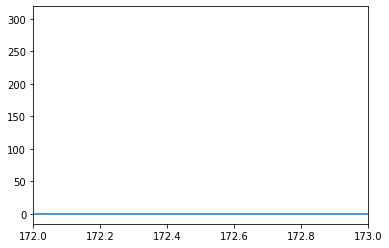

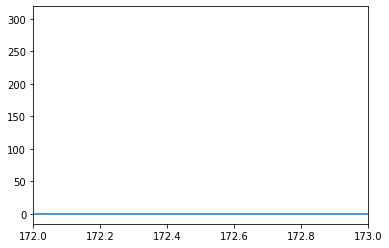

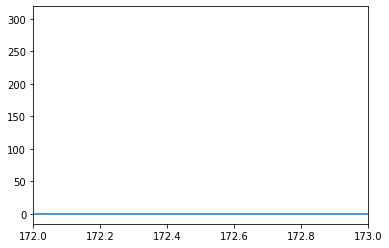

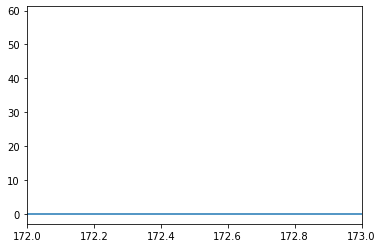

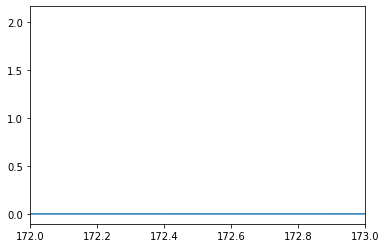

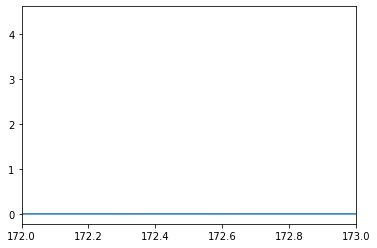

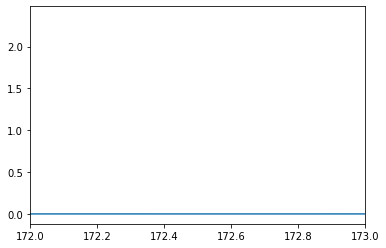

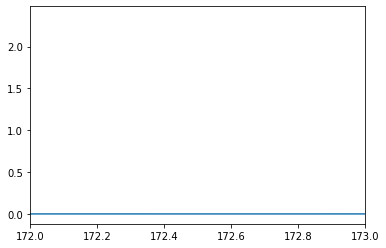

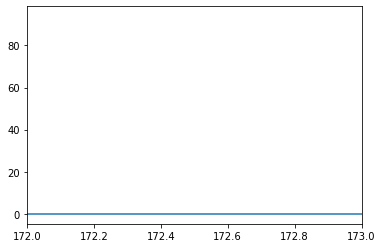

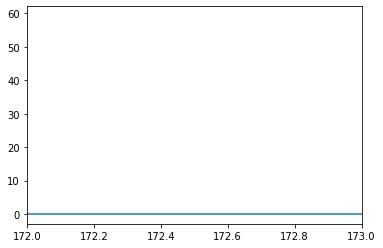

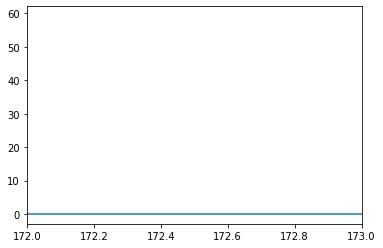

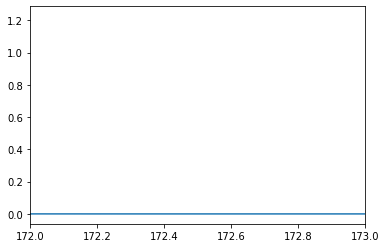

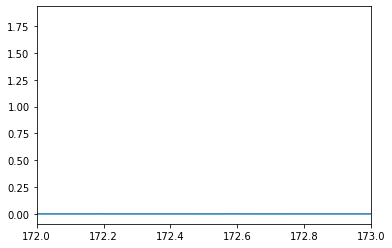

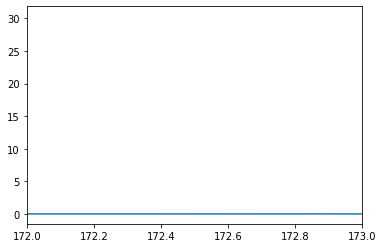

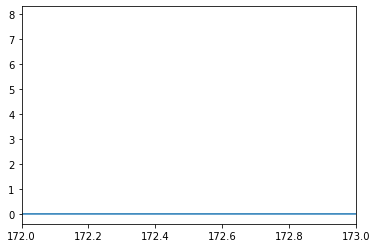

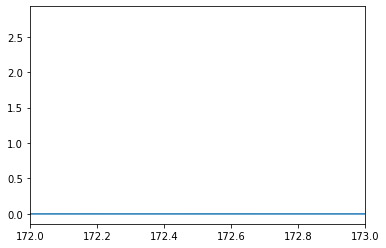

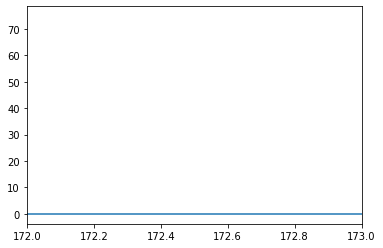

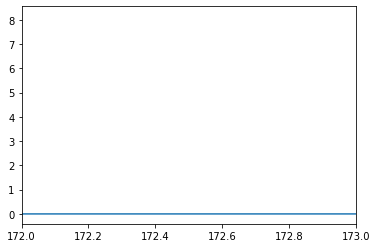

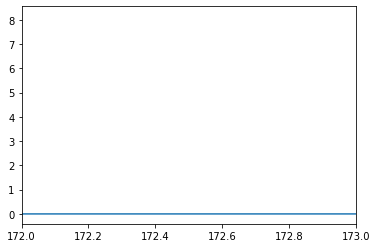

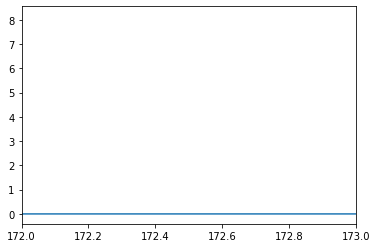

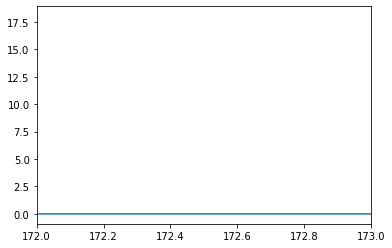

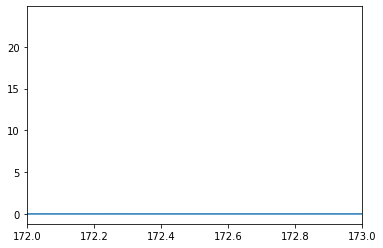

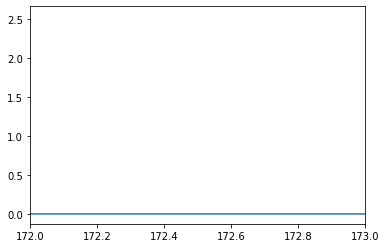

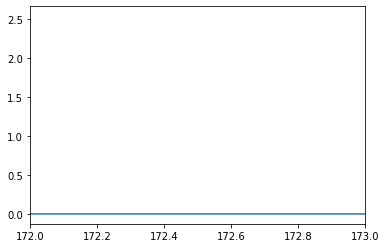

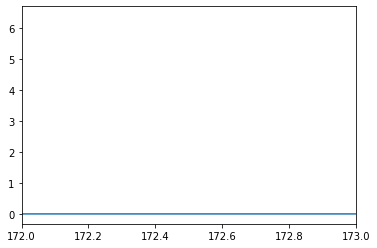

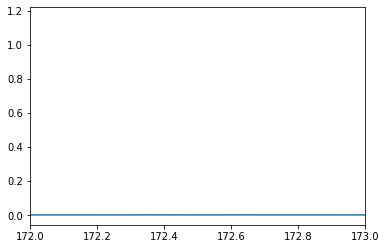

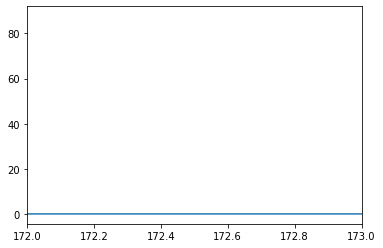

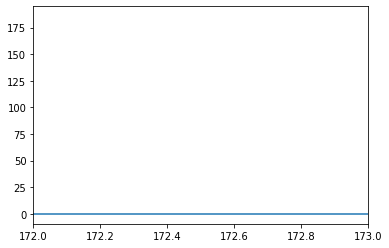

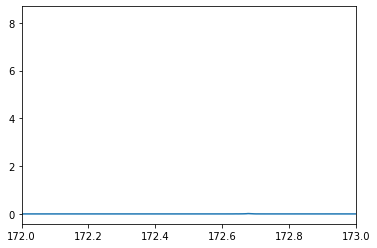

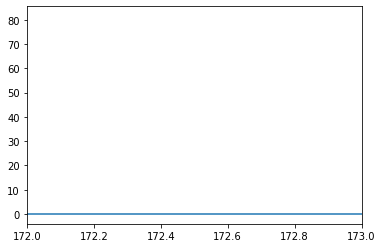

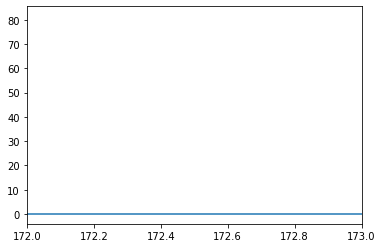

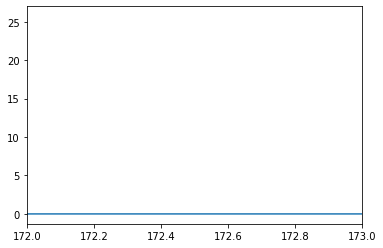

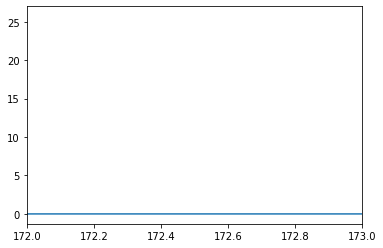

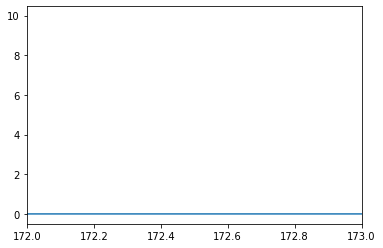

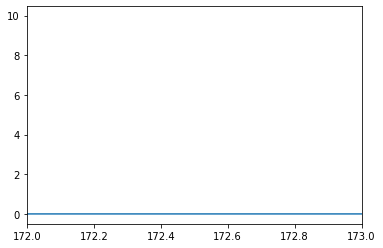

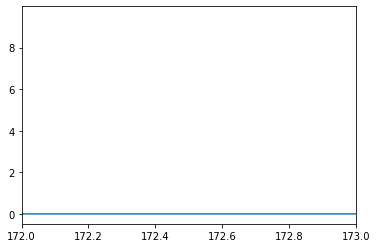

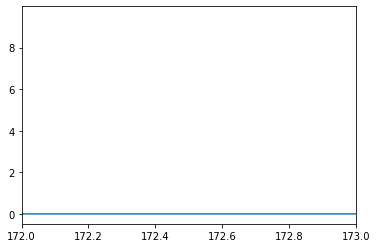

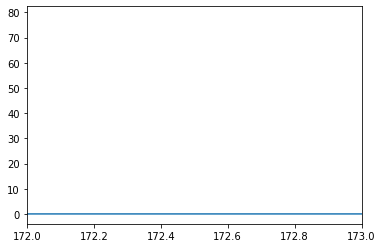

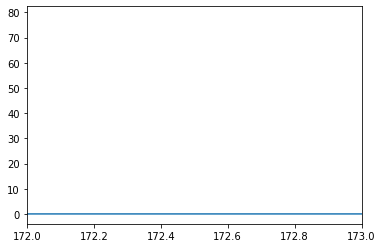

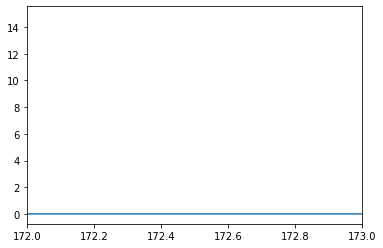

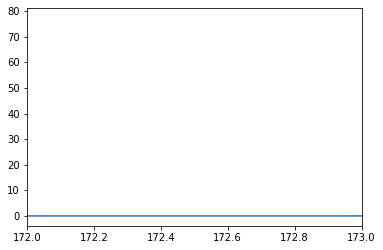

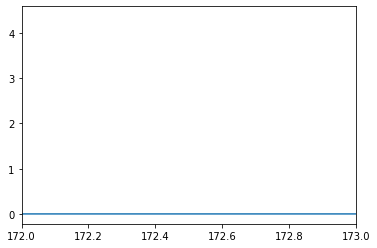

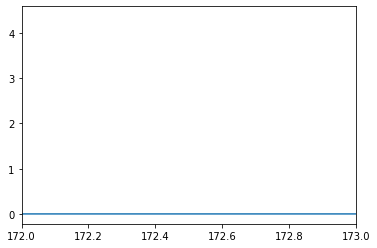

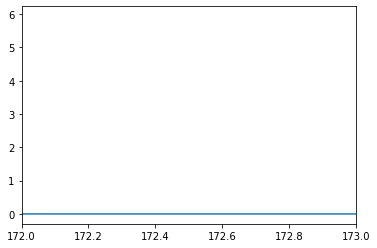

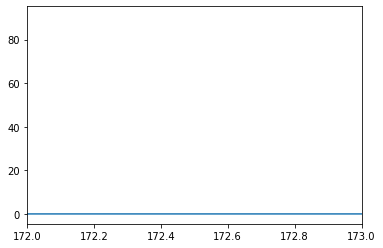

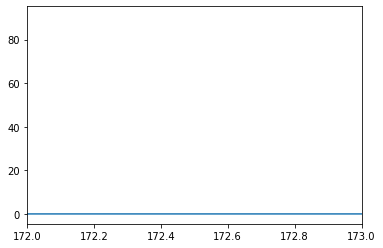

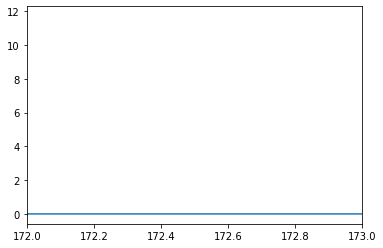

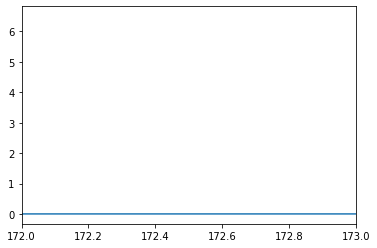

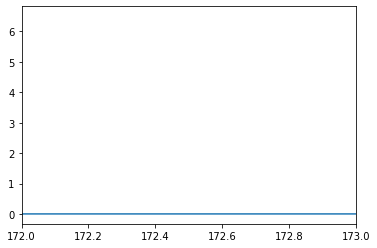

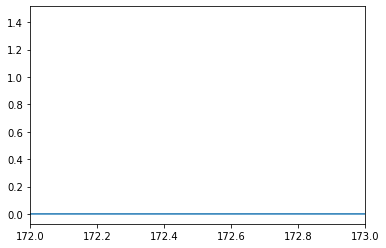

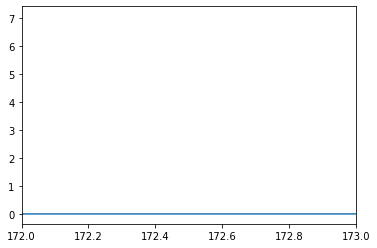

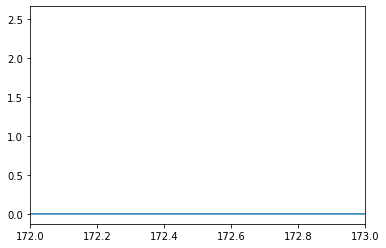

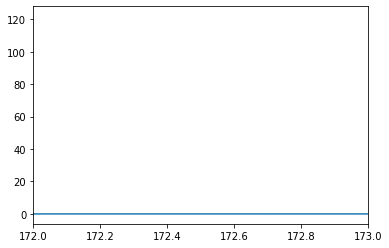

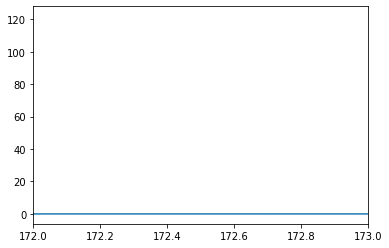

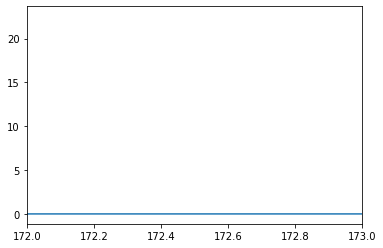

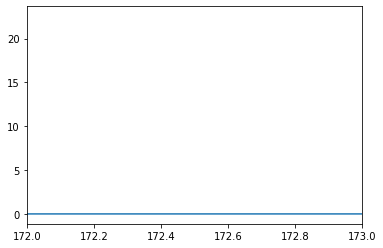

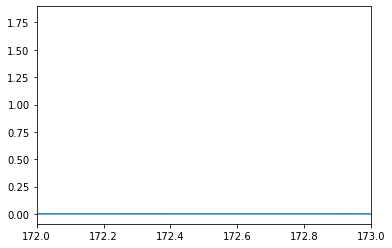

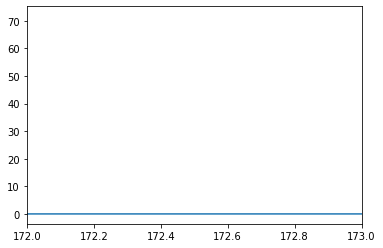

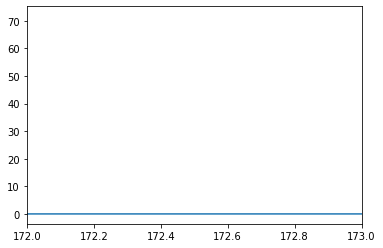

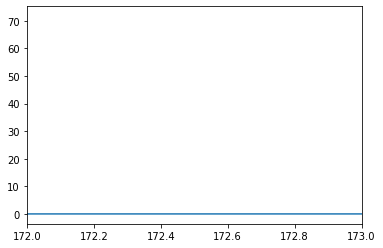

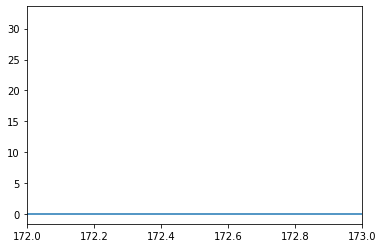

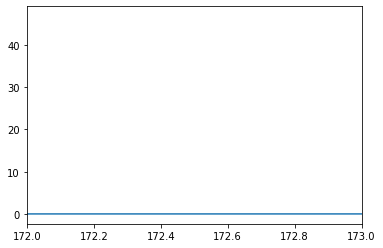

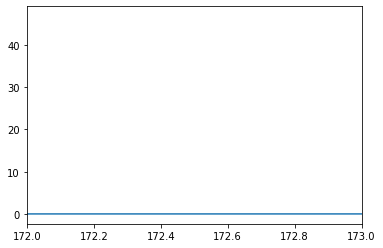

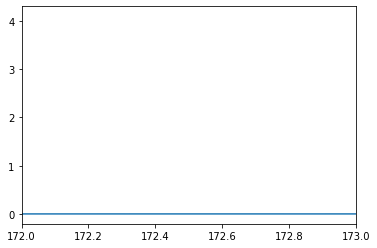

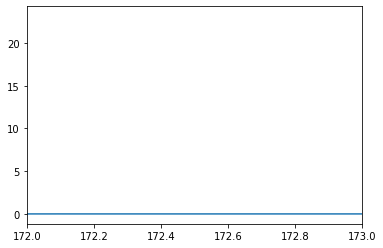

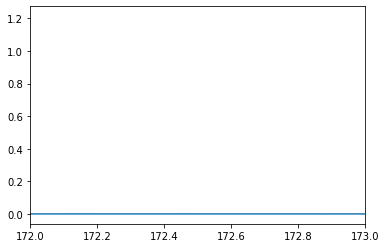

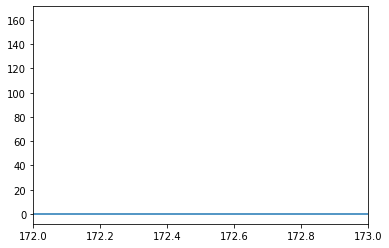

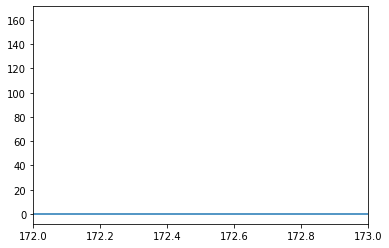

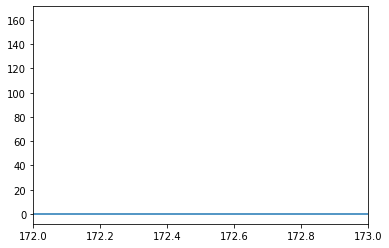

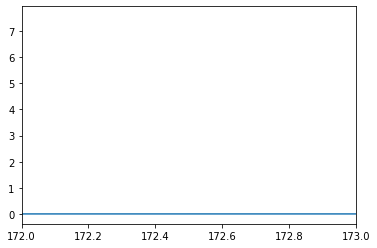

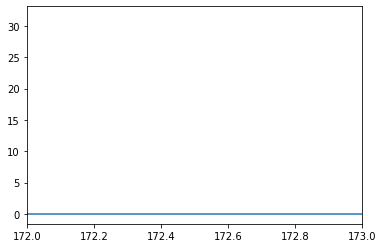

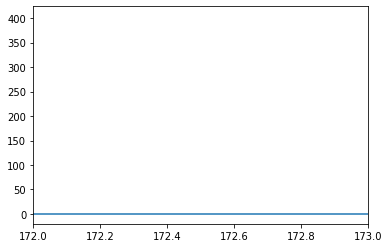

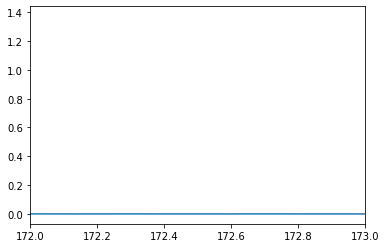

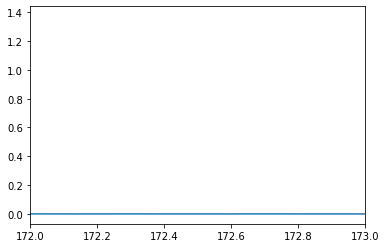

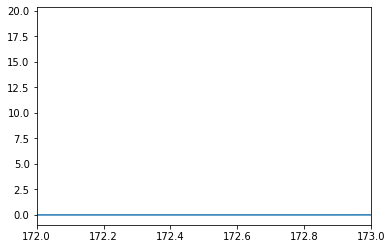

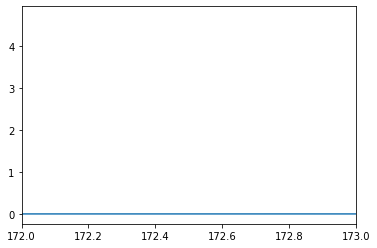

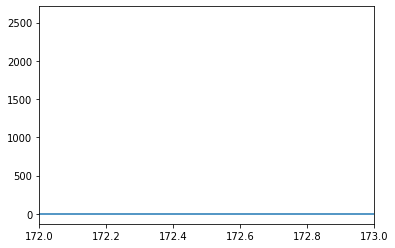

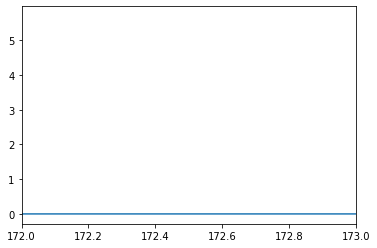

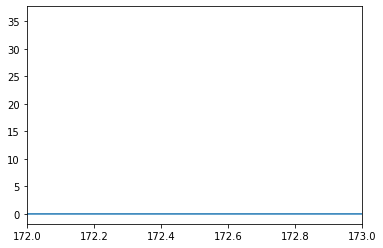

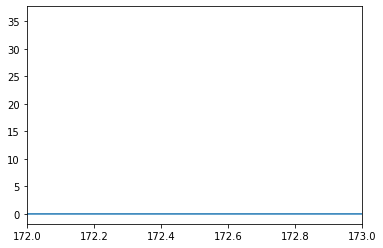

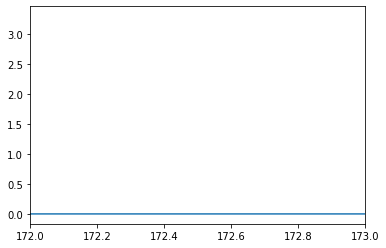

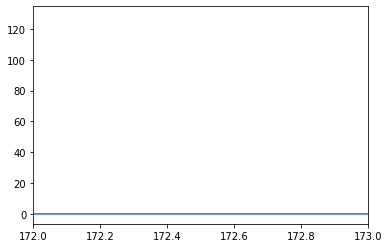

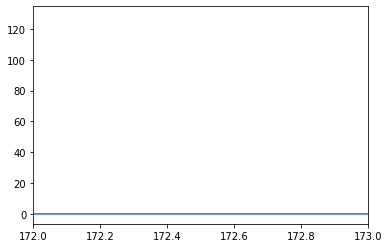

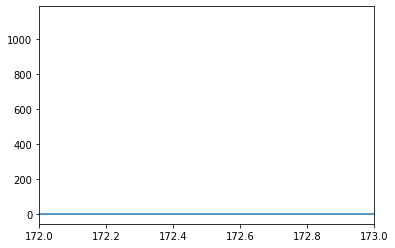

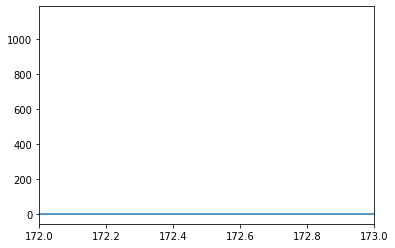

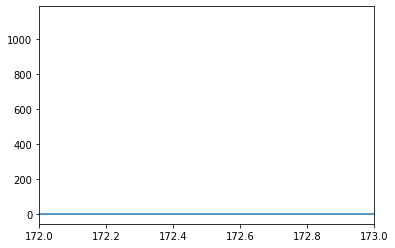

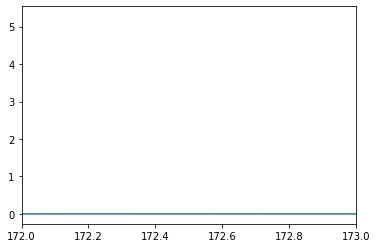

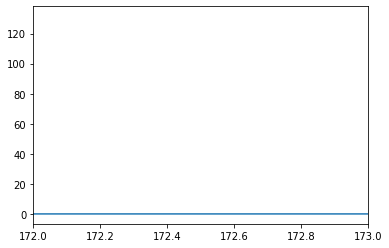

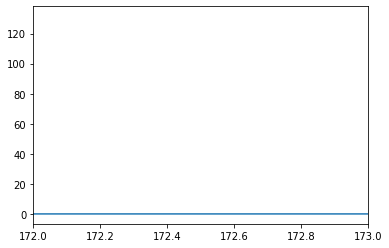

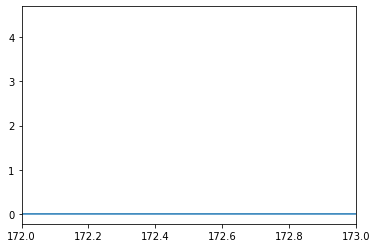

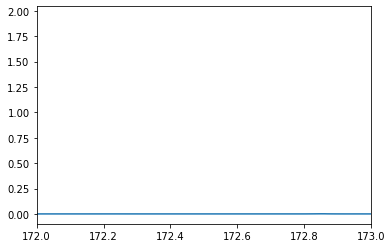

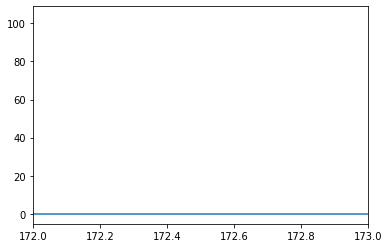

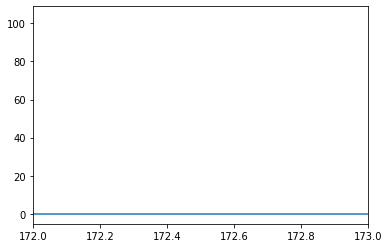

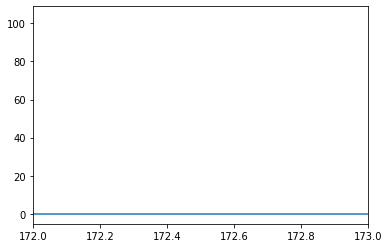

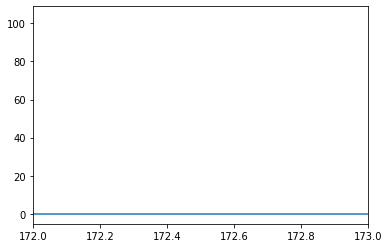

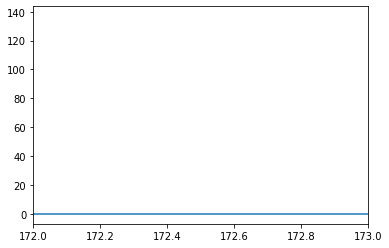

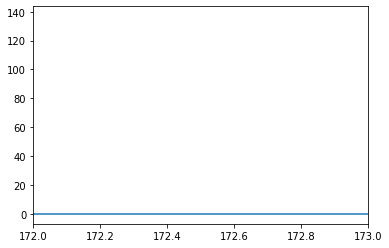

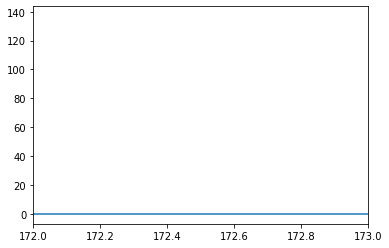

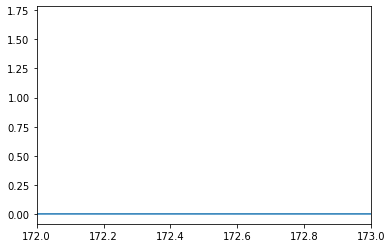

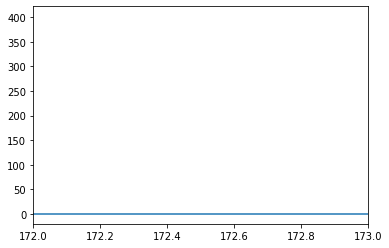

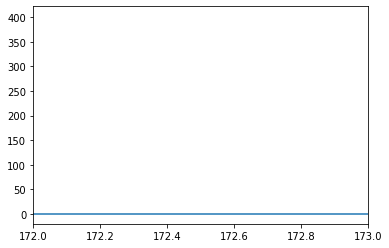

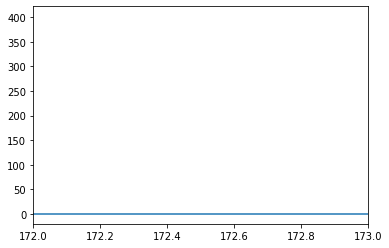

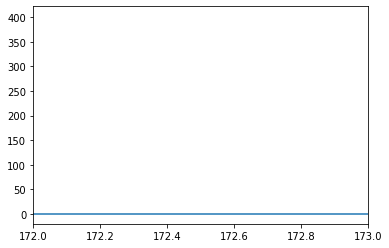

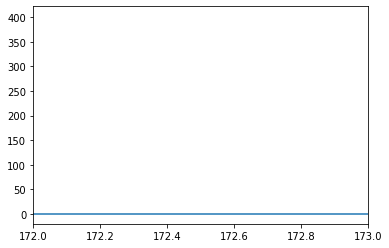

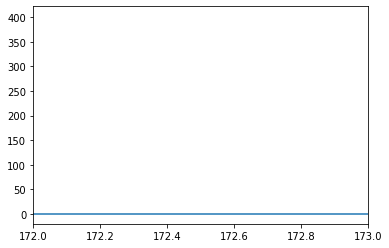

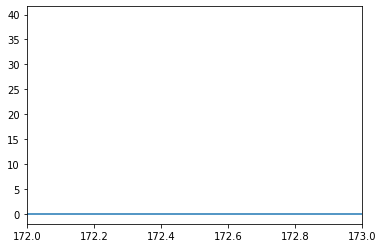

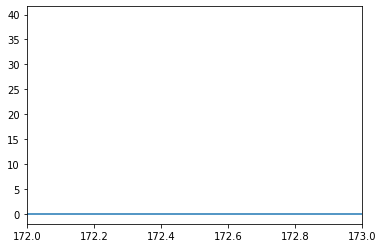

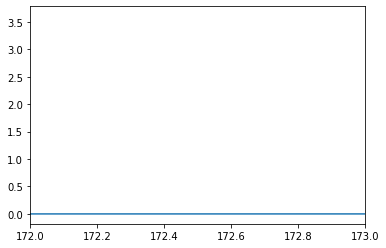

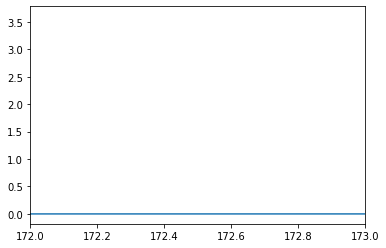

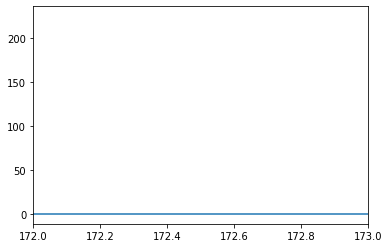

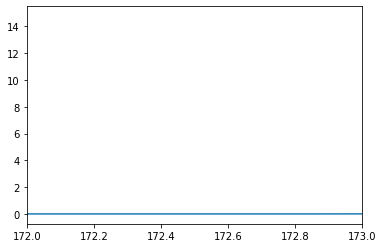

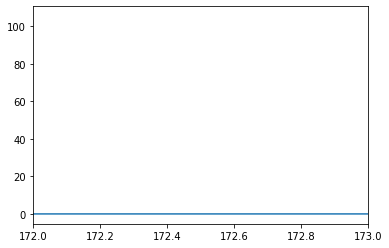

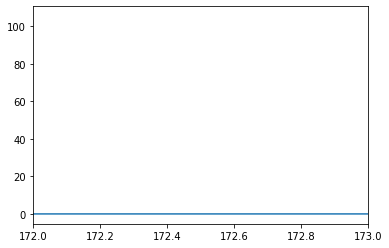

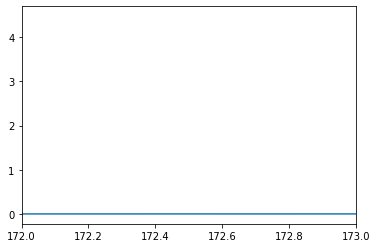

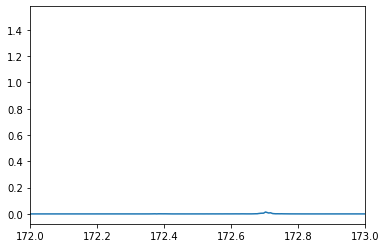

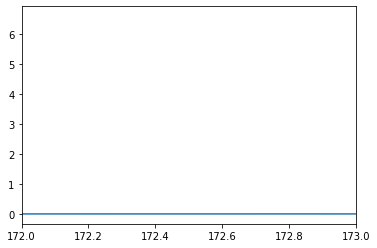

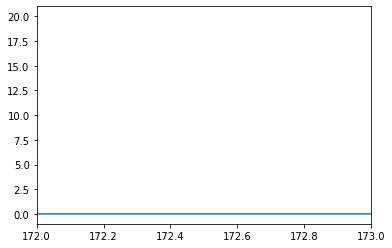

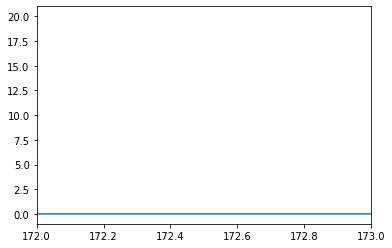

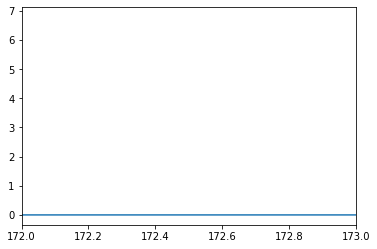

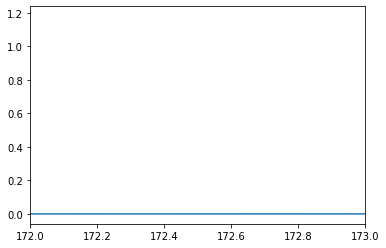

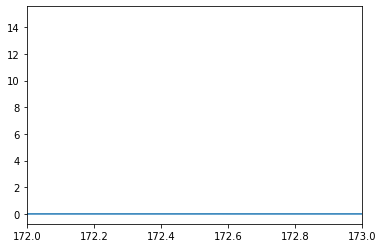

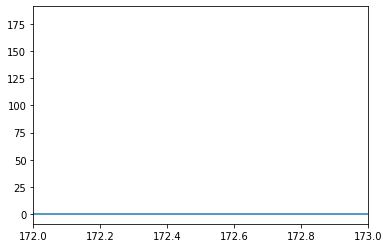

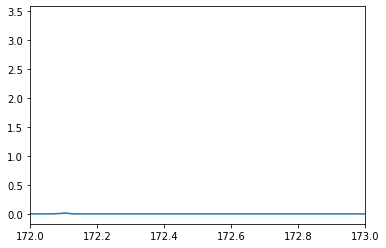

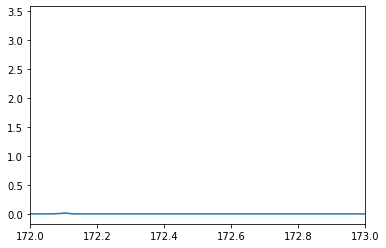

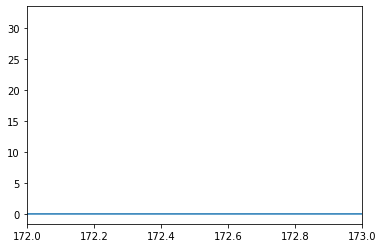

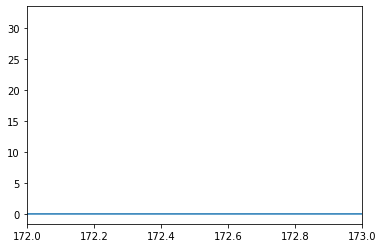

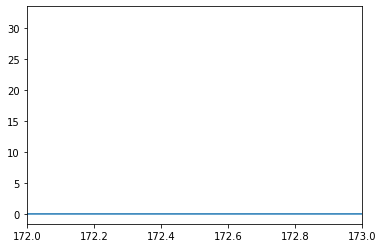

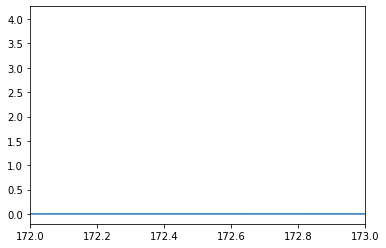

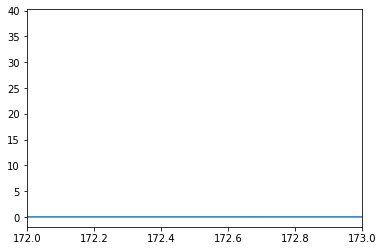

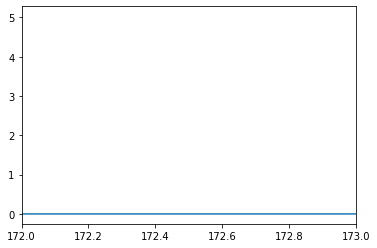

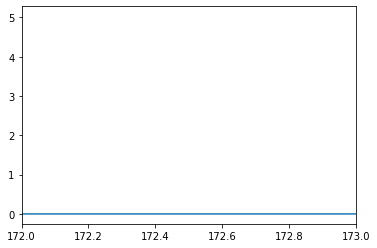

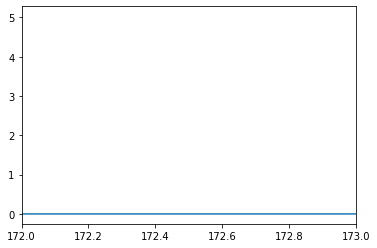

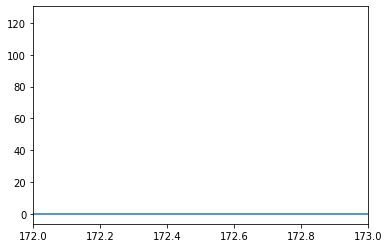

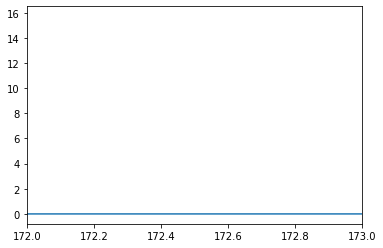

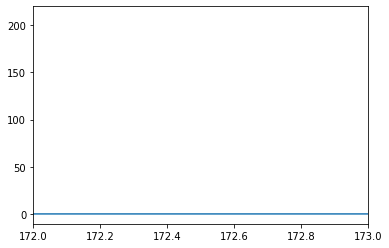

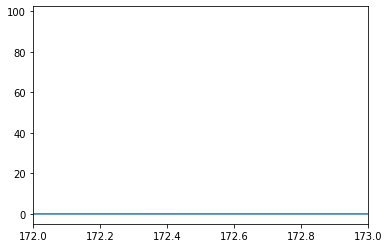

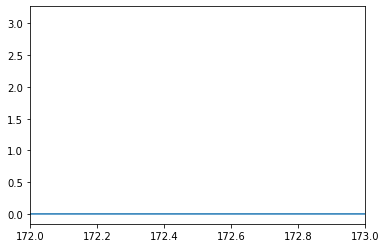

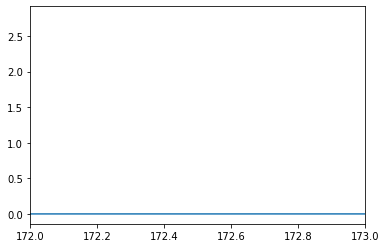

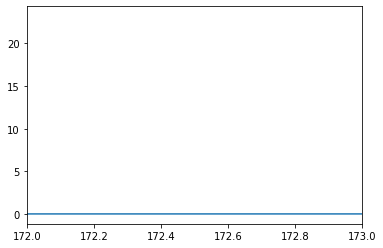

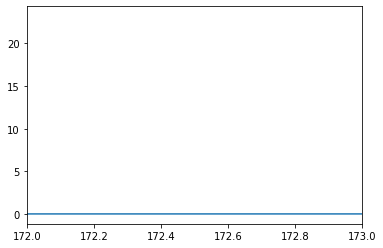

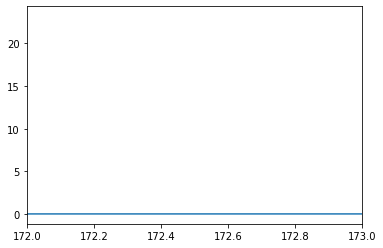

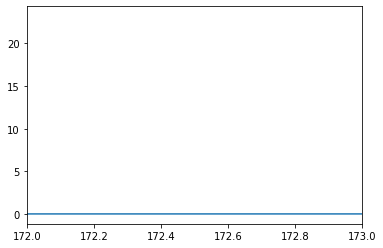

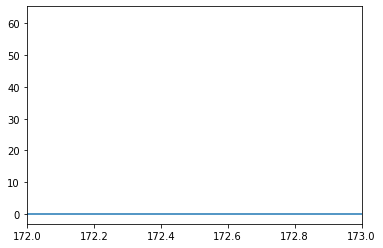

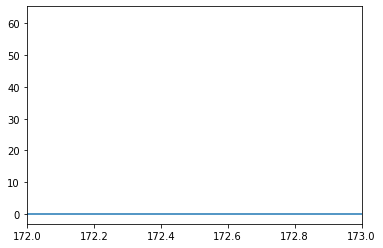

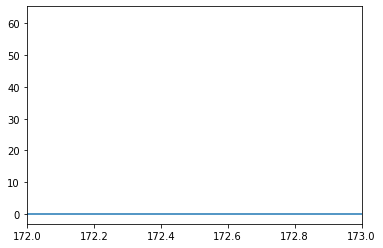

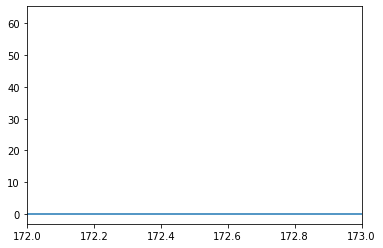

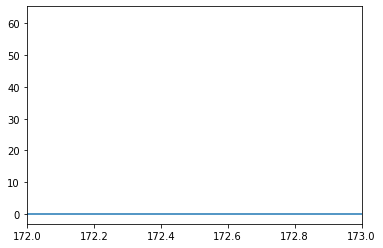

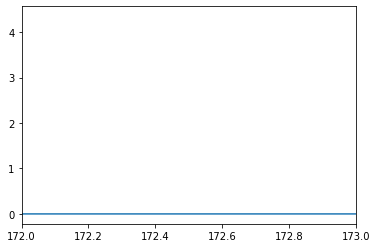

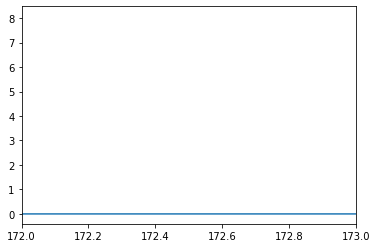

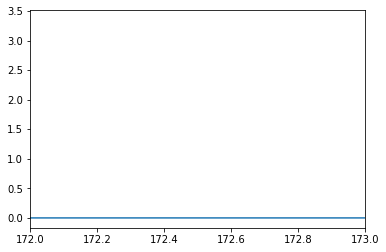

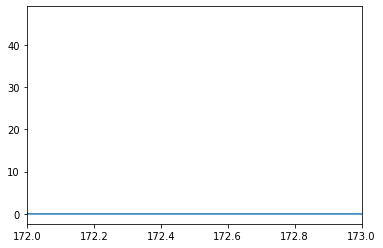

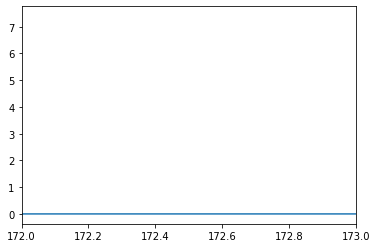

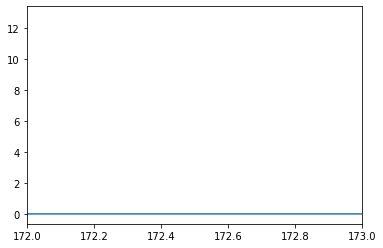

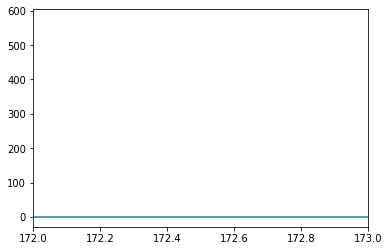

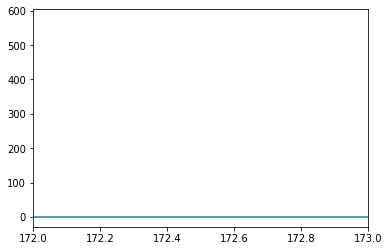

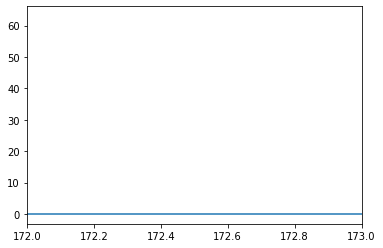

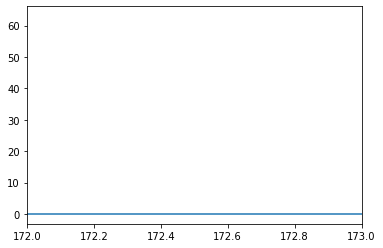

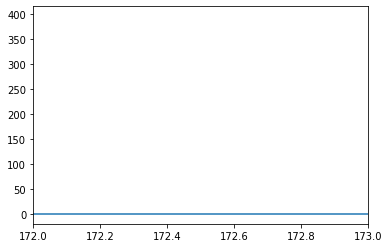

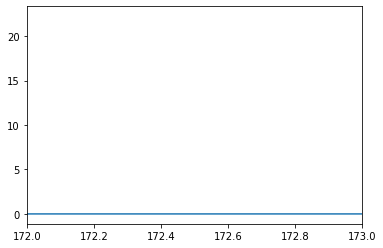

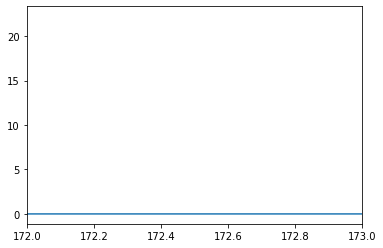

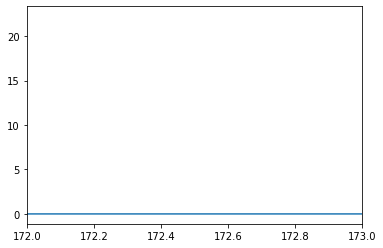

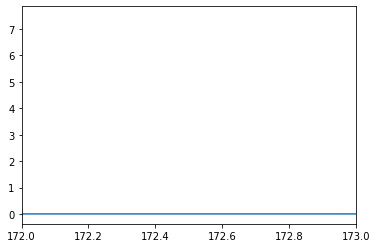

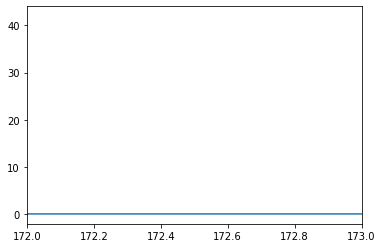

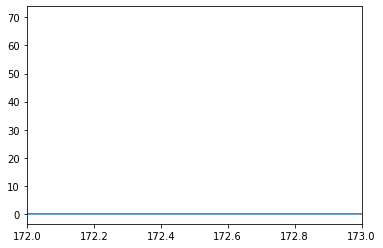

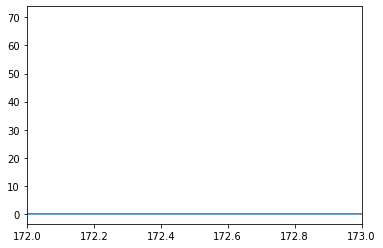

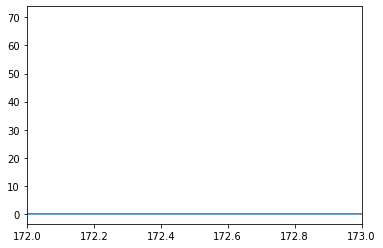

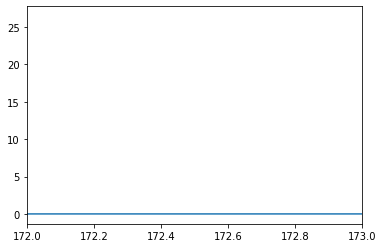

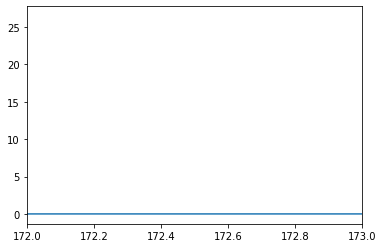

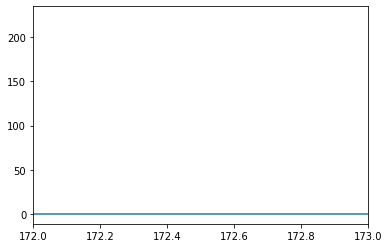

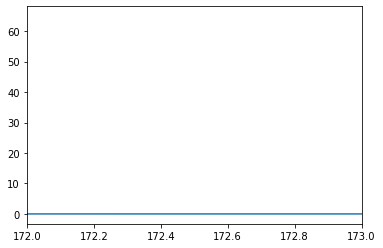

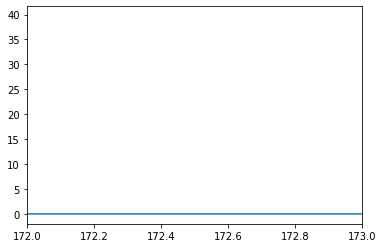

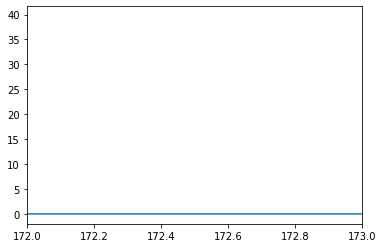

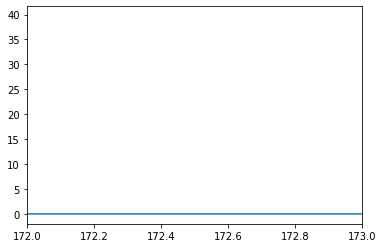

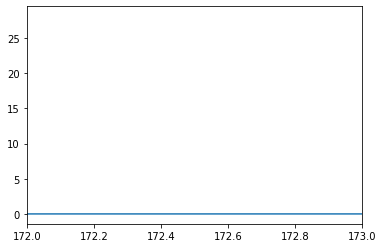

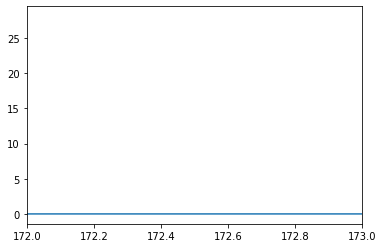

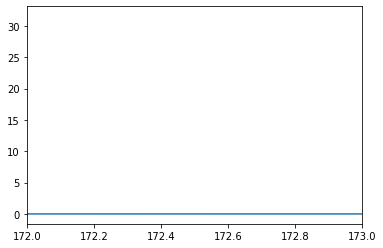

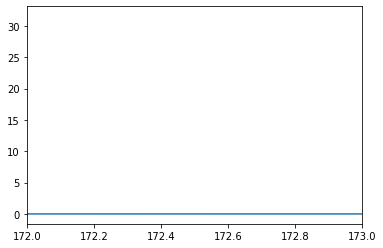

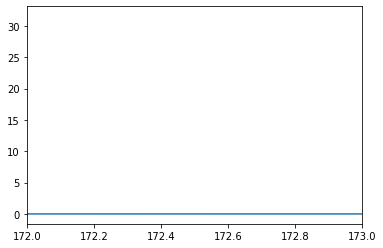

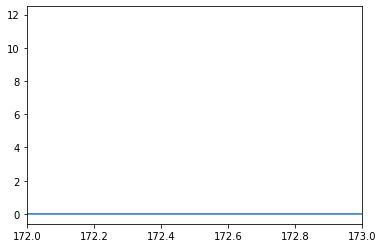

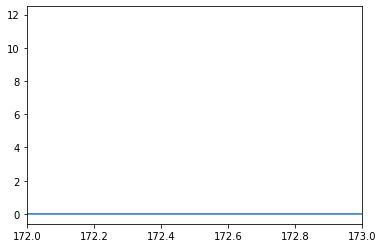

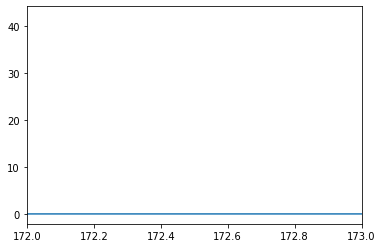

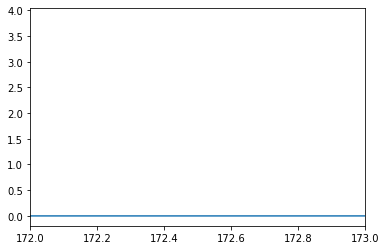

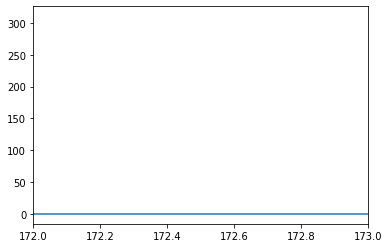

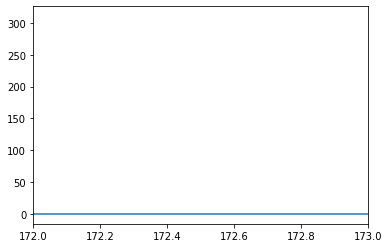

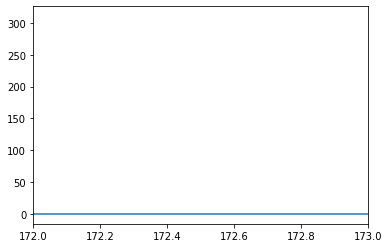

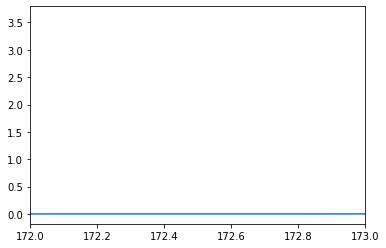

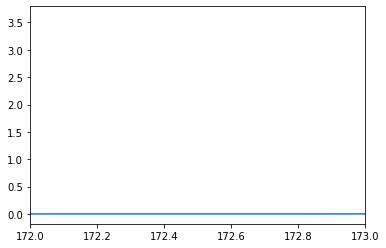

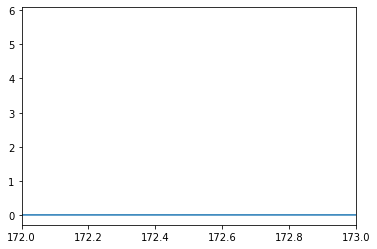

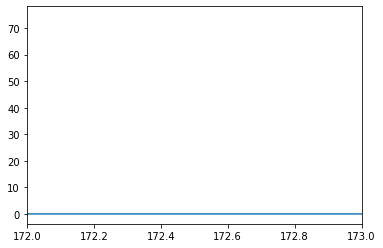

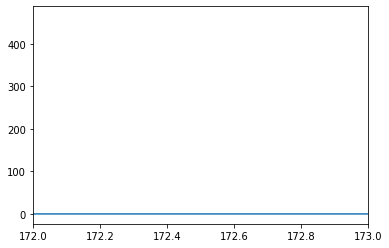

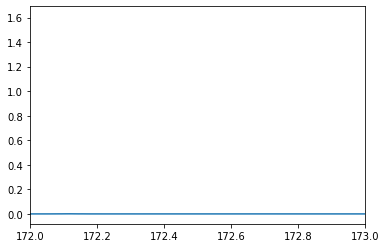

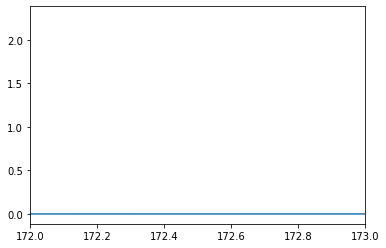

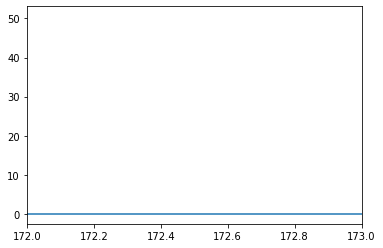

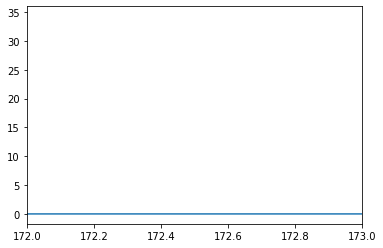

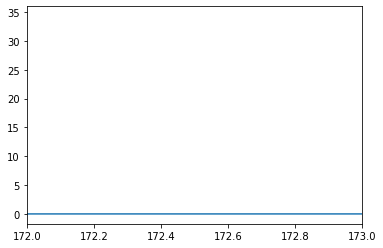

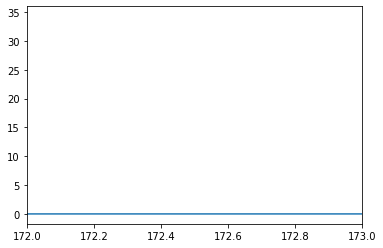

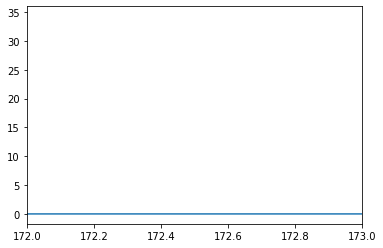

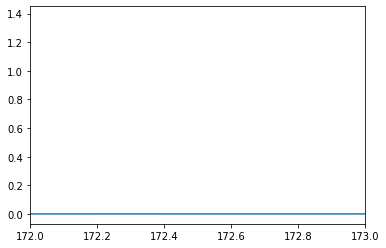

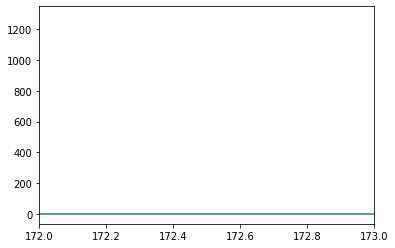

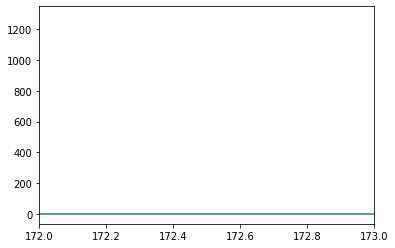

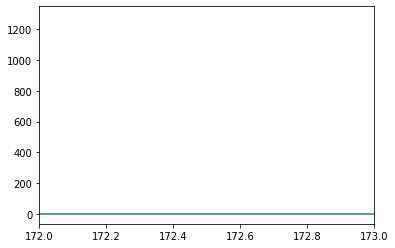

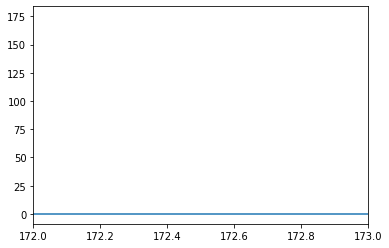

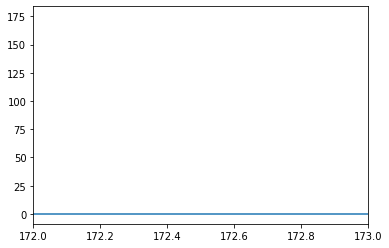

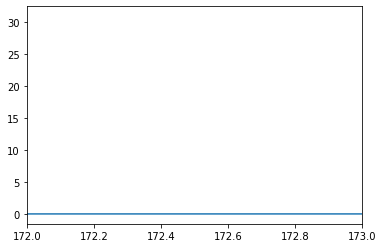

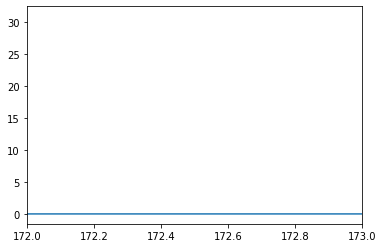

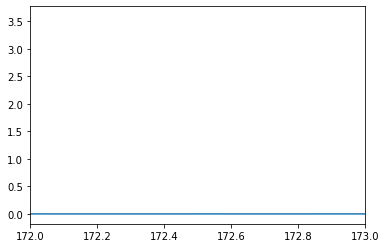

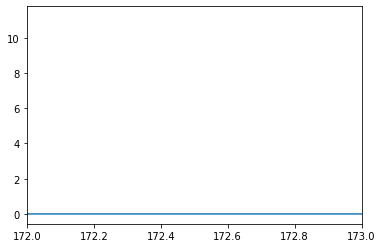

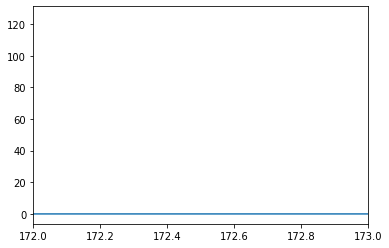

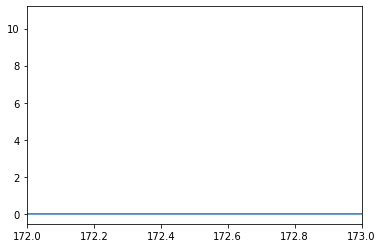

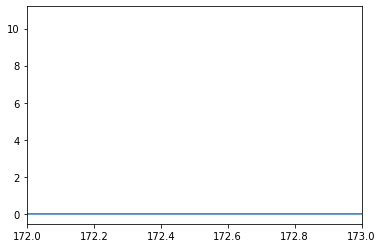

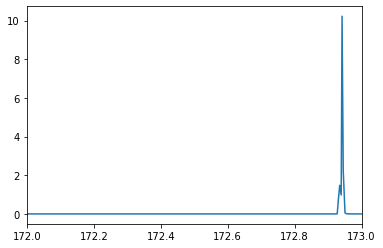

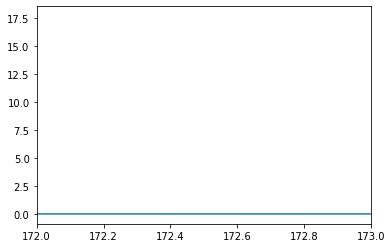

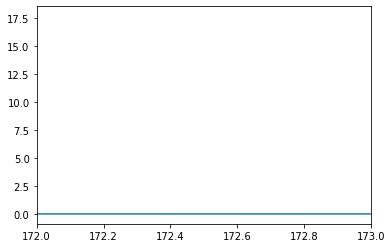

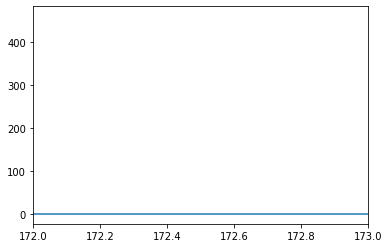

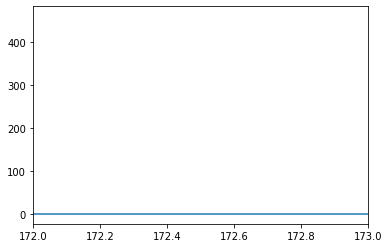

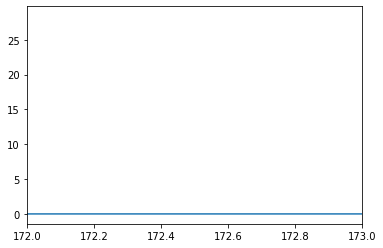

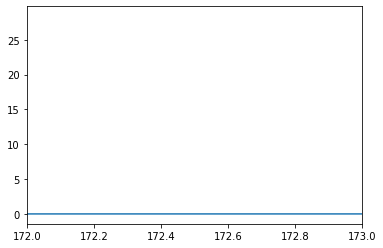

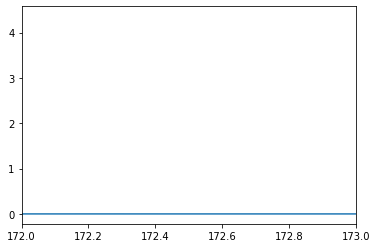

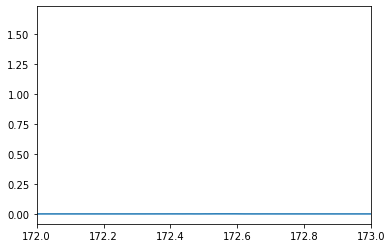

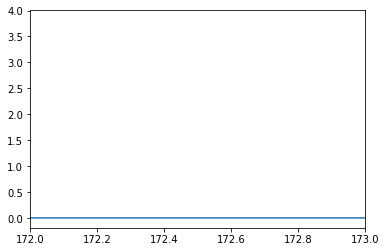

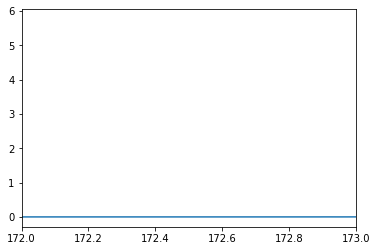

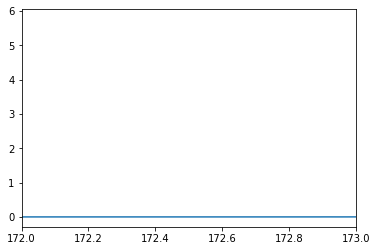

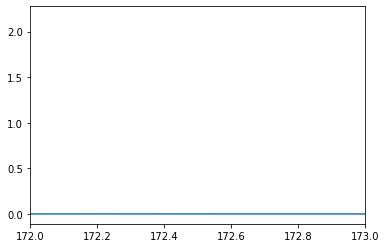

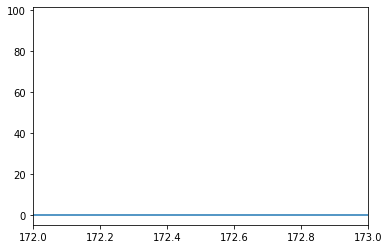

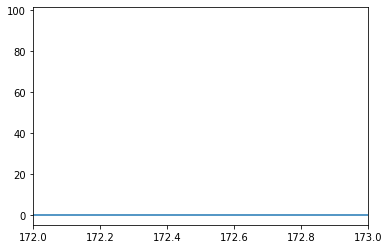

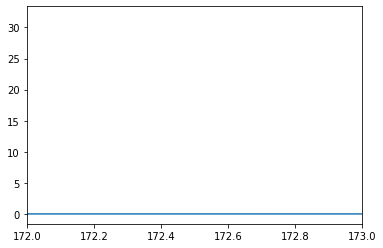

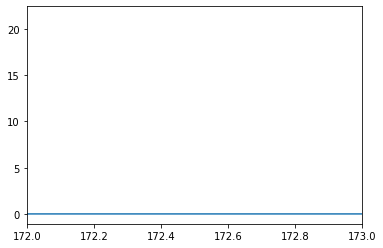

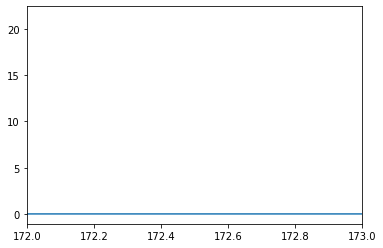

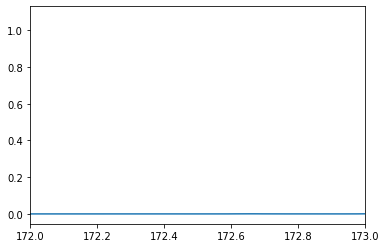

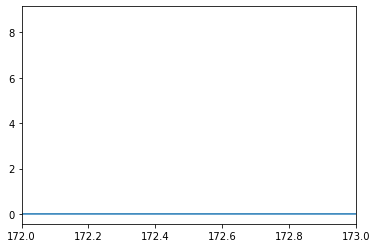

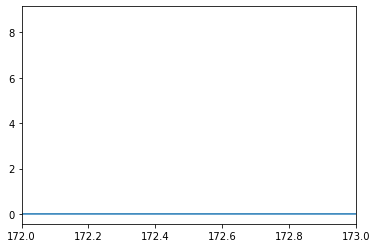

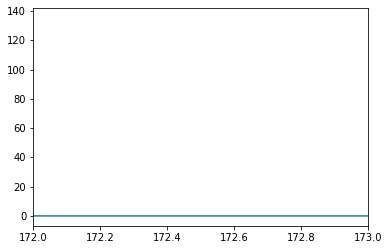

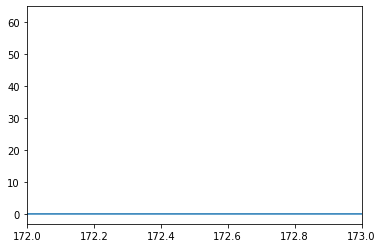

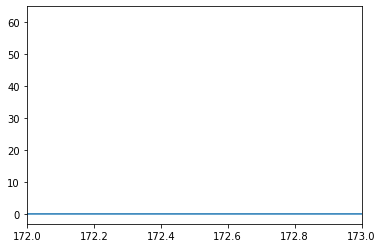

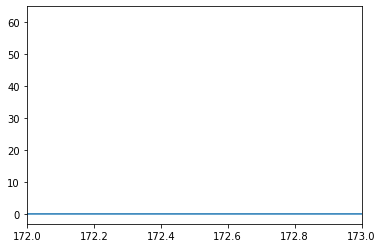

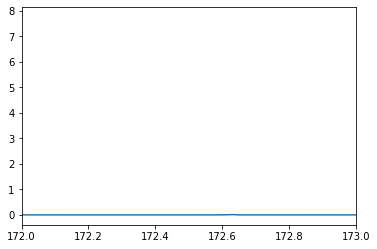

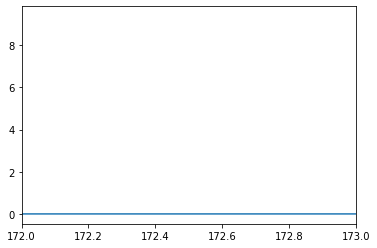

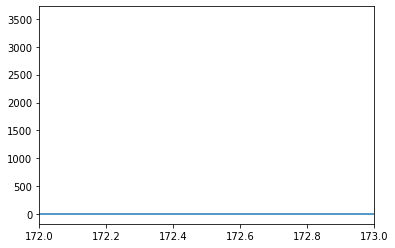

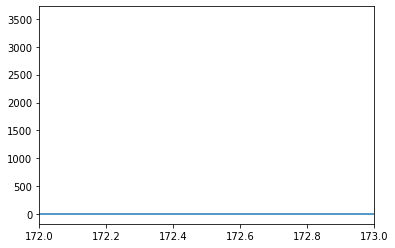

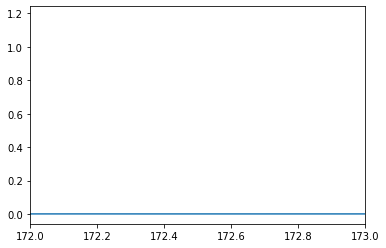

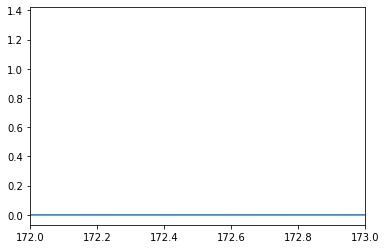

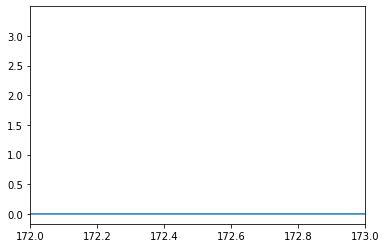

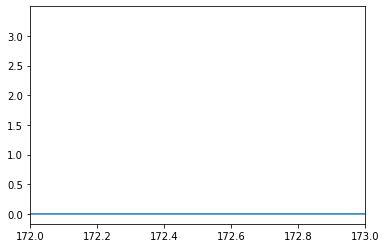

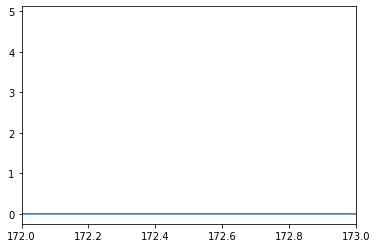

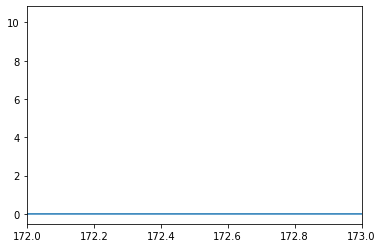

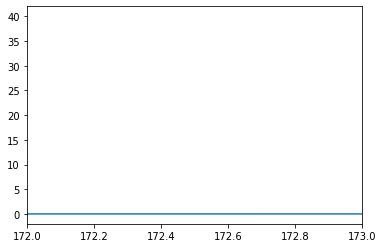

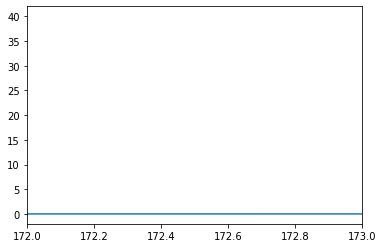

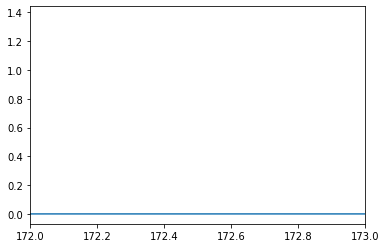

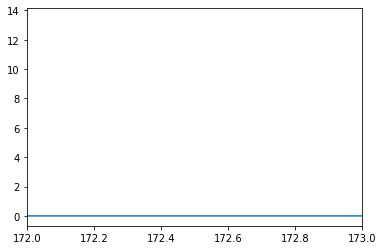

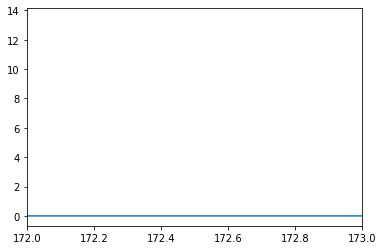

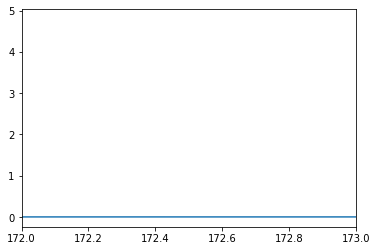

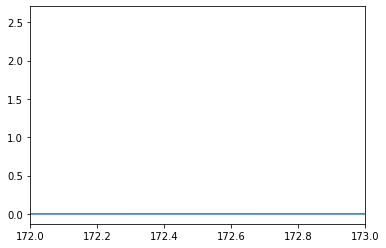

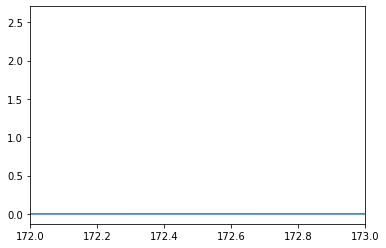

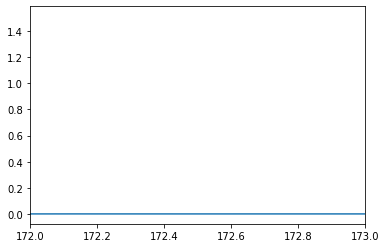

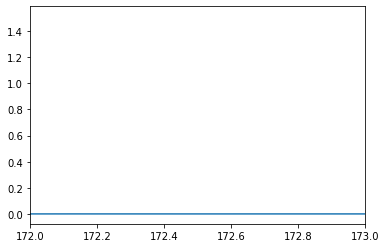

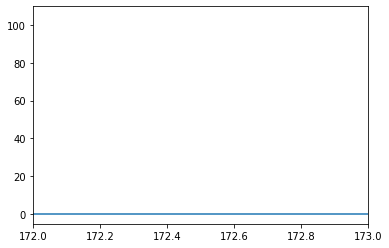

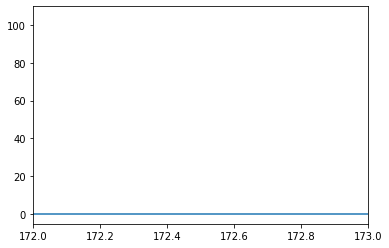

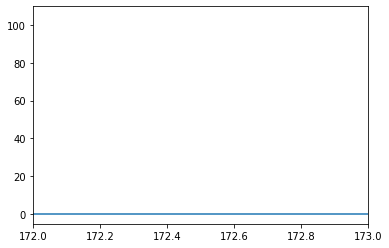

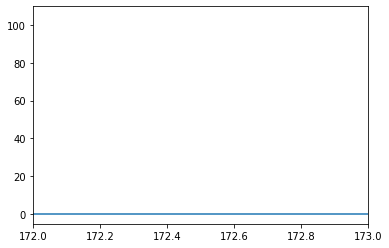

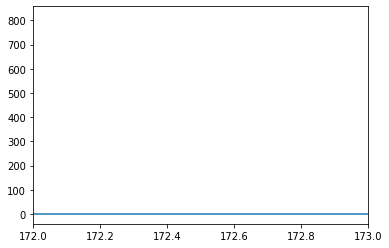

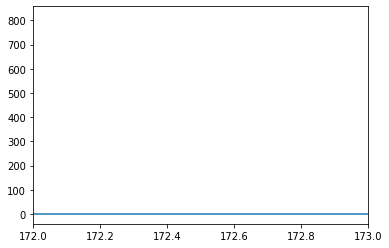

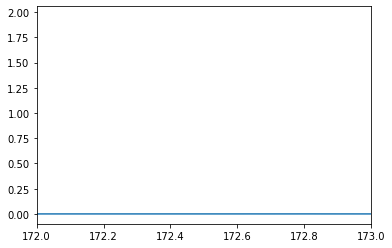

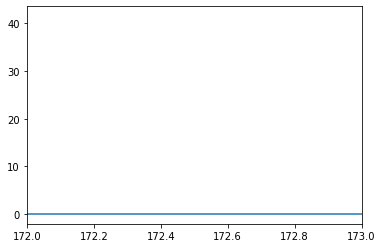

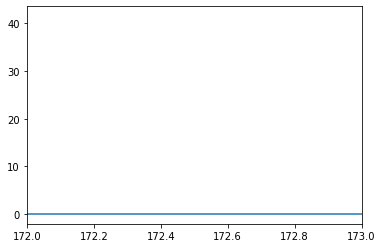

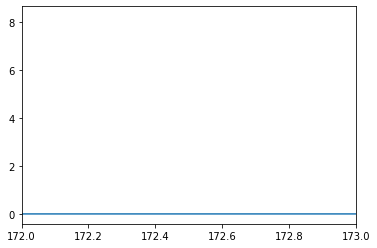

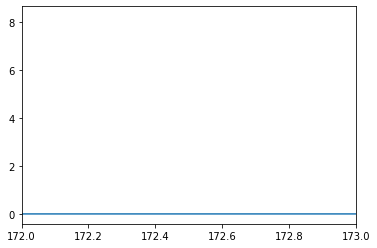

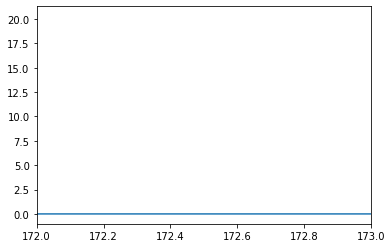

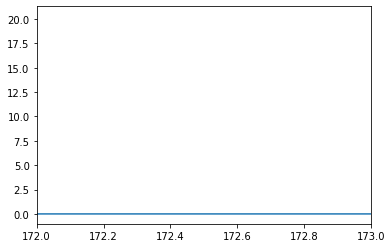

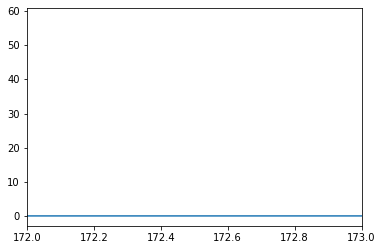

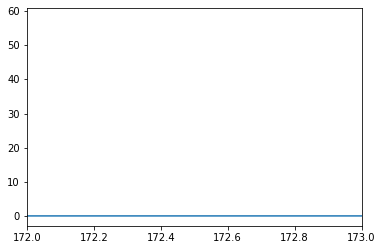

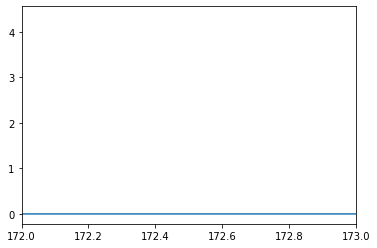

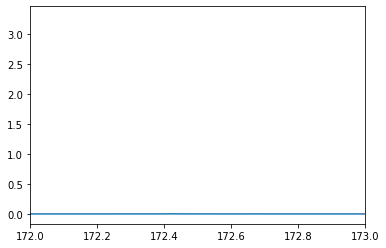

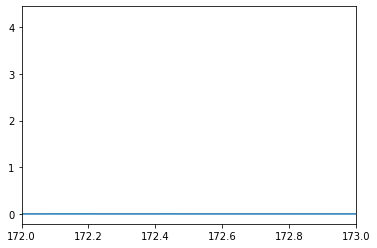

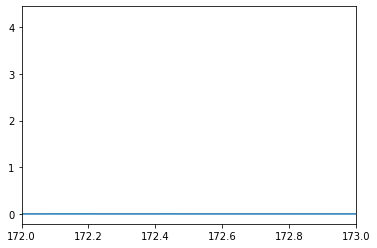

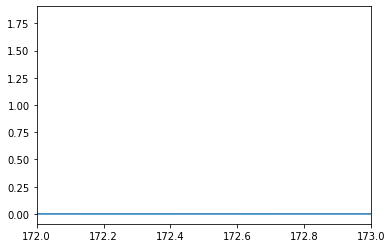

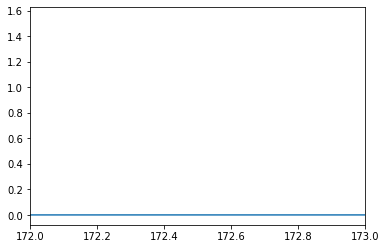

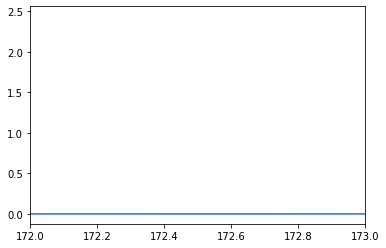

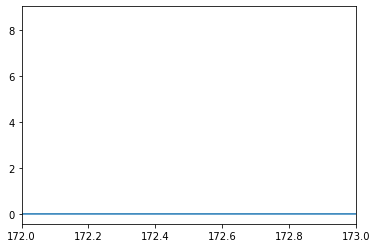

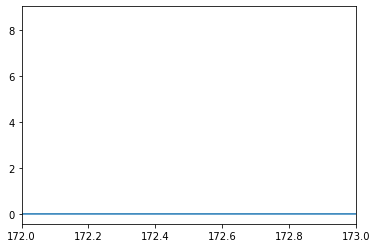

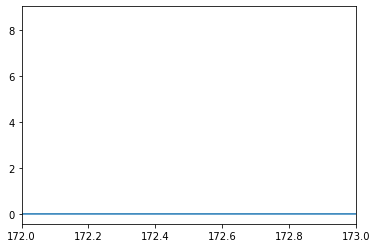

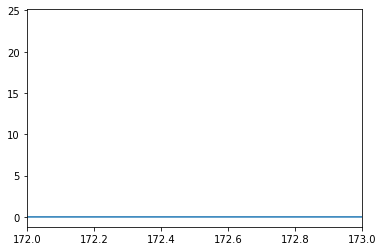

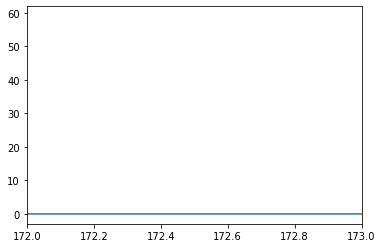

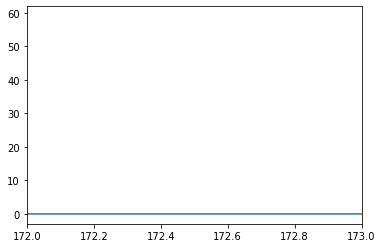

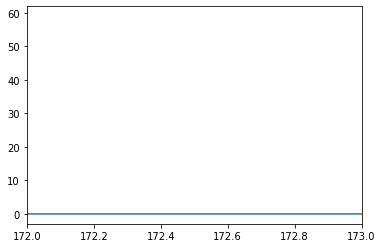

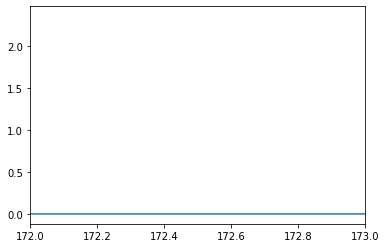

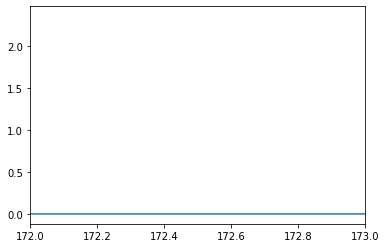

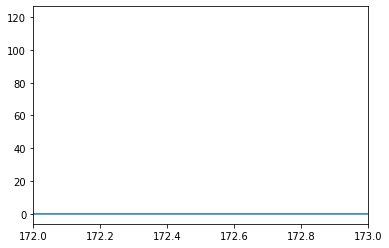

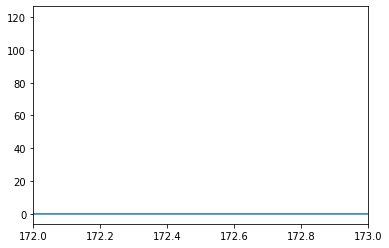

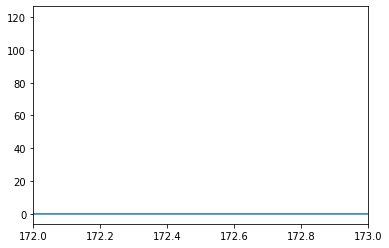

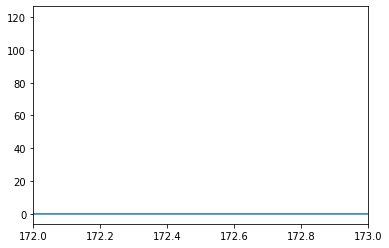

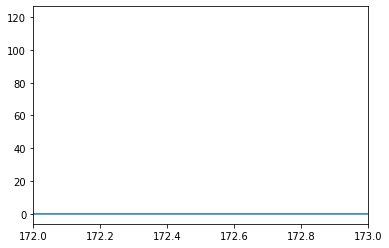

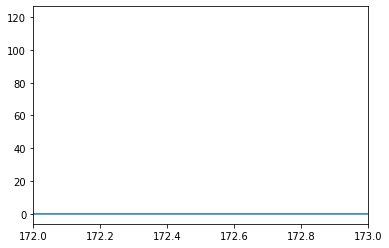

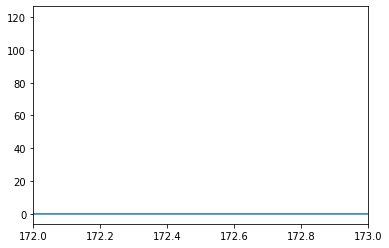

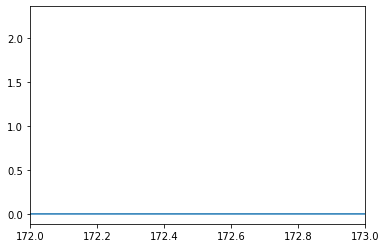

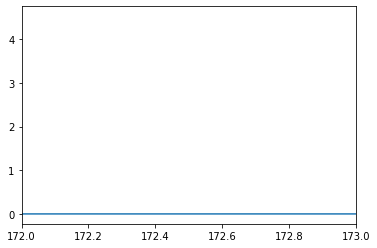

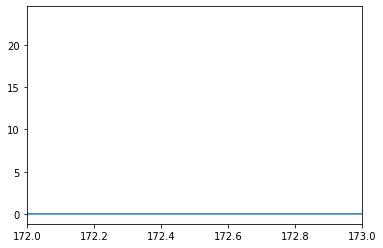

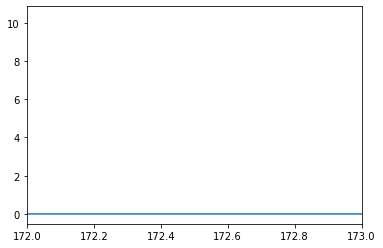

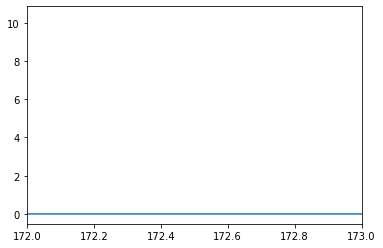

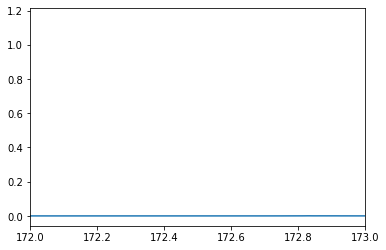

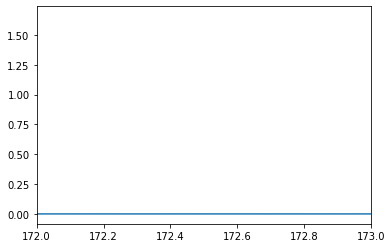

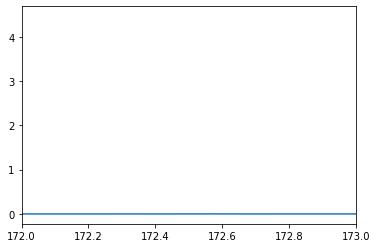

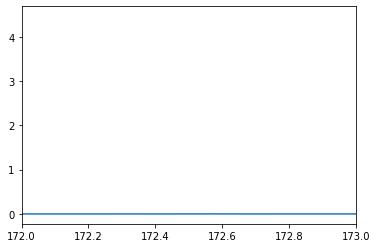

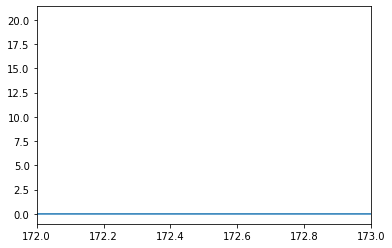

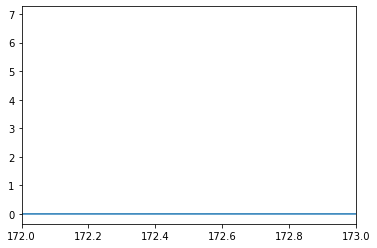

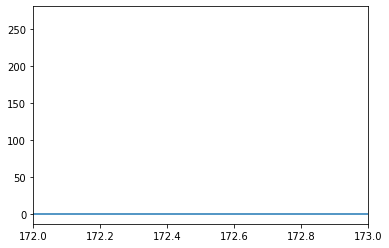

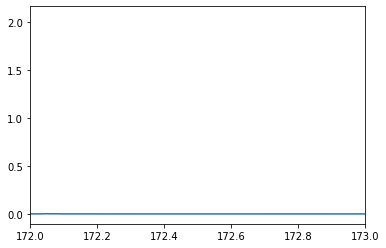

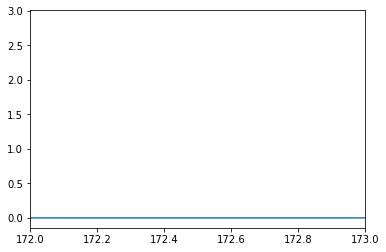

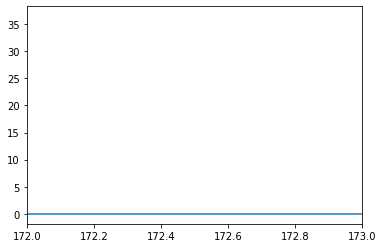

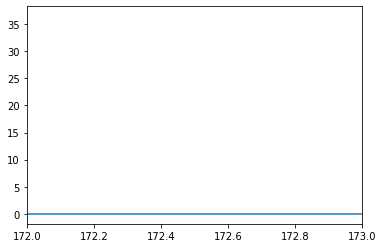

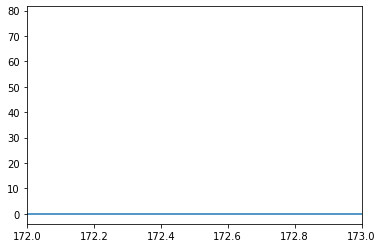

In [6]:
def lyman_identification():
    """
    function for identifying lls using neutral fraction as filter
    """
    count = 0
    neutral_fraction_limit = 1e-3
    lyman_limited_value = []
    neutral_fraction = []
    gamma = []
    for i in range(1000):
        raw_path = 'los.00' + '{0:03}'.format(i) +'.raw'
        den_path =  'los.00' + '{0:03}'.format(i) +'.den'
        distance, pec_vel, temp, HI_density = unPackRawFile(raw_path)
        #changing the distance from chimp to cmeters
        distance1,gas_density1 = unPackDenFile(den_path)
        distance_cm = distance *0.1453*3.086e24 /0.68
        gas_density =sp.interpolate.interp1d(distance1,gas_density1, fill_value="extrapolate")(distance)
        for k in range(len(distance) -2):
            if(HI_density[k]/gas_density[k]<neutral_fraction_limit and HI_density[k+1]/gas_density[k+1]>neutral_fraction_limit):
                left_bases = k+1
                peak_fraction = HI_density[k]/gas_density[k]
                peak_HI = HI_density[k]
                peak_distance = distance[k]
                if( k+1 <len(distance)):
                    while(not(HI_density[k]/gas_density[k]>neutral_fraction_limit and HI_density[k+1]/gas_density[k+1]<neutral_fraction_limit) and k <len(distance)-2):
                        right_bases = k +1
                        if(k<len(distance)-1):
                            k+=1
                        if(HI_density[k]/gas_density[k]>peak_fraction):
                            peak_fraction = HI_density[k]/gas_density[k]
                            peak_HI = HI_density[k]
                            peak_distance = distance[k]
                    
                    area_under = peak_HI *1/2*(distance_cm[right_bases]-distance_cm[left_bases])/0.937415
                    if(area_under >= (1.6*10**17)and area_under  <= (10**22)):
                        lyman_limited_value.append(area_under)
                        neutral_fraction.append(peak_fraction)
                        if(peak_fraction > 1):
                            count+=1
                            plt.plot(distance,HI_density/gas_density)
                            plt.xlim(172,173)
                            plt.show()
                        gamma.append(calculate_gamma(temp[k],gas_density[k],peak_fraction,0.1453))
    return lyman_limited_value,neutral_fraction,gamma,count
lyman_limited_value,neutral_fraction,gamma,count = lyman_identification()


In [4]:
sigma = 6.3e-18
optical_depth = np.multiply(sigma,lyman_limited_value)

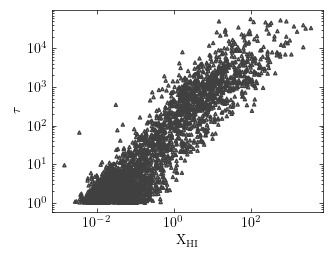

In [9]:
import matplotlib.pyplot as plt
with plt.style.context('science','notebook'):
    plt.xlabel("$\mathrm{X_{HI}}$",fontsize = 10)
    plt.ylabel(r"$\tau$",fontsize = 10)
    plt.xscale("log")
    plt.yscale("log")
    plt.scatter(neutral_fraction,optical_depth,s = 5,marker = "^",facecolors='none', edgecolors="0.25")
    plt.savefig('f4_uniform_80.pdf') 

In [6]:
def average_gamma(gamma):
    """
    average gamma used to calculate
    """
    average = 0
    for i in (gamma):
        average += i
    average = average/(len(gamma))
    return average
average = average_gamma(gamma)

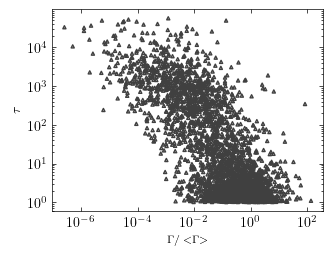

In [10]:
import matplotlib.pyplot as plt
x_along = np.linspace(min(gamma/average)-1,max(gamma/average)+5,2)
with plt.style.context('science','notebook'):
    plt.xlabel(r"$\Gamma$""$/<$"r"$\Gamma$""$>$",fontsize = 8)
    plt.ylabel(r"$\tau$",fontsize = 10)
    plt.xscale("log")
    plt.yscale("log")
    plt.scatter(abs(gamma/average),optical_depth,s = 5,marker = "^",facecolors='none', edgecolors="0.25")
    plt.savefig('f7_uniform_80.pdf') 